## 1.1 Beelden

*  dataset (MIT-license):
https://public.roboflow.com/object-detection/self-driving-car/3/download/yolov8
Cars are probably the lines that start with 1
https://public.roboflow.com/object-detection/self-driving-car
*  dataset-overview:
https://www.cityscapes-dataset.com/dataset-overview/
*  connecteren Google Drive met collab:
zie https://www.youtube.com/watch?v=8HvugBq5NKg
*  onderstaande code gaat uit van 2 folders die deze dataset bevatten: all_images en all_labels

In [1]:
#Definiëren van de sample size en de grootte van de uiteindelijke dataset
#dataset is kleiner omdat we de images die trucks bevatten (zoals gedetecteerd via de predict functie uit Yolo) uitzuiveren
sample_size = 10000
total_images_dataset = 3024

In [2]:
import os
#Declareren waar de images en labels van de Cityscapes dataset staan (na upload van deze images en labels naar Google Drive)
source_folder_labels = "./labels"
source_folder_images = "./images"

#Declareren van de folders die in de notebook gebruikt en automatisch aangemaakt worden
sample_folder = "./sampleSize"
sample_folder_size = sample_folder + str(sample_size)
sample_folder_predict = os.path.join(sample_folder_size, "Yolo_output","predict","labels")
sample_folder_size_images = os.path.join(sample_folder_size, "images")
sample_folder_size_labels = os.path.join(sample_folder_size, "labels")
training_sets_folder = os.path.join(sample_folder_size, "training_sets")
bounding_box_folder = os.path.join(sample_folder_size, "images_bounding_boxes")

In [64]:
#tellen aantal beelden in de dataset
import os
all_images = [f for f in os.listdir(source_folder_images)]
print("totaal aantal beelden in de folder geupload in google drive:", len(all_images))
all_labels = [f for f in os.listdir(source_folder_labels)]
print("totaal aantal labels in de folder geupload in google drive:", len(all_labels))

totaal aantal beelden in de folder geupload in google drive: 29800
totaal aantal labels in de folder geupload in google drive: 29800


### 1.1.1 Beelden samplen

In [65]:
#functie definitie
#input: sample_size
#returns 2 folders (labels en images) in de sample_size folder
import os
import random
import shutil

def select_random_txt_files(num_files):
    # Create destination folders if it doesn't exist
    if not os.path.exists(sample_folder_size_images):
        os.makedirs(sample_folder_size_images)
    if not os.path.exists(sample_folder_size_labels):
        os.makedirs(sample_folder_size_labels)

    # Get list of all files in the source image folder
    all_images = [f for f in os.listdir(source_folder_images)]

    # Select random images
    random_images = random.sample(all_images, num_files)

    # Get list of all TXT files in the source folder
    all_txt_files = [f for f in os.listdir(source_folder_labels)]

    # Select random TXT files with the same name as the randomly selected images
    random_txt_files = []
    random_images_files = []
    for image_name in random_images:
        txt_file_with_same_name = [txt for txt in all_txt_files if os.path.splitext(txt)[0] == os.path.splitext(image_name)[0]]
        if txt_file_with_same_name:
            random_txt_files.append(txt_file_with_same_name[0])
            random_images_files.append(image_name)

    # Copy selected TXT files to destination folder
    for txt_file in random_txt_files:
        source_path = os.path.join(source_folder_labels, txt_file)
        dest_path_labels = os.path.join(sample_folder_size_labels, txt_file)
        shutil.copyfile(source_path, dest_path_labels)

    # Copy selected images files to destination folder (last copy fails ==> Bug in Google Drive???)
    for image_file in random_images_files:
        source_path = os.path.join(source_folder_images, image_file)
        dest_path_images = os.path.join(sample_folder_size_images, image_file)
        shutil.copyfile(source_path, dest_path_images)

In [66]:
# Call the function to select and copy random files
select_random_txt_files(sample_size)

In [67]:
#controle op aangemaakte sample
all_images = [f for f in os.listdir(sample_folder_size_images)]
print("aantal beelden in de sample folder:", len(all_images))
all_labels = [f for f in os.listdir(sample_folder_size_labels)]
print("aantal labels in de sample folder:", len(all_labels))

aantal beelden in de sample folder: 10000
aantal labels in de sample folder: 10000


1.1.2 Beelden uitzuiveren

In [68]:
#elk beeld in de sample verwerken met predict functie van Yolov8 zodat we een label-file hebben
# wegschrijven resultaten in de sample_size folder onder Yolo_output/predict/labels
from IPython import display
display.clear_output()

import ultralytics
import os
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image
model = YOLO('yolov8n.pt')
model.names

# inhoud results zie https://docs.ultralytics.com/reference/engine/results/#ultralytics.engine.results.BaseTensor.to
if not os.path.exists(sample_folder_predict):
  os.makedirs(sample_folder_predict)
model.predict(source = os.path.join(sample_folder_size, "images"), save_txt = True, exist_ok=True, project=os.path.join(sample_folder_size, "Yolo_output"))

Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i9-9900K 3.60GHz)
Setup complete  (16 CPUs, 31.9 GB RAM, 353.0/475.7 GB disk)


WARNING  inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

image 1/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478019953180167674_jpg.rf.8a816c9d7e9b423a63ed6ecd4a663e47.jpg: 640x640 (no detections), 97.8ms
image 2/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\14780199531801676

image 42/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478019976185898081_jpg.rf.3c442aec304a7ecdd8f3d84823f5e792.jpg: 640x640 3 cars, 5 traffic lights, 69.2ms
image 43/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478019977188852426_jpg.rf.aac65f365f9963e3b541794b89b58c60.jpg: 640x640 3 cars, 2 trucks, 1 traffic light, 69.1ms
image 44/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478019977680527341_jpg.rf.17ea458670bbf547eff8b06cb64c93a6.jpg: 640x640 1 car, 2 trucks, 2 traffic lights, 65.7ms
image 45/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478019978180101986_jpg.rf.6c0f636cd3a8a0bf74853f505bd2f776.jpg: 640x640 2 cars, 1 traffic light, 67.9ms
image 46/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478019978686299906_jpg.rf.bxnJeeEptGCrdAcL9zPM.jpg: 640x640 1 truck, 3 traffic

image 86/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020219697324624_jpg.rf.jTUDmT4hkGd5glunsYPB.jpg: 640x640 (no detections), 59.3ms
image 87/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020220191836915_jpg.rf.0cg07UeX2Hd7Slk15V21.jpg: 640x640 1 person, 62.8ms
image 88/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020220191836915_jpg.rf.c927b3f6cf9379ac2e63e9430ecbe40c.jpg: 640x640 1 person, 54.1ms
image 89/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020220697462096_jpg.rf.0f8b9fe01cc6795ac1c2667d7457ba9e.jpg: 640x640 1 person, 66.4ms
image 90/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020220697462096_jpg.rf.25vtyLl2u7bXFnZPmKzk.jpg: 640x640 1 person, 53.7ms
image 91/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147

image 130/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020256192066071_jpg.rf.iySOhiXvtSLfBS7ECJIA.jpg: 640x640 (no detections), 59.1ms
image 131/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020257692662705_jpg.rf.zlQri44xdqeJnelR8vBY.jpg: 640x640 1 car, 1 truck, 64.5ms
image 132/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020258692272616_jpg.rf.tkCm4w67HkeZk1YBc5Ju.jpg: 640x640 5 cars, 67.1ms
image 133/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020259194111192_jpg.rf.7ec773b45180f685dba767cd98537cfe.jpg: 640x640 4 cars, 65.3ms
image 134/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020259194111192_jpg.rf.Lm0JxgqVolAQkEyGucHG.jpg: 640x640 4 cars, 62.5ms
image 135/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147802026

image 174/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020297191534570_jpg.rf.z7EwKLFRMg3Fcd3QlQOV.jpg: 640x640 1 car, 61.6ms
image 175/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020298698253922_jpg.rf.55900ac489809eecb9748b1cbad5d1db.jpg: 640x640 2 cars, 65.1ms
image 176/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020299201040702_jpg.rf.06aUGMX7HLVd5IXDesa8.jpg: 640x640 1 car, 66.5ms
image 177/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020299201040702_jpg.rf.073973c456d4bf21f83d96656f06432b.jpg: 640x640 1 car, 64.8ms
image 178/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020299691687122_jpg.rf.rIGmcSRh5gzlrxt5aFsk.jpg: 640x640 (no detections), 47.4ms
image 179/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\14780203

image 218/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020334700996345_jpg.rf.853da0843ea006ca5b3985ae5a835524.jpg: 640x640 3 cars, 66.0ms
image 219/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020334700996345_jpg.rf.gOcP4ItkTIobZc2BEh0P.jpg: 640x640 3 cars, 64.8ms
image 220/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020336194602291_jpg.rf.17HCN4Al4ubnHpvlPy64.jpg: 640x640 3 cars, 66.1ms
image 221/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020337202186521_jpg.rf.b24beb83d29749b978fb932573dae4c6.jpg: 640x640 1 car, 66.2ms
image 222/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020337695556058_jpg.rf.0c5065235b45033f94090902d77ba65d.jpg: 640x640 2 cars, 70.7ms
image 223/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147

image 260/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020362696871190_jpg.rf.yQNZfJsL7trBAVHZxcto.jpg: 640x640 5 cars, 1 traffic light, 71.9ms
image 261/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020364195691554_jpg.rf.0806e65d666e3c4e764ab0ea9f5318cb.jpg: 640x640 1 person, 4 cars, 69.3ms
image 262/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020364701202643_jpg.rf.bf181c0987e08aa18437b48191a6e49f.jpg: 640x640 5 cars, 52.1ms
image 263/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020364701202643_jpg.rf.eTeOBDvgZmGAbWsH1Fby.jpg: 640x640 4 cars, 59.6ms
image 264/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020365195090332_jpg.rf.l92brp6nLLlzY7jZrLem.jpg: 640x640 4 cars, 62.3ms
image 265/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize

image 302/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020400703406587_jpg.rf.DPwLf7UFHrpRMtOUqdC7.jpg: 640x640 1 traffic light, 71.3ms
image 303/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020402203418319_jpg.rf.cb1f4b05eaa3b732ffa68b443c141a18.jpg: 640x640 1 person, 2 traffic lights, 72.8ms
image 304/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020402697679781_jpg.rf.09ed08d579d41922db4b05bdf7a44e7a.jpg: 640x640 1 traffic light, 55.9ms
image 305/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020403704214479_jpg.rf.ad084a10c1b33203e8727b2d8c2ab4bf.jpg: 640x640 1 traffic light, 58.8ms
image 306/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020405697361382_jpg.rf.10wat1CZfWHTWdYgQw0G.jpg: 640x640 (no detections), 66.3ms
image 307/10000 C:\Users\Gordts-De Laender\

image 344/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020432701963643_jpg.rf.ikl0Em96Kw7BYvkAaaGa.jpg: 640x640 6 cars, 1 truck, 7 traffic lights, 69.2ms
image 345/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020434196772975_jpg.rf.126bf9ad897a1b13f7f44b4242747b91.jpg: 640x640 4 cars, 2 trucks, 7 traffic lights, 63.8ms
image 346/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020434695808875_jpg.rf.1fe14f5d281c86fca71f93e9ca7c8cfa.jpg: 640x640 5 cars, 1 truck, 7 traffic lights, 71.8ms
image 347/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020435701641959_jpg.rf.mce660OhSESctgHDHYIv.jpg: 640x640 6 cars, 2 trucks, 7 traffic lights, 65.7ms
image 348/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020436202883110_jpg.rf.89a14b5858924cb1c8702145de49985c.jpg: 640x640 5 ca

image 385/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020471697664581_jpg.rf.588aaf2f94e000822166c0b1b636f573.jpg: 640x640 2 cars, 8 traffic lights, 62.1ms
image 386/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020471697664581_jpg.rf.7Kte2BerDoO9VqJGPEI4.jpg: 640x640 2 cars, 8 traffic lights, 60.6ms
image 387/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020472698067538_jpg.rf.mThqqD8VCE3jYQdJo47i.jpg: 640x640 3 cars, 10 traffic lights, 74.1ms
image 388/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020473197330918_jpg.rf.Wt0Nzk8V0b5TKjVAeTPE.jpg: 640x640 3 cars, 7 traffic lights, 63.7ms
image 389/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020473697364138_jpg.rf.490f716d03f853c1a7ca14950031987c.jpg: 640x640 2 cars, 7 traffic lights, 71.0ms
image 390/10000 C:\U

image 427/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020498698483613_jpg.rf.OEfVWnySKvv3XS3hBprh.jpg: 640x640 5 cars, 7 traffic lights, 75.0ms
image 428/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020499199173523_jpg.rf.ddbec160705217e374ed4b4f212c1132.jpg: 640x640 5 cars, 7 traffic lights, 63.4ms
image 429/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020499698694121_jpg.rf.16658e4004c0cfe1709c7e9e71bec7b9.jpg: 640x640 5 cars, 1 bus, 7 traffic lights, 69.3ms
image 430/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020499698694121_jpg.rf.YNK54GKyylVc6i6WIhrP.jpg: 640x640 5 cars, 1 bus, 7 traffic lights, 60.3ms
image 431/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020500698934940_jpg.rf.8524ae3e19e713f510fc8d1e93ab9c4c.jpg: 640x640 6 cars, 7 traffic lights, 58

image 471/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020530706182083_jpg.rf.TQYptzb0DaYNTjGepByf.jpg: 640x640 4 cars, 1 traffic light, 53.9ms
image 472/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020531706039399_jpg.rf.nNsI09eD74aIG5t25l5W.jpg: 640x640 3 cars, 2 traffic lights, 54.1ms
image 473/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020533199593429_jpg.rf.0b6d688b8a5effd9736756b0cf427844.jpg: 640x640 3 cars, 1 traffic light, 55.1ms
image 474/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020533199593429_jpg.rf.lgVZOCBpRUXshxbrtmyJ.jpg: 640x640 3 cars, 2 traffic lights, 72.7ms
image 475/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020534201213851_jpg.rf.ZQWfAipKzfOxDcKEAEBO.jpg: 640x640 3 cars, 1 traffic light, 65.8ms
image 476/10000 C:\Users\Gordts-De L

image 514/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020557705100966_jpg.rf.5baacd348e22ed2b0e0a0b00d940b94d.jpg: 640x640 1 car, 1 traffic light, 67.2ms
image 515/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020558205726725_jpg.rf.89d367719781a1db70966aaa1916df79.jpg: 640x640 1 car, 3 traffic lights, 1 stop sign, 66.3ms
image 516/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020558706246463_jpg.rf.d608cdc6a6173799c7b2915a5f0894f6.jpg: 640x640 1 traffic light, 1 stop sign, 59.2ms
image 517/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020559208277125_jpg.rf.2a376e8f64349ad60d582af7f7728288.jpg: 640x640 2 traffic lights, 63.3ms
image 518/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020562700195919_jpg.rf.dfb20d17a5d7507898233d35b3c79e58.jpg: 640x640 (no detectio

image 559/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020593203378328_jpg.rf.kO1qwRA47uXQWPT0Jni0.jpg: 640x640 1 car, 1 truck, 74.7ms
image 560/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020594208755167_jpg.rf.2eef097dca60b1b59da0c7f8e0011149.jpg: 640x640 (no detections), 75.9ms
image 561/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020595212131404_jpg.rf.53af5d6289ccddb5b627d4ba5999c094.jpg: 640x640 1 car, 68.6ms
image 562/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020595212131404_jpg.rf.oOyJ80bNp54YVc962Rp7.jpg: 640x640 1 car, 44.5ms
image 563/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020596210597655_jpg.rf.Vp3ofhzaMH20anmyazBW.jpg: 640x640 1 car, 74.1ms
image 564/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\

image 604/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020628204313443_jpg.rf.26adaf4758a795438b44921acf5de17e.jpg: 640x640 1 car, 70.7ms
image 605/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020628204313443_jpg.rf.Dh8K46BLYs8C3kYVF3mD.jpg: 640x640 1 car, 63.7ms
image 606/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020629705092941_jpg.rf.f006tMEFQAmMtW4sH10Z.jpg: 640x640 1 car, 60.9ms
image 607/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020630205714858_jpg.rf.sCLdAhOnOI8ITrlHGzAO.jpg: 640x640 1 car, 1 train, 70.7ms
image 608/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020631205595580_jpg.rf.b0c04c9b5eb929b4e7303b265a2eebf8.jpg: 640x640 1 car, 79.9ms
image 609/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020631

image 648/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020793710157682_jpg.rf.da8ce096a13f25f4406a5dc3127175b8.jpg: 640x640 4 cars, 71.0ms
image 649/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020793710157682_jpg.rf.zdXRN0rps7bSqZdnOLoI.jpg: 640x640 4 cars, 68.0ms
image 650/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020794210017007_jpg.rf.c9442cafcda8e520adc0b6ee015a7fef.jpg: 640x640 3 cars, 76.0ms
image 651/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020794709762312_jpg.rf.RlYteZZhvoVo7LwZ7Kgm.jpg: 640x640 3 cars, 69.4ms
image 652/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020795216082928_jpg.rf.38962fe97d4023f1684db2685f762d91.jpg: 640x640 2 cars, 64.4ms
image 653/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\14

image 694/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020828711297010_jpg.rf.54c495177e7fe82620b3f65d62a90701.jpg: 640x640 8 cars, 1 traffic light, 62.4ms
image 695/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020829717254863_jpg.rf.f1584ff53a1d80af953159145c1fdb7b.jpg: 640x640 8 cars, 4 traffic lights, 65.7ms
image 696/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020830716101670_jpg.rf.36404e6e78f1c6cb0983e53363b36896.jpg: 640x640 1 person, 7 cars, 1 truck, 2 traffic lights, 59.0ms
image 697/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020831216595792_jpg.rf.bj0BbeT12S4fMHXJj72y.jpg: 640x640 7 cars, 1 truck, 3 traffic lights, 72.9ms
image 698/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020831711702639_jpg.rf.IjkKMw2btocqyfCn5zcl.jpg: 640x640 11 cars, 1 truc

image 735/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020854211549851_jpg.rf.bck99cDfzz0QLBUCIvS2.jpg: 640x640 2 cars, 1 truck, 61.6ms
image 736/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020854711258310_jpg.rf.phvnvwyU4vrYGjHpLlRn.jpg: 640x640 4 cars, 1 truck, 75.6ms
image 737/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020855711333210_jpg.rf.VCotxWbzOEEqIi7lqqv1.jpg: 640x640 4 cars, 2 trucks, 70.2ms
image 738/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020856211860183_jpg.rf.JeekYzw4xe9zsArnscsf.jpg: 640x640 3 cars, 1 train, 1 truck, 67.8ms
image 739/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020858220013552_jpg.rf.6fb3d79458547ce1546e507fe70fed4f.jpg: 640x640 3 cars, 1 truck, 73.3ms
image 740/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\

image 779/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020887720892921_jpg.rf.5360601997c87b55c625ed9f0512d032.jpg: 640x640 5 cars, 3 traffic lights, 68.9ms
image 780/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020888219822673_jpg.rf.MUsR6vqp12YxPE8DHiqS.jpg: 640x640 3 cars, 60.6ms
image 781/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020888219822673_jpg.rf.f9fd94bd949e38de5f32761f2496df60.jpg: 640x640 3 cars, 58.1ms
image 782/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020891220084262_jpg.rf.5cWpxXhzWjP4MsTr4WYN.jpg: 640x640 5 cars, 1 truck, 57.3ms
image 783/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020891719896635_jpg.rf.9ebd0b82907bea3b1674cb53b9094796.jpg: 640x640 5 cars, 1 truck, 1 traffic light, 70.7ms
image 784/10000 C:\Users\Gordts-De Laender\Des

image 824/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020917713591080_jpg.rf.QQqzpw1JGxxOCEdMOo1W.jpg: 640x640 5 cars, 59.3ms
image 825/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020920218855580_jpg.rf.4bqYuRRD1zhWEjEHUkep.jpg: 640x640 1 person, 5 cars, 74.2ms
image 826/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020921719075678_jpg.rf.9TwE025rFqpAoGtJYKhR.jpg: 640x640 7 cars, 68.9ms
image 827/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020922218252031_jpg.rf.Cwj6yuVeZ9yDQBJLlqwh.jpg: 640x640 6 cars, 1 bus, 1 truck, 66.2ms
image 828/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020922712829843_jpg.rf.V2aZXrdBNLhABDmDkdcm.jpg: 640x640 10 cars, 1 bus, 1 truck, 73.5ms
image 829/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\im

image 868/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020950721493903_jpg.rf.IoJ4l3hA202dnPh2i3TH.jpg: 640x640 5 cars, 65.1ms
image 869/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020951720060926_jpg.rf.9e094b87ff4a9a13300f9c756d574722.jpg: 640x640 4 cars, 62.9ms
image 870/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020952720428472_jpg.rf.lQ7TJwjXZW3BBEpYjjOG.jpg: 640x640 8 cars, 74.6ms
image 871/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020953219583346_jpg.rf.574c7ca33012d537b643901b33343e08.jpg: 640x640 6 cars, 65.9ms
image 872/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020953219583346_jpg.rf.qSaIoZcpeEPGJYzodjQP.jpg: 640x640 5 cars, 51.9ms
image 873/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\14780209537212

image 909/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020981720602221_jpg.rf.je0AGkoLU88cGZ3N1f3r.jpg: 640x640 4 cars, 1 bus, 2 trucks, 5 traffic lights, 73.1ms
image 910/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020982720441778_jpg.rf.yJtXAHrsBE3Uy0dowUF4.jpg: 640x640 5 cars, 1 bus, 2 trucks, 3 traffic lights, 65.2ms
image 911/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020983215528481_jpg.rf.oY05I6XzppPJpSU64v2T.jpg: 640x640 8 cars, 1 bus, 2 trucks, 3 traffic lights, 59.7ms
image 912/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020983715565834_jpg.rf.B68TDbY0vhzECCldoD8O.jpg: 640x640 4 cars, 1 bus, 2 trucks, 3 traffic lights, 70.5ms
image 913/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478020984221333059_jpg.rf.n6Nv9eaS3FG6PMqidszz.jpg: 640x640 1 person, 

image 950/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021015221943037_jpg.rf.XwY0ephupgCeihyb3xkc.jpg: 640x640 3 cars, 83.6ms
image 951/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021016223467890_jpg.rf.f5fc8454cf67b4170b6a0aaf7fbf5b9d.jpg: 640x640 1 person, 2 cars, 1 bus, 68.9ms
image 952/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021017221073370_jpg.rf.yj8eiuCi9M9OslQX9WO9.jpg: 640x640 1 bus, 64.0ms
image 953/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021017721193713_jpg.rf.rZ7J6De4ZbLKF8zEvgrT.jpg: 640x640 1 car, 1 bus, 67.4ms
image 954/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021019222249888_jpg.rf.53f47b52cd45c0867a9ddffaac94221a.jpg: 640x640 2 persons, 2 cars, 66.4ms
image 955/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\samp

image 994/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021132726414967_jpg.rf.2dcbb9a3654e4b248c4c13a1949d19b2.jpg: 640x640 1 car, 2 buss, 1 truck, 56.3ms
image 995/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021133228114891_jpg.rf.ipplFKK3H3UQBPdPLVL3.jpg: 640x640 4 cars, 1 bus, 1 truck, 61.2ms
image 996/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021135227670937_jpg.rf.6cf6c28aff9153141ede55034c9efefb.jpg: 640x640 5 cars, 1 bus, 64.8ms
image 997/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021136220908654_jpg.rf.6qFVxbcuGsG8FjBSMuc2.jpg: 640x640 7 cars, 1 bus, 1 train, 63.6ms
image 998/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021136220908654_jpg.rf.a87b3862ba9772419b968a0fe09db22f.jpg: 640x640 7 cars, 1 train, 76.4ms
image 999/10000 C:\Users\Gordts-De 

image 1038/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021542083188335_jpg.rf.755b29d613d61eb7f8dc00c768dd0bc3.jpg: 640x640 5 cars, 72.1ms
image 1039/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021542574646876_jpg.rf.0bca754485f1077b05fc35ac0aedb6c9.jpg: 640x640 6 cars, 69.7ms
image 1040/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021549573976159_jpg.rf.befc071ebf0a4aea5231bacd064999dc.jpg: 640x640 6 cars, 53.9ms
image 1041/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021583575279217_jpg.rf.01978f9da20421b09c19e2b63be392bf.jpg: 640x640 8 cars, 1 train, 70.1ms
image 1042/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021584075204499_jpg.rf.3e9cc13fdc2f1bc4a0052bda56b8a265.jpg: 640x640 8 cars, 66.2ms
image 1043/10000 C:\Users\Gordts-De Laender\Desktop\Methods\O

image 1083/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021614074899363_jpg.rf.936fe37db08e8c6cc373507b8243335e.jpg: 640x640 1 person, 3 cars, 1 truck, 60.0ms
image 1084/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021614575337534_jpg.rf.ECUwMMwMgkrE8Ufgx1Ai.jpg: 640x640 3 cars, 1 truck, 71.8ms
image 1085/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021615576337930_jpg.rf.438834032ead029ee16aac309a3dda14.jpg: 640x640 2 cars, 1 train, 1 truck, 64.9ms
image 1086/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021616075108812_jpg.rf.2CF1v3tkJcyZSF3BMUpv.jpg: 640x640 2 cars, 1 train, 1 truck, 1 traffic light, 75.0ms
image 1087/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021616075108812_jpg.rf.68260fd9d62d29f09ff1f089170c02c3.jpg: 640x640 2 cars, 1 truck, 1 traffic l

image 1126/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021645076295702_jpg.rf.tvIr8J8dwM9fP4LVQP4z.jpg: 640x640 1 truck, 74.2ms
image 1127/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021645576067735_jpg.rf.Lh9C6O73wsjX4AoMSfwi.jpg: 640x640 (no detections), 66.9ms
image 1128/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021646076780944_jpg.rf.6e8732e2a771fd4f30e0ffc55a2156dc.jpg: 640x640 1 car, 53.6ms
image 1129/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021647577121267_jpg.rf.609f9036bfbf2cbb74317fa3f88f25cd.jpg: 640x640 5 cars, 57.3ms
image 1130/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021647577121267_jpg.rf.YHR9EABXR9fu72On9TU9.jpg: 640x640 5 cars, 57.6ms
image 1131/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images

image 1171/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021674577388156_jpg.rf.2a2864079bd10abf32def368c8c419d8.jpg: 640x640 1 car, 1 truck, 77.5ms
image 1172/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021674577388156_jpg.rf.xkNCmYS09r9ccZHIuNoG.jpg: 640x640 1 car, 1 truck, 83.2ms
image 1173/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021675077177306_jpg.rf.lTYKD51OVCpq2LEAlGJ1.jpg: 640x640 (no detections), 70.6ms
image 1174/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021850579294365_jpg.rf.cf8a35bc66f88fe259198e0b0a0893c5.jpg: 640x640 1 car, 1 train, 68.6ms
image 1175/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021851079985474_jpg.rf.aadf7a2c01d93a71c66f5ff912aa762a.jpg: 640x640 3 cars, 1 kite, 61.5ms
image 1176/10000 C:\Users\Gordts-De Laender\Desktop\M

image 1216/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021885587785426_jpg.rf.czWsqZrUvw5YlVXOMqiO.jpg: 640x640 3 cars, 1 truck, 65.0ms
image 1217/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021886087232040_jpg.rf.860f3f22bd2db82419053fdd3c5f938e.jpg: 640x640 5 cars, 1 truck, 64.3ms
image 1218/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021886087232040_jpg.rf.gf7ScA2GRua1vKepOlql.jpg: 640x640 4 cars, 1 truck, 75.1ms
image 1219/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021886588889032_jpg.rf.6d9a6a184659ccb8f02189b1cb1b3915.jpg: 640x640 4 cars, 69.4ms
image 1220/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021887082229674_jpg.rf.I1IeLQgn6gfpUjljIEJg.jpg: 640x640 4 cars, 62.7ms
image 1221/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\samp

image 1261/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021921584124750_jpg.rf.010f74a83e0d714ebab55f4d62a54812.jpg: 640x640 5 cars, 67.2ms
image 1262/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021922093174717_jpg.rf.b578e233cbc264713032f12a88733bd5.jpg: 640x640 5 cars, 64.4ms
image 1263/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021923584082689_jpg.rf.58adbs1qz9J4kstQL8Jr.jpg: 640x640 5 cars, 61.0ms
image 1264/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021924083491478_jpg.rf.8eedc73ef8c3c1823b82c9e8efa73384.jpg: 640x640 7 cars, 55.1ms
image 1265/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478021925583838627_jpg.rf.C0rzTjlADMb6FUC3pWwo.jpg: 640x640 7 cars, 57.9ms
image 1266/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\ima

image 1305/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731895428613811_jpg.rf.d43e7a101852f0e6c155136357f9db47.jpg: 640x640 3 cars, 1 traffic light, 67.6ms
image 1306/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731896001615531_jpg.rf.nHLlUeHED8C3ocjn0o5i.jpg: 640x640 4 cars, 1 train, 1 truck, 1 traffic light, 65.4ms
image 1307/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731896575183881_jpg.rf.MSwXEWJCqv3f3ViGJBoQ.jpg: 640x640 3 cars, 1 traffic light, 52.0ms
image 1308/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731897723279230_jpg.rf.01o0DC60UxgqTqloOAPL.jpg: 640x640 2 cars, 2 traffic lights, 60.0ms
image 1309/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731897723279230_jpg.rf.1ce914b3373a577d23f174e6b586697b.jpg: 640x640 2 cars, 2 traffic lights, 58.7ms
i

image 1349/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731926969694617_jpg.rf.03bbd454ab0ec12f2427cf93c73384ce.jpg: 640x640 1 car, 1 truck, 3 traffic lights, 73.2ms
image 1350/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731927543141498_jpg.rf.TJiJEDFUcG2O6rBvvB2p.jpg: 640x640 2 cars, 6 traffic lights, 66.4ms
image 1351/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731928117014083_jpg.rf.2596d2ace1e2476c51ece168a885519c.jpg: 640x640 3 cars, 5 traffic lights, 59.7ms
image 1352/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731928690218695_jpg.rf.gLZQ6NYrPMKjsEzqZAvR.jpg: 640x640 2 cars, 1 truck, 7 traffic lights, 60.8ms
image 1353/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731929263072376_jpg.rf.BWYszfEM1AMhgeGbLF5R.jpg: 640x640 2 cars, 10 traffic lights, 69.2m

image 1392/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731959658465138_jpg.rf.5529594cfecfe7ac07d5b6605d6b2704.jpg: 640x640 5 cars, 6 traffic lights, 61.6ms
image 1393/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731959658465138_jpg.rf.Ff3vqflg4P1S9Jms2n0X.jpg: 640x640 5 cars, 6 traffic lights, 63.4ms
image 1394/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731960231893384_jpg.rf.2zsC0UFcgv4nOIvxia30.jpg: 640x640 6 cars, 1 truck, 5 traffic lights, 58.5ms
image 1395/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731960805192328_jpg.rf.y79q6FbnEDZm7XvFQfYO.jpg: 640x640 4 cars, 5 traffic lights, 67.4ms
image 1396/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731961952427400_jpg.rf.1CSFGqRl49AeHoTwJfNh.jpg: 640x640 1 person, 4 cars, 1 truck, 3 traffic lights, 68.6ms


image 1435/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731992920444698_jpg.rf.sgM0xptbOYID5TUumzio.jpg: 640x640 4 cars, 56.0ms
image 1436/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731993493681049_jpg.rf.dfcba03b7fdac6dfcbdfd4870a9b4804.jpg: 640x640 4 cars, 1 traffic light, 65.0ms
image 1437/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731994641822838_jpg.rf.5a8f2a828aed7b2d5f3d8556b62cfbda.jpg: 640x640 3 cars, 1 bus, 1 traffic light, 69.1ms
image 1438/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731995787403737_jpg.rf.7fb17d92b20115a2bdf8fb49c721569b.jpg: 640x640 2 cars, 1 bus, 1 truck, 3 traffic lights, 69.4ms
image 1439/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478731996361513663_jpg.rf.43027182359a241442812ee34803b758.jpg: 640x640 1 person, 2 cars, 4 tr

image 1477/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732028476656299_jpg.rf.051779a2327185917175475f9f3e4d17.jpg: 640x640 2 cars, 56.3ms
image 1478/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732030770465295_jpg.rf.970f461d3ff9d68923a956f4e0799b8a.jpg: 640x640 2 persons, 3 cars, 72.2ms
image 1479/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732030770465295_jpg.rf.OGsfWzR1xrdQv01nB48c.jpg: 640x640 1 person, 2 cars, 67.7ms
image 1480/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732033064320725_jpg.rf.jpJTly2W87P9mRwY5etO.jpg: 640x640 1 car, 63.4ms
image 1481/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732034211543161_jpg.rf.dbf61955a7b0c6f4e9fe435d0c524f1b.jpg: 640x640 3 cars, 60.1ms
image 1482/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen

image 1521/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732066326334171_jpg.rf.4c70f3ce289276828cceebbf7f6616c6.jpg: 640x640 6 cars, 3 traffic lights, 63.9ms
image 1522/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732066326334171_jpg.rf.Z3CZigtTTvSdfkRPt84s.jpg: 640x640 6 cars, 2 traffic lights, 58.2ms
image 1523/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732066899902409_jpg.rf.RJ2Z8fts8dQJbzGR2qKq.jpg: 640x640 6 cars, 1 traffic light, 74.2ms
image 1524/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732067475105076_jpg.rf.8f7f0de64abba6818dc57f2f706bcfe4.jpg: 640x640 4 cars, 1 truck, 52.1ms
image 1525/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732067475105076_jpg.rf.HTqssV2oynSsjtIESLKk.jpg: 640x640 4 cars, 1 truck, 56.1ms
image 1526/10000 C:\Users\Gordts-De

image 1563/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732106470141171_jpg.rf.dMnPzNUPJST2OedL9AOK.jpg: 640x640 4 cars, 3 traffic lights, 61.9ms
image 1564/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732107043922064_jpg.rf.39401f59e04ddc13d3d0a80a18bdfcf2.jpg: 640x640 5 cars, 2 traffic lights, 64.3ms
image 1565/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732107617903437_jpg.rf.JCO1jJMPX72k3T4ArBFP.jpg: 640x640 5 cars, 2 traffic lights, 60.6ms
image 1566/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732108190665020_jpg.rf.Cc5ukovboJKcCNBXYt1w.jpg: 640x640 5 cars, 2 traffic lights, 65.3ms
image 1567/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732108764183325_jpg.rf.c41cc9128b6ad44653354972c0bf4a0c.jpg: 640x640 4 cars, 4 traffic lights, 75.4ms
image 1568/10000

image 1605/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732131131525072_jpg.rf.e8893471ac6b9f353cb1de1c8b3bad7d.jpg: 640x640 2 cars, 3 traffic lights, 63.4ms
image 1606/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732132850753761_jpg.rf.008a609dc8130b49cd265f3934036572.jpg: 640x640 3 cars, 2 traffic lights, 74.0ms
image 1607/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732133424528401_jpg.rf.115a5e5c0523622979ba8970ceadb5be.jpg: 640x640 3 cars, 3 traffic lights, 66.9ms
image 1608/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732135144244639_jpg.rf.ab815ddd6a2e559faf2d40123857e82c.jpg: 640x640 4 cars, 3 traffic lights, 69.6ms
image 1609/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732135718935305_jpg.rf.21h61jRaB4sg4hZwnVc5.jpg: 640x640 4 cars, 3 traffic lights,

image 1647/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732171274612539_jpg.rf.upQWcasP4ybm5zb6JeBB.jpg: 640x640 3 cars, 2 trucks, 4 traffic lights, 67.6ms
image 1648/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732171847754448_jpg.rf.IQQPnYIedZsAbuPAUxwJ.jpg: 640x640 4 cars, 1 bus, 3 trucks, 4 traffic lights, 60.0ms
image 1649/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732173569495155_jpg.rf.MKGKt4UDJ1bRyXgbHabe.jpg: 640x640 5 cars, 1 truck, 8 traffic lights, 77.0ms
image 1650/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732174714401204_jpg.rf.1bfaa0b9e3a67af0c1673075907d92e9.jpg: 640x640 4 cars, 1 truck, 5 traffic lights, 67.5ms
image 1651/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732175288936459_jpg.rf.a58a2681916ac37e469393a79cba8abe.jpg: 640x640 4 ca

image 1688/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732211990876247_jpg.rf.2m8WNNb7H66zWorfWMNg.jpg: 640x640 1 person, 3 cars, 1 truck, 1 traffic light, 73.8ms
image 1689/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732212564178490_jpg.rf.z8oNE0jeGG8p6sZie8ZN.jpg: 640x640 4 cars, 6 traffic lights, 64.2ms
image 1690/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732213711693215_jpg.rf.25zWXaxgU4SBAPt57zVP.jpg: 640x640 7 cars, 2 trucks, 4 traffic lights, 73.2ms
image 1691/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732214285304786_jpg.rf.eb2310a8d47583b4ed6fb3d194a85bb0.jpg: 640x640 1 person, 5 cars, 1 bus, 1 truck, 6 traffic lights, 63.4ms
image 1692/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732214858533763_jpg.rf.31e04cbe0703624aabd1467863679e40.jpg: 640

image 1728/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732240665100181_jpg.rf.92f91d7e61adef28115a00a148957f7b.jpg: 640x640 1 car, 1 bus, 1 truck, 5 traffic lights, 70.5ms
image 1729/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732240665100181_jpg.rf.qE3JvwoGEQYbT88cMUVD.jpg: 640x640 1 car, 1 bus, 1 truck, 5 traffic lights, 66.2ms
image 1730/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732242959253774_jpg.rf.4n0WbmCDqXwg1dKWZma3.jpg: 640x640 1 car, 1 bus, 2 trucks, 4 traffic lights, 74.7ms
image 1731/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732245253206060_jpg.rf.15323df2806488a316105657c79411f8.jpg: 640x640 1 person, 4 cars, 1 truck, 5 traffic lights, 69.9ms
image 1732/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732245827097612_jpg.rf.oaiuI870ygV0t5fffw

image 1770/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732276221198330_jpg.rf.5e549ae41f4e36dd7e3e720d0f55a2be.jpg: 640x640 5 cars, 78.5ms
image 1771/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732276221198330_jpg.rf.SaBCJzBxnRDBtLQVjIDB.jpg: 640x640 4 cars, 65.8ms
image 1772/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732277368113509_jpg.rf.d627d19fd2837c4d6ba5c0fafb942441.jpg: 640x640 3 cars, 1 truck, 70.7ms
image 1773/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732277942110490_jpg.rf.bE4eMaBsnNHT79WARrmm.jpg: 640x640 6 cars, 1 bus, 1 truck, 76.5ms
image 1774/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732278515840131_jpg.rf.YR9IolJPgYxR115MQRl3.jpg: 640x640 7 cars, 79.1ms
image 1775/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sample

image 1814/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732306615433993_jpg.rf.cfd56d0e8c6ca9241ca65bc488936fde.jpg: 640x640 2 cars, 69.5ms
image 1815/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732306615433993_jpg.rf.nBPcKXGOfcAyV5QJYE2a.jpg: 640x640 2 cars, 60.8ms
image 1816/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732307764031850_jpg.rf.e6d5691d92ca1fc9c6f64e88f48c6e46.jpg: 640x640 4 cars, 1 truck, 1 traffic light, 63.6ms
image 1817/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732310630426380_jpg.rf.820607f32ed5acba581f330a4bdaf569.jpg: 640x640 3 cars, 1 truck, 1 traffic light, 71.2ms
image 1818/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732311203942785_jpg.rf.39434fea781df9644860beee16cafdae.jpg: 640x640 1 truck, 1 traffic light, 67.9ms
image 1819/1

image 1857/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732347908473547_jpg.rf.cFDlopT8bBlAMWMzfsWk.jpg: 640x640 2 cars, 63.4ms
image 1858/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732348480573632_jpg.rf.19c597e6007290944bfeea4932bf5abc.jpg: 640x640 2 cars, 63.7ms
image 1859/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732349053731446_jpg.rf.f302c4526d02aab18c71e2835f014624.jpg: 640x640 3 cars, 60.7ms
image 1860/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732349628182265_jpg.rf.cc5d3209aeea626a881b36a340f89256.jpg: 640x640 1 car, 56.7ms
image 1861/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732350201234468_jpg.rf.I899lYmU5c85ta0wbkH4.jpg: 640x640 2 cars, 58.0ms
image 1862/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\imag

image 1899/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732386903714615_jpg.rf.CXoxOf2j1cd1JBWQKcPE.jpg: 640x640 4 cars, 2 traffic lights, 69.0ms
image 1900/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732386903714615_jpg.rf.b63fd32ee339a3600fc2d92c07407ea3.jpg: 640x640 5 cars, 2 traffic lights, 65.8ms
image 1901/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732388051568047_jpg.rf.a49a77f5b4f6db3caf60c366fd487dca.jpg: 640x640 5 cars, 4 traffic lights, 72.8ms
image 1902/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732389197850085_jpg.rf.ef73e75d8a326eaafc8b7f244848ed7f.jpg: 640x640 5 cars, 69.3ms
image 1903/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732389197850085_jpg.rf.k28FlaaMi5MX5eQTyhyf.jpg: 640x640 5 cars, 53.2ms
image 1904/10000 C:\Users\Gordts-De Laen

image 1942/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732428195412938_jpg.rf.58rshxQiE20vvVCP2ZEg.jpg: 640x640 5 cars, 3 traffic lights, 74.4ms
image 1943/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732428768056643_jpg.rf.147ca1d01642aca7bb75ab87d0819a09.jpg: 640x640 7 cars, 4 traffic lights, 72.1ms
image 1944/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732430488828485_jpg.rf.86z20vN8YAsGb0iYux2T.jpg: 640x640 4 cars, 71.3ms
image 1945/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732431062144425_jpg.rf.4f1c80a2ef14ed14a9ea34ba89cfbdf2.jpg: 640x640 7 cars, 77.2ms
image 1946/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732431635317174_jpg.rf.XcUHpq9XB0qhvuoJfTmU.jpg: 640x640 1 person, 6 cars, 62.9ms
image 1947/10000 C:\Users\Gordts-De Laender\Desktop\Methods\

image 1986/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732468338304122_jpg.rf.1e706a214bef67d706a9b6bf386ac9c6.jpg: 640x640 7 cars, 68.5ms
image 1987/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732468912550934_jpg.rf.678438e3b034df4888acadd29be9ffdc.jpg: 640x640 8 cars, 69.8ms
image 1988/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732468912550934_jpg.rf.BIHLx2Y8IRBEtcfuvIFq.jpg: 640x640 8 cars, 64.6ms
image 1989/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732469485977795_jpg.rf.ZzmXTUf2C5SNi7fvFkAU.jpg: 640x640 9 cars, 1 truck, 67.5ms
image 1990/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732469485977795_jpg.rf.ff020f07b58d503e0d78f009fa76e146.jpg: 640x640 9 cars, 1 truck, 68.9ms
image 1991/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\s

image 2027/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732499306672501_jpg.rf.2f5a1796e425ea679f3bbbc5ec50c5e4.jpg: 640x640 (no detections), 80.9ms
image 2028/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732499880356523_jpg.rf.20c56a10bed0974e1eff667cca825d0a.jpg: 640x640 1 car, 84.8ms
image 2029/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732499880356523_jpg.rf.VrXVFn1CldbOechLTW5V.jpg: 640x640 2 cars, 74.1ms
image 2030/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732500454044026_jpg.rf.2801b93ab8d467691bc68005c66d22c7.jpg: 640x640 1 car, 81.7ms
image 2031/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732500454044026_jpg.rf.IlmyJMFVw42y87jE3hum.jpg: 640x640 1 car, 83.4ms
image 2032/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize100

image 2072/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732535436607898_jpg.rf.e170529bcfe5cdb05152742fd1bc686b.jpg: 640x640 2 cars, 1 traffic light, 78.9ms
image 2073/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732536009531711_jpg.rf.AdtJiPsCorD4GLHpBIRq.jpg: 640x640 1 car, 1 truck, 2 traffic lights, 71.7ms
image 2074/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732536584103468_jpg.rf.6Cjo1GXQpxpjpLkGjnP2.jpg: 640x640 1 truck, 1 traffic light, 67.4ms
image 2075/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732538879551520_jpg.rf.9f1a4104dac763abba09726e4ed56cde.jpg: 640x640 2 cars, 1 traffic light, 75.8ms
image 2076/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732541172050641_jpg.rf.afd5ea4a98dc790219eb5f076c79f1ef.jpg: 640x640 2 cars, 70.4ms
image 2077/10000

image 2115/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732570992825389_jpg.rf.LV01bHS70HA7jGFcJnkU.jpg: 640x640 6 cars, 63.5ms
image 2116/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732572712328452_jpg.rf.a8a482632628dd351ac8568e7990e2e1.jpg: 640x640 3 cars, 62.5ms
image 2117/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732573286699616_jpg.rf.SV5uW9t6oLPWhnu6h1ym.jpg: 640x640 5 cars, 71.5ms
image 2118/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732575006097967_jpg.rf.fj6TyQI4dKXZyn0RQq48.jpg: 640x640 6 cars, 78.5ms
image 2119/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732576153869628_jpg.rf.be12945fb262a35bdcc89017b693f19a.jpg: 640x640 7 cars, 1 fire hydrant, 62.9ms
image 2120/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000

image 2159/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732612856239419_jpg.rf.z0anZc0noFspL8NcoTpb.jpg: 640x640 2 cars, 78.1ms
image 2160/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732614004157522_jpg.rf.8bed0eb38fa933f1962258a28fb1f3cd.jpg: 640x640 1 person, 3 cars, 2 trucks, 75.5ms
image 2161/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732615723731043_jpg.rf.36WzFmlgDP5sHYb9HREh.jpg: 640x640 6 cars, 1 truck, 78.5ms
image 2162/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732615723731043_jpg.rf.71051b36fa58af82a4a7cf543c7d4ce6.jpg: 640x640 6 cars, 1 truck, 62.9ms
image 2163/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732617443790876_jpg.rf.da9baa21b74b7192d309608a93369349.jpg: 640x640 4 cars, 78.6ms
image 2164/10000 C:\Users\Gordts-De Laender\Desktop\Meth

image 2203/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732651853621733_jpg.rf.822237be411ace3a3cfd14bb376f00fe.jpg: 640x640 3 cars, 1 stop sign, 71.5ms
image 2204/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732651853621733_jpg.rf.b1UwMCl0ohwAR3o1pnJd.jpg: 640x640 2 cars, 1 stop sign, 63.0ms
image 2205/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732652427122044_jpg.rf.tPh5GZ7mJG5VnkGt3WEi.jpg: 640x640 2 persons, 3 cars, 1 bus, 1 traffic light, 62.9ms
image 2206/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732653573817257_jpg.rf.e69885192b41c57a16b359f7cef77bf4.jpg: 640x640 1 person, 3 cars, 1 traffic light, 78.6ms
image 2207/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732654148005418_jpg.rf.crmyBOdOvJXDvCHNsJrL.jpg: 640x640 2 cars, 2 traffic lights, 1 stop 

image 2245/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732683968087644_jpg.rf.b9de7bee856ed60e08de813d14c7236d.jpg: 640x640 6 cars, 1 train, 78.5ms
image 2246/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732685114681098_jpg.rf.bf9d718a03c73f69987256ac06c8a381.jpg: 640x640 3 cars, 1 truck, 1 traffic light, 78.6ms
image 2247/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732686262642329_jpg.rf.VEPe874WNX3FC9XYJSc1.jpg: 640x640 3 cars, 1 bus, 2 trucks, 78.6ms
image 2248/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732686835934146_jpg.rf.T5xZzmeT8grEjq0iHimT.jpg: 640x640 3 cars, 1 truck, 1 traffic light, 78.9ms
image 2249/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732689129921017_jpg.rf.Ygk8CbxFqYZunRvQCamB.jpg: 640x640 4 cars, 1 truck, 1 traffic light, 62.9ms
im

image 2287/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732721244587933_jpg.rf.4635d1aea6a8754ac6f161e0965978e3.jpg: 640x640 5 cars, 3 trucks, 62.9ms
image 2288/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732721244587933_jpg.rf.hpMt9sOONjTcNwJwZkW2.jpg: 640x640 5 cars, 3 trucks, 78.0ms
image 2289/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732721817918652_jpg.rf.PXhkRLtwkBXvlerdtOV0.jpg: 640x640 2 cars, 2 trucks, 78.1ms
image 2290/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732722965035036_jpg.rf.a4c117865efe8434689b1d16ad0f71c1.jpg: 640x640 7 cars, 2 trucks, 72.0ms
image 2291/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732723538165885_jpg.rf.yhx3kXjrScY8kwzQz72k.jpg: 640x640 5 cars, 78.5ms
image 2292/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdrac

image 2330/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732752786896157_jpg.rf.lnuIfM4D6kB3E9mgFXA0.jpg: 640x640 2 cars, 62.5ms
image 2331/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732755080410211_jpg.rf.1fc0e3f0bd21eb5ea5b6c05ac5c029ee.jpg: 640x640 1 car, 78.5ms
image 2332/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732755654767111_jpg.rf.664d2c54381cafe3ae65808538c95c8e.jpg: 640x640 1 car, 62.9ms
image 2333/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732755654767111_jpg.rf.QGFQKuBWjrKyi38l7hk8.jpg: 640x640 1 car, 62.9ms
image 2334/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732756226944498_jpg.rf.wW9p43lAk4J7tRtw2txJ.jpg: 640x640 1 car, 1 fire hydrant, 78.6ms
image 2335/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\ima

image 2375/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732791782802745_jpg.rf.K4QMhcGM86TLnGKxg1zo.jpg: 640x640 5 traffic lights, 78.5ms
image 2376/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732792930485451_jpg.rf.157a35034b336dd94efc8f3bcb590556.jpg: 640x640 3 trucks, 4 traffic lights, 78.6ms
image 2377/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732792930485451_jpg.rf.DGgBqTdNziloDSnAK9W5.jpg: 640x640 3 trucks, 4 traffic lights, 78.6ms
image 2378/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732794651119620_jpg.rf.cvgiyrxkfLK3pH4NUMqa.jpg: 640x640 1 bus, 1 truck, 78.5ms
image 2379/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732796370863655_jpg.rf.ArWDbEmpM20U95uc5P1q.jpg: 640x640 1 car, 1 traffic light, 62.9ms
image 2380/10000 C:\Users\Gordts-De Laender\

image 2418/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732830780650240_jpg.rf.88f0hsHBuTBOHu41e1du.jpg: 640x640 2 traffic lights, 78.5ms
image 2419/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732831353246730_jpg.rf.uqQ7ZlElrRw1UiRXr3y9.jpg: 640x640 1 car, 3 traffic lights, 62.9ms
image 2420/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732832500564321_jpg.rf.0698e9b7f3268be8fe5588de7889f266.jpg: 640x640 2 cars, 4 traffic lights, 78.5ms
image 2421/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732833075245578_jpg.rf.vFpCC4UlQojyiJrEYeRb.jpg: 640x640 2 cars, 3 traffic lights, 78.1ms
image 2422/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732835368233931_jpg.rf.6b499a31fa0d43007b85030dd03b64af.jpg: 640x640 1 car, 3 traffic lights, 60.9ms
image 2423/10000 C:\Users\

image 2460/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732863468878799_jpg.rf.313b93b808f9ab4e558d641a308b65f4.jpg: 640x640 2 cars, 2 traffic lights, 78.7ms
image 2461/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732864615326818_jpg.rf.47dc0888b0c54ebe5567632d58bbb2dd.jpg: 640x640 2 cars, 2 traffic lights, 78.6ms
image 2462/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732865188599031_jpg.rf.376127acb03ac1f787b6cc84645fea07.jpg: 640x640 1 car, 3 traffic lights, 63.0ms
image 2463/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732865188599031_jpg.rf.E3avA1Kd3LU1aLcrwIGG.jpg: 640x640 1 car, 2 traffic lights, 79.1ms
image 2464/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732869203652685_jpg.rf.c0bWiEnMkUJyfHsFZgZe.jpg: 640x640 3 traffic lights, 77.5ms
image 2465/100

image 2500/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732904759308344_jpg.rf.Phb24w3QdBEajp7ALj1a.jpg: 640x640 1 person, 1 car, 1 truck, 2 traffic lights, 78.5ms
image 2501/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732905332753122_jpg.rf.VhhrG20ddfyNoCwv9Nod.jpg: 640x640 1 person, 1 car, 2 traffic lights, 1 frisbee, 62.9ms
image 2502/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732905906890901_jpg.rf.NK4HZAWB9v59fVuU1tyy.jpg: 640x640 2 persons, 1 car, 1 truck, 2 traffic lights, 78.5ms
image 2503/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732905906890901_jpg.rf.f0feb5ee7db02de178a8f4ae023eb16e.jpg: 640x640 2 persons, 1 car, 1 truck, 2 traffic lights, 62.5ms
image 2504/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732906479352768_jpg.rf.3e33d8400d8e0f11dc6

image 2540/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732928271874735_jpg.rf.393c6469d846e2c1cf436b69ffe430ac.jpg: 640x640 1 car, 62.4ms
image 2541/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732928845769905_jpg.rf.33eqzGojSJbZCozBaxfG.jpg: 640x640 1 person, 3 cars, 63.0ms
image 2542/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732928845769905_jpg.rf.900f0e1b5c31e02bf87d4402c12deb3b.jpg: 640x640 3 cars, 78.5ms
image 2543/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732929418915847_jpg.rf.YEG1l7jJJs6JsFSgjrxa.jpg: 640x640 1 person, 5 cars, 62.9ms
image 2544/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732931713058343_jpg.rf.a0969abe8df8b742aa8a5447c0136374.jpg: 640x640 9 cars, 1 truck, 62.5ms
image 2545/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdrac

image 2585/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732968989766548_jpg.rf.rKOOYYN6Mf2SkNMK2H5G.jpg: 640x640 5 cars, 62.4ms
image 2586/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732970709600644_jpg.rf.a521000478d4eaa79e055f37ac62cf47.jpg: 640x640 8 cars, 62.9ms
image 2587/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732973577461706_jpg.rf.b0bc9da4d263d1830c0e1856523306ee.jpg: 640x640 5 cars, 78.6ms
image 2588/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732974150823314_jpg.rf.a7020f614d7ecee23fe4b9a220a9a70c.jpg: 640x640 6 cars, 62.5ms
image 2589/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478732975297354654_jpg.rf.3db18dccc414ab810a46ab2fda5b604f.jpg: 640x640 7 cars, 1 traffic light, 75.5ms
image 2590/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdra

image 2629/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478733003398619994_jpg.rf.p9QlSEnJZEZb5HaTNwZA.jpg: 640x640 9 cars, 1 truck, 75.0ms
image 2630/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478733003971455127_jpg.rf.ef08a063ad2a2d320a0d1b5fe77501cc.jpg: 640x640 8 cars, 1 truck, 69.0ms
image 2631/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478733004545383201_jpg.rf.o296k59Buqz2Ek6tkwkh.jpg: 640x640 8 cars, 1 truck, 78.0ms
image 2632/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478733005119609146_jpg.rf.lQ68rvWfp6K7l9NfjeP8.jpg: 640x640 5 cars, 2 trucks, 62.9ms
image 2633/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478733005692534157_jpg.rf.1ca4MmVtFnRMVLmYJAFC.jpg: 640x640 8 cars, 3 trucks, 78.6ms
image 2634/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Ei

image 2674/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895239062048982_jpg.rf.3e0dd7a89e98163442817b19cf4eaad6.jpg: 640x640 1 stop sign, 62.9ms
image 2675/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895239062048982_jpg.rf.iKT3yEsyDYIHzUNBcoxf.jpg: 640x640 1 stop sign, 62.9ms
image 2676/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895240204520270_jpg.rf.X00cG6iVJdgNr6lyqtac.jpg: 640x640 (no detections), 62.5ms
image 2677/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895241917935170_jpg.rf.kqr8EgtSQz5B7bGyoeZj.jpg: 640x640 (no detections), 62.5ms
image 2678/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895243061098741_jpg.rf.8680QJLyhWH5gise9orL.jpg: 640x640 (no detections), 62.9ms
image 2679/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sample

image 2718/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895281337475118_jpg.rf.ade172c5c18cf54e347bea71111fd8d4.jpg: 640x640 (no detections), 79.1ms
image 2719/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895281909000169_jpg.rf.klewOW9MSu7SnOg5Izpn.jpg: 640x640 (no detections), 62.9ms
image 2720/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895282479914180_jpg.rf.WPVnj6XULDWFoMAFsuRA.jpg: 640x640 (no detections), 78.5ms
image 2721/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895283624303877_jpg.rf.d1076a760a18b947f3cc76d6bf2c9256.jpg: 640x640 (no detections), 62.5ms
image 2722/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895284194133765_jpg.rf.596a63462f42353145eaa850a8f74421.jpg: 640x640 (no detections), 62.9ms
image 2723/10000 C:\Users\Gordts-De Laender\Deskt

image 2762/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895310472650538_jpg.rf.2pdBm5KcJcjUqEie1JAx.jpg: 640x640 (no detections), 78.6ms
image 2763/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895311045185089_jpg.rf.19bb1c01e02a64ed4dc52a9d6c2ba46f.jpg: 640x640 (no detections), 78.6ms
image 2764/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895311045185089_jpg.rf.WKNO8PuJPeCQy24F02iy.jpg: 640x640 (no detections), 62.9ms
image 2765/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895313329539503_jpg.rf.2169257a4f25987e665e8959b4cc0fab.jpg: 640x640 1 train, 78.5ms
image 2766/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895314472034214_jpg.rf.1uWJg0WBbmEN1er5MeaQ.jpg: 640x640 (no detections), 78.4ms
image 2767/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\

image 2806/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895354462385798_jpg.rf.d2b52526ad38d9fc34efc73a5c0e4b67.jpg: 640x640 1 car, 1 truck, 62.9ms
image 2807/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895355035367011_jpg.rf.EgZDvhL82mvItQHWh6zP.jpg: 640x640 1 car, 62.9ms
image 2808/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895355604985093_jpg.rf.7kLWX6yIuEz2XIu0z0qy.jpg: 640x640 1 car, 78.0ms
image 2809/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895357318623470_jpg.rf.Q42pNltgRG9qQLScIcmu.jpg: 640x640 1 car, 78.6ms
image 2810/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895357890908925_jpg.rf.f8e8382c91de0d9893dbc3389bcad82b.jpg: 640x640 1 car, 1 stop sign, 62.9ms
image 2811/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize1000

image 2851/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895389310718131_jpg.rf.9guYQnEY76up6bswGn4D.jpg: 640x640 (no detections), 78.0ms
image 2852/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895389884074989_jpg.rf.82b9b94cc7eb4111539fa96bc9504af3.jpg: 640x640 (no detections), 78.1ms
image 2853/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895391025073721_jpg.rf.ypqDj3g7sookp8kjapqh.jpg: 640x640 (no detections), 78.9ms
image 2854/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895391596487725_jpg.rf.7fgPPZ1PlyxOajxOabMf.jpg: 640x640 (no detections), 62.9ms
image 2855/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895391596487725_jpg.rf.e9edcd12c03fc37b6facfe2fbcecc651.jpg: 640x640 (no detections), 62.9ms
image 2856/10000 C:\Users\Gordts-De Laender\Desktop\Methods\O

image 2895/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895421303598085_jpg.rf.MSfVFfkTfXAPagPEohlQ.jpg: 640x640 1 person, 1 car, 1 stop sign, 78.6ms
image 2896/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895421303598085_jpg.rf.cf41e9c8240862b989c0131b82f256cf.jpg: 640x640 1 person, 1 car, 1 stop sign, 78.5ms
image 2897/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895423017729436_jpg.rf.fLqIudBeRcpbrzjZODl4.jpg: 640x640 1 car, 73.1ms
image 2898/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895423587994270_jpg.rf.9b83b2a6f44c246ca835657c86395ce4.jpg: 640x640 1 car, 78.1ms
image 2899/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895423587994270_jpg.rf.QqsOCFfpptsZ1d9WDjiM.jpg: 640x640 1 car, 77.5ms
image 2900/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdra

image 2939/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895455580929694_jpg.rf.2db044308864167c5a9b1bb39c3714da.jpg: 640x640 (no detections), 78.1ms
image 2940/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895456151793425_jpg.rf.HeOeLr4m1Jxde8jMkmD3.jpg: 640x640 1 car, 63.0ms
image 2941/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895457294287743_jpg.rf.Lf1eHQroklhPOFtL3FUY.jpg: 640x640 (no detections), 78.5ms
image 2942/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895457866117612_jpg.rf.mwsK4xbr9m4MCSdO7ROe.jpg: 640x640 (no detections), 62.9ms
image 2943/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895459580691344_jpg.rf.pWmhO8pE8msjVbF2vhDS.jpg: 640x640 (no detections), 62.9ms
image 2944/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSi

image 2983/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895505283749436_jpg.rf.2a1efc291b620dda231645c73695ff8c.jpg: 640x640 (no detections), 78.6ms
image 2984/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895505853773996_jpg.rf.eVT2VZ6emptp0QlU2ora.jpg: 640x640 (no detections), 78.5ms
image 2985/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895506425644737_jpg.rf.370209366bc40150b3a62c083cdd33d0.jpg: 640x640 (no detections), 79.1ms
image 2986/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895506425644737_jpg.rf.xPT31D8OyQJlGnUVplhO.jpg: 640x640 (no detections), 78.0ms
image 2987/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895506996801327_jpg.rf.006859571164aa853b037a0ccca2df4e.jpg: 640x640 (no detections), 62.9ms
image 2988/10000 C:\Users\Gordts-De Laender\Deskt

image 3028/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895536132036995_jpg.rf.s3GdcQd9By0JE6MxcRJm.jpg: 640x640 (no detections), 62.9ms
image 3029/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895536704078066_jpg.rf.hITuREpOk1Ayu23ScsFV.jpg: 640x640 (no detections), 62.5ms
image 3030/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895537274767895_jpg.rf.pDXUic17T1GUAplt4kob.jpg: 640x640 (no detections), 78.1ms
image 3031/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895537846002041_jpg.rf.2cc836356bd4a15eaf8f40c983912a0f.jpg: 640x640 (no detections), 78.5ms
image 3032/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895538988315835_jpg.rf.590cc129627fae5b9c9303d5d7931775.jpg: 640x640 1 person, 78.6ms
image 3033/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht

image 3073/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895582407583858_jpg.rf.RcErbHYBVndPkBF0Vzov.jpg: 640x640 1 car, 78.5ms
image 3074/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895582407583858_jpg.rf.a5a9f3a753356a8b4ed294d2a5c77863.jpg: 640x640 1 car, 62.5ms
image 3075/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895583549585285_jpg.rf.3E4vdw5JIfdfvZtPxwJ5.jpg: 640x640 (no detections), 75.5ms
image 3076/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895584122532347_jpg.rf.51948e09f802c259b53477b58a277a9c.jpg: 640x640 (no detections), 78.5ms
image 3077/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895585263526723_jpg.rf.4f8a4ca8e5b65a2dbaf55c521a3f413d.jpg: 640x640 (no detections), 78.6ms
image 3078/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\

image 3117/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895620111892185_jpg.rf.9633d1ffcd0c02e646d915d87c742217.jpg: 640x640 (no detections), 71.5ms
image 3118/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895620684543492_jpg.rf.9991763b37e0567807e4e5810f8c1319.jpg: 640x640 (no detections), 78.1ms
image 3119/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895621254375995_jpg.rf.5bd78f2608ae8f0dffb2b1f99723ef0f.jpg: 640x640 (no detections), 78.6ms
image 3120/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895622968797578_jpg.rf.b9PFGI6YMxmUUDcwdfsk.jpg: 640x640 (no detections), 78.6ms
image 3121/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895624111226658_jpg.rf.2b06e7abde5ea076bc1519adbf70a106.jpg: 640x640 (no detections), 78.5ms
image 3122/10000 C:\Users\Gordts-De L

image 3161/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895656674791794_jpg.rf.ryRfyu3nCUzEXP05QsMH.jpg: 640x640 2 persons, 1 cow, 78.1ms
image 3162/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895657245601210_jpg.rf.wJa2gtBbQrQaDadiW8G3.jpg: 640x640 1 fire hydrant, 1 cow, 78.1ms
image 3163/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895657816929920_jpg.rf.GZuCouPVF5xwrDBJVqid.jpg: 640x640 3 cows, 75.5ms
image 3164/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895658388790328_jpg.rf.2681d9be8e03b170814f7345172ad96b.jpg: 640x640 1 person, 78.5ms
image 3165/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895658959315739_jpg.rf.1YthANKZts617luwcFk4.jpg: 640x640 2 persons, 62.9ms
image 3166/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize100

image 3206/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895699523075197_jpg.rf.a614fb03f14af965642f7e8fbb75adae.jpg: 640x640 1 car, 62.9ms
image 3207/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895701235616378_jpg.rf.53f9721d93f8b4ebf377998594374658.jpg: 640x640 2 cars, 75.1ms
image 3208/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895702378271521_jpg.rf.Omn2McDRuDhQ1UjrzlrH.jpg: 640x640 1 car, 62.5ms
image 3209/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895703521297611_jpg.rf.466933233373a122a223588228e7bda1.jpg: 640x640 1 car, 1 train, 63.0ms
image 3210/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895704662662397_jpg.rf.3e83849078e326a52276be1658ada4d5.jpg: 640x640 1 car, 62.9ms
image 3211/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sa

image 3251/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895746367395701_jpg.rf.FWs6L7VVozKf3saAk0Ix.jpg: 640x640 1 car, 78.6ms
image 3252/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895746938509670_jpg.rf.3bae78995b3a30f86f787cdbf1967303.jpg: 640x640 1 car, 62.9ms
image 3253/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895747509993109_jpg.rf.WiTrRYHcY4RH945OoHfG.jpg: 640x640 1 car, 62.9ms
image 3254/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895748652183932_jpg.rf.UBs8AQ31eSPw61X2Uwqe.jpg: 640x640 1 car, 78.9ms
image 3255/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895749224190126_jpg.rf.3e4b75581c00b86e2e6c4b57c072dc52.jpg: 640x640 1 car, 71.0ms
image 3256/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895750365

image 3295/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895800640583634_jpg.rf.411b3a47788fa684adb410e11a47fd61.jpg: 640x640 (no detections), 78.1ms
image 3296/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895800640583634_jpg.rf.oDawE6e671vCnFgXIh1b.jpg: 640x640 (no detections), 78.5ms
image 3297/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895801211373183_jpg.rf.6ifx8sZ6NpPxUhn0rH1L.jpg: 640x640 (no detections), 63.1ms
image 3298/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895802353976905_jpg.rf.GDsvnMRc8Pd2eapBAWPu.jpg: 640x640 (no detections), 62.9ms
image 3299/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895804068475110_jpg.rf.8a16c4ebabcd3d0c3f6f58de37f2666c.jpg: 640x640 (no detections), 78.7ms
image 3300/10000 C:\Users\Gordts-De Laender\Desktop\Methods\O

image 3339/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895836059198748_jpg.rf.119b408b5cd7aad4e61f5224730c3dbb.jpg: 640x640 (no detections), 78.5ms
image 3340/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895836059198748_jpg.rf.PQkbFXJ5dbEv2Ft9skRm.jpg: 640x640 (no detections), 78.5ms
image 3341/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895837202519351_jpg.rf.5072dd71640acb0ff99da281dd7fe0dd.jpg: 640x640 (no detections), 78.5ms
image 3342/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895837202519351_jpg.rf.x7j6vsEUYvxxigKr2jbX.jpg: 640x640 (no detections), 62.5ms
image 3343/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895837773218994_jpg.rf.7y1DzEXyLWSjFUqaLiuh.jpg: 640x640 (no detections), 78.1ms
image 3344/10000 C:\Users\Gordts-De Laender\Desktop\Methods\O

image 3383/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895870336474294_jpg.rf.kySKH9NKq6Ll9Q6UILpO.jpg: 640x640 (no detections), 78.5ms
image 3384/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895870908855927_jpg.rf.KmkX2d457uvlaRl7Yoih.jpg: 640x640 (no detections), 78.1ms
image 3385/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895871479165539_jpg.rf.39o7GdPXQf21HrPWxfvA.jpg: 640x640 (no detections), 76.5ms
image 3386/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895874335597260_jpg.rf.9433025e2eb657a1cbc09721c6d0ffa0.jpg: 640x640 1 car, 1 truck, 62.9ms
image 3387/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895875479669044_jpg.rf.33e5d70ccc4c86f18215465137adf8e7.jpg: 640x640 (no detections), 78.5ms
image 3388/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Op

image 3427/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895904615031274_jpg.rf.hYRTmLF4xRplMdfAa4tr.jpg: 640x640 (no detections), 78.5ms
image 3428/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895905185468474_jpg.rf.e84bdfddfef7c4d4b818db235c5ae146.jpg: 640x640 (no detections), 78.1ms
image 3429/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895905756950865_jpg.rf.e7124ea681539f8006b18c8eaf09af77.jpg: 640x640 (no detections), 63.0ms
image 3430/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895906328422683_jpg.rf.ece2a732edecb9ede40c288d654a77b6.jpg: 640x640 (no detections), 78.5ms
image 3431/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895906899849155_jpg.rf.3867b360b600a4c1acf8f4dcaccc7e93.jpg: 640x640 (no detections), 78.5ms
image 3432/10000 C:\Users\Gordts-De L

image 3471/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895944032805145_jpg.rf.7ac1d038f961be855c769f3885eb8933.jpg: 640x640 (no detections), 59.9ms
image 3472/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895944603871656_jpg.rf.S3E90mnb6HRpHqXvSCXc.jpg: 640x640 (no detections), 78.8ms
image 3473/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895946891349768_jpg.rf.vXyC8yZKyBA07uqdXroV.jpg: 640x640 1 fire hydrant, 78.5ms
image 3474/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895947460288399_jpg.rf.bbrLYuGWEXH2J1mgumWV.jpg: 640x640 1 person, 78.5ms
image 3475/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895948032116606_jpg.rf.397c43e030eb494633227bc21c42d0f1.jpg: 640x640 1 person, 78.6ms
image 3476/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\s

image 3515/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895982309366308_jpg.rf.2Rwo8TRZjmtKBdI2CnQZ.jpg: 640x640 (no detections), 78.1ms
image 3516/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895982309366308_jpg.rf.999da89585bfdad4626a518a2b0abda4.jpg: 640x640 (no detections), 71.5ms
image 3517/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895984023324459_jpg.rf.691058100352b5ffb50a8eedb5f95f1a.jpg: 640x640 1 car, 78.6ms
image 3518/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895984594519129_jpg.rf.BHyIpTqBTfuhDVVQ4trx.jpg: 640x640 (no detections), 78.5ms
image 3519/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478895985165889221_jpg.rf.KU1R4B1EequcxtvWi9iA.jpg: 640x640 1 train, 78.5ms
image 3520/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\samp

image 3560/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896014301973770_jpg.rf.CP4gH3KW3Q4u1dUVdRn2.jpg: 640x640 (no detections), 78.5ms
image 3561/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896014873884290_jpg.rf.4cfc6184cda427a179f17962320cfa58.jpg: 640x640 (no detections), 78.5ms
image 3562/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896015444237257_jpg.rf.LSXtk9Bez8SD5LxNjWum.jpg: 640x640 (no detections), 78.1ms
image 3563/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896017158062829_jpg.rf.3edywDSvRpZE0FciJO31.jpg: 640x640 (no detections), 62.9ms
image 3564/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896018302330930_jpg.rf.a3b9bcac67d10170f365051e8ba9911d.jpg: 640x640 (no detections), 78.5ms
image 3565/10000 C:\Users\Gordts-De Laender\Desktop\Methods\O

image 3605/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896052578661589_jpg.rf.l2Vz4jpKnMLA5lrD33YQ.jpg: 640x640 1 car, 1 train, 78.6ms
image 3606/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896053151266053_jpg.rf.9fea8744929e107859cf27f8ed3eb403.jpg: 640x640 (no detections), 78.1ms
image 3607/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896053720980817_jpg.rf.kuIkCw8D6jKW3U7K1n0r.jpg: 640x640 (no detections), 62.9ms
image 3608/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896055435048238_jpg.rf.088b7b7523975746b7ea8a9d542dcea1.jpg: 640x640 1 car, 62.9ms
image 3609/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896055435048238_jpg.rf.7r2w51asb3tmLwWeFgFF.jpg: 640x640 1 car, 79.1ms
image 3610/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleS

image 3650/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896091425973300_jpg.rf.xDxSoZo5ZZdDX6zdc7ku.jpg: 640x640 1 car, 1 stop sign, 78.6ms
image 3651/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896091997563600_jpg.rf.vUkF1KTidKagGBCJWd6c.jpg: 640x640 1 car, 78.5ms
image 3652/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896092569209607_jpg.rf.eb00ac97a63fce4032ed40fab4779517.jpg: 640x640 1 car, 78.1ms
image 3653/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896092569209607_jpg.rf.t69VGuv4cZRF8EiSkpmI.jpg: 640x640 1 car, 78.1ms
image 3654/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896095426062105_jpg.rf.9d8df6482c6cd80334384cdfe7a23223.jpg: 640x640 1 car, 1 truck, 67.0ms
image 3655/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize1000

image 3694/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896130273617737_jpg.rf.nGbZEJmeyfO3oL3wLLOr.jpg: 640x640 (no detections), 63.3ms
image 3695/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896131416239466_jpg.rf.iJqaWktkrqlqIs2rgZ49.jpg: 640x640 (no detections), 62.9ms
image 3696/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896133129691528_jpg.rf.ebaaba28e81cb1befd2b429aed8c24d3.jpg: 640x640 (no detections), 65.0ms
image 3697/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896135986546024_jpg.rf.8ee1c65ef83c72fd5accaee978538efc.jpg: 640x640 (no detections), 78.1ms
image 3698/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896137129286897_jpg.rf.3a9dcf515234501235140ba8f0f2b844.jpg: 640x640 (no detections), 70.0ms
image 3699/10000 C:\Users\Gordts-De Laender\Deskt

image 3738/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896173119839094_jpg.rf.GxlRf2ODdiYcfA0Fftr8.jpg: 640x640 (no detections), 78.5ms
image 3739/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896174834144976_jpg.rf.4iVRhBspSN9WogbWZblm.jpg: 640x640 (no detections), 62.9ms
image 3740/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896174834144976_jpg.rf.ddcb8b366a72d23ba5d3ed4d80c4866c.jpg: 640x640 (no detections), 63.1ms
image 3741/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896176547923773_jpg.rf.070b2d25cbf7aa061640a1a272e0e3be.jpg: 640x640 (no detections), 62.5ms
image 3742/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896176547923773_jpg.rf.wNeRKY98s6Vr3koz8i7n.jpg: 640x640 (no detections), 78.1ms
image 3743/10000 C:\Users\Gordts-De Laender\Desktop\Methods\O

image 3782/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896218252862575_jpg.rf.6ae4192e77b6b6fba5fa9a8d1ed55678.jpg: 640x640 (no detections), 78.5ms
image 3783/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896218823182692_jpg.rf.jFBOy9YnCmBDE9AWKWPj.jpg: 640x640 (no detections), 80.1ms
image 3784/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896219966909985_jpg.rf.f0126c24158072fd3271973d008ba01d.jpg: 640x640 (no detections), 78.1ms
image 3785/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896221108621900_jpg.rf.e06ffead795010bbefa37de8df4d0aa0.jpg: 640x640 (no detections), 86.1ms
image 3786/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896221681206467_jpg.rf.Chu4PWlGG3RLNSnqD3h0.jpg: 640x640 (no detections), 78.5ms
image 3787/10000 C:\Users\Gordts-De Laender\Deskt

image 3826/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896257671428142_jpg.rf.g7yYNiMtqBKzH9ZvxQUK.jpg: 640x640 (no detections), 78.5ms
image 3827/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896258243358727_jpg.rf.RN45w9jbzbSPLpefIi5Y.jpg: 640x640 1 traffic light, 78.6ms
image 3828/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896258813430032_jpg.rf.KJsc18BK8UCmdQO1gP4E.jpg: 640x640 1 traffic light, 78.1ms
image 3829/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896259385455978_jpg.rf.nGwuFOU7r43DKqMpl8f9.jpg: 640x640 1 car, 1 traffic light, 62.5ms
image 3830/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896259956236544_jpg.rf.3ASco7uPcp1prSp5e68W.jpg: 640x640 1 car, 62.9ms
image 3831/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize100

image 3868/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896290805946497_jpg.rf.Jp25FpsllRZ6c4oAVWcs.jpg: 640x640 1 car, 2 airplanes, 68.0ms
image 3869/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896290805946497_jpg.rf.ae8fe0eb846762430a64be7b5dd40c15.jpg: 640x640 1 car, 2 airplanes, 78.2ms
image 3870/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896291378675530_jpg.rf.4f692fa89c11d5804bc0593003ee6e9d.jpg: 640x640 (no detections), 62.5ms
image 3871/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896291948377320_jpg.rf.c8I3Ca03EeC7FY9wZzW4.jpg: 640x640 (no detections), 78.5ms
image 3872/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896292520266069_jpg.rf.7a3b7fc77621fd3b798862dc4c239999.jpg: 640x640 (no detections), 78.5ms
image 3873/10000 C:\Users\Gordts-De Laender

image 3911/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896331367704483_jpg.rf.YpVMRNYf7SEqBFRqH8tn.jpg: 640x640 2 cars, 86.7ms
image 3912/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896333081159736_jpg.rf.163be2d57971268fd0804e3e9e60f115.jpg: 640x640 3 cars, 78.1ms
image 3913/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896333081159736_jpg.rf.GxAfFixCW1g6CAE8m6bh.jpg: 640x640 3 cars, 62.5ms
image 3914/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896334795461398_jpg.rf.e2ff8f619c6d6babdbe5dd7c8b3ba835.jpg: 640x640 4 cars, 78.5ms
image 3915/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896335367860102_jpg.rf.57061ac67ac5d256700790c8020e3d23.jpg: 640x640 4 cars, 63.0ms
image 3916/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\ima

image 3955/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896365073404256_jpg.rf.ac6bfbe116c9bccf80a4da94e738ed98.jpg: 640x640 4 cars, 2 traffic lights, 81.1ms
image 3956/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896366216114462_jpg.rf.5d8fbf8cbf1b0cc31ab897e7d792fc41.jpg: 640x640 2 cars, 4 traffic lights, 62.5ms
image 3957/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896367358318889_jpg.rf.3b1f265e1bdb7b9948f86ccb3ed23f02.jpg: 640x640 2 cars, 69.5ms
image 3958/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896367929871874_jpg.rf.55cfc9f85de739f6638d60f46d8c5c23.jpg: 640x640 1 car, 78.6ms
image 3959/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896367929871874_jpg.rf.h7vRN7Cd761QbzEUTGHM.jpg: 640x640 1 car, 63.0ms
image 3960/10000 C:\Users\Gordts-De Laender\Desk

image 3999/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896395923434268_jpg.rf.7fb42efea46af60a913656f93a51481b.jpg: 640x640 1 truck, 3 traffic lights, 78.9ms
image 4000/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896396494870172_jpg.rf.3L0lFT8COqMwxU0SMzS2.jpg: 640x640 1 car, 1 truck, 5 traffic lights, 78.6ms
image 4001/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896398779330549_jpg.rf.b1ef4621b8d2c275fe9c376113895dd4.jpg: 640x640 1 person, 1 car, 1 truck, 79.4ms
image 4002/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896398779330549_jpg.rf.sbKm2sqV1Matg8B64U4g.jpg: 640x640 1 car, 1 truck, 70.5ms
image 4003/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896400493924295_jpg.rf.f3bc1a416d0e8b223f7ca42476aba854.jpg: 640x640 3 cars, 78.2ms
image 4004/10000 C:\Use

image 4044/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896428486805911_jpg.rf.penNSLwdI9sfltcLrluk.jpg: 640x640 2 cars, 62.9ms
image 4045/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896429058434814_jpg.rf.EZ9YLRFbrEQmdD5dZ9JT.jpg: 640x640 2 cars, 1 truck, 59.7ms
image 4046/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896429630021685_jpg.rf.dea0920e4f11d1d84545aa741e246641.jpg: 640x640 3 cars, 1 bus, 74.4ms
image 4047/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896430200107199_jpg.rf.xhFgHMdgOnsLPafrBuUb.jpg: 640x640 4 cars, 1 truck, 71.5ms
image 4048/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896431914341583_jpg.rf.4653b5946e9dcd78402aa3714cc62028.jpg: 640x640 2 cars, 1 bus, 1 truck, 1 stop sign, 84.1ms
image 4049/10000 C:\Users\Gordts-De Laender\Desktop\

image 4088/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896465621165802_jpg.rf.BtlRQS6vDEEWTjyFqGRG.jpg: 640x640 5 cars, 71.8ms
image 4089/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896467334890817_jpg.rf.RwM1vo90HjmnY6ByrJLh.jpg: 640x640 2 cars, 1 truck, 63.0ms
image 4090/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896468477406830_jpg.rf.JuSf90MvXT0gaGDBfkff.jpg: 640x640 3 cars, 1 bus, 65.1ms
image 4091/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896469050336256_jpg.rf.8a0066a8931af9a45382c870a7cb0fde.jpg: 640x640 4 cars, 1 bus, 3 trucks, 57.5ms
image 4092/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896469050336256_jpg.rf.lO0Ah2hFqIkzXYeHe1QW.jpg: 640x640 4 cars, 1 bus, 3 trucks, 55.2ms
image 4093/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht

image 4132/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896501040489019_jpg.rf.9a11c3848d1bc253a543a8c787f3d22a.jpg: 640x640 1 car, 82.3ms
image 4133/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896502754274635_jpg.rf.cdd153174da859f5cc35e007fb8b74fc.jpg: 640x640 3 cars, 1 truck, 5 traffic lights, 88.3ms
image 4134/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896503326166600_jpg.rf.8O76UknUtu4SZvNRudUc.jpg: 640x640 3 cars, 2 trucks, 58.7ms
image 4135/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896505039474746_jpg.rf.2670cbc80a0b56044517efa9cdc4dc5c.jpg: 640x640 4 cars, 1 bus, 2 trucks, 75.5ms
image 4136/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896505612086841_jpg.rf.UVgZs0OsMN2dXVgQYkUi.jpg: 640x640 4 cars, 1 truck, 1 fire hydrant, 72.4ms
image 4137/10000

image 4176/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896533032395561_jpg.rf.c6e5b27a448a3383c88d4a5276d70f67.jpg: 640x640 2 cars, 1 truck, 84.3ms
image 4177/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896533604191752_jpg.rf.4O82EZiY8LAGmXOHhRCn.jpg: 640x640 3 cars, 1 bench, 71.4ms
image 4178/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896533604191752_jpg.rf.f844bc3c13dda3ef4bbf3639c7bff2e0.jpg: 640x640 3 cars, 1 bench, 62.4ms
image 4179/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896535318305895_jpg.rf.9eb9a7e354416d08993050af8b5e7c0a.jpg: 640x640 2 cars, 1 bus, 1 fire hydrant, 72.9ms
image 4180/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896536460412073_jpg.rf.aNnA7AKshRdVr5rxafLC.jpg: 640x640 1 car, 1 fire hydrant, 70.5ms
image 4181/10000 C:\Users\Gor

image 4219/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896578735499714_jpg.rf.34b96b0b7177aaa87881ef52ab523f70.jpg: 640x640 7 cars, 1 truck, 70.7ms
image 4220/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896578735499714_jpg.rf.7abwQ6WkC5wqFVDYWg7c.jpg: 640x640 7 cars, 1 truck, 83.3ms
image 4221/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896579307799998_jpg.rf.Zotq3SR9JtoNCzV8mwbe.jpg: 640x640 4 cars, 2 trucks, 69.0ms
image 4222/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896579878620058_jpg.rf.97bf2ad423aa6349f39ebbcbc7238fe7.jpg: 640x640 4 cars, 1 truck, 62.4ms
image 4223/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896581021714885_jpg.rf.xQBvAXenswTwv8r9yOFo.jpg: 640x640 4 cars, 1 truck, 63.0ms
image 4224/10000 C:\Users\Gordts-De Laender\Desktop\Methods\

image 4264/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896613584944591_jpg.rf.200d88b41945669233bfd1bb41e8bf03.jpg: 640x640 2 cars, 1 truck, 66.0ms
image 4265/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896614156911521_jpg.rf.2bcf06e3aee3188f944cafdc5be3127e.jpg: 640x640 5 cars, 67.9ms
image 4266/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896615869999341_jpg.rf.5fe0d4af55fb43e490719332bfef2d50.jpg: 640x640 3 cars, 64.0ms
image 4267/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896617584221570_jpg.rf.168bb637026a3c86da6b6d98bc2772ca.jpg: 640x640 2 cars, 62.3ms
image 4268/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896617584221570_jpg.rf.ga6NDt9Ogo5L3VihNN2j.jpg: 640x640 3 cars, 73.6ms
image 4269/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eige

image 4308/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896659287723702_jpg.rf.8820dce4df9c9907fd7e0d30f13bc915.jpg: 640x640 5 cars, 3 traffic lights, 79.0ms
image 4309/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896659287723702_jpg.rf.vw9a3ldY2b3YOg7DG0Ua.jpg: 640x640 6 cars, 3 traffic lights, 54.4ms
image 4310/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896661573778893_jpg.rf.fSK2L12A4aobj4B8Ugfg.jpg: 640x640 5 cars, 3 traffic lights, 54.6ms
image 4311/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896662144402337_jpg.rf.Ll56LKALvoHGntEO43FL.jpg: 640x640 5 cars, 2 traffic lights, 82.0ms
image 4312/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896662716146662_jpg.rf.16c8f30ec3b1877f463b986cf2b3e9e7.jpg: 640x640 5 cars, 3 traffic lights, 68.1ms
image 4313/10000

image 4349/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896695850291750_jpg.rf.6f0cc4bb3fefd42928143973938ebd72.jpg: 640x640 3 cars, 3 traffic lights, 61.2ms
image 4350/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896696992721801_jpg.rf.9f1ed31c2955a0630468422b420a8f79.jpg: 640x640 3 cars, 1 truck, 2 traffic lights, 72.1ms
image 4351/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896696992721801_jpg.rf.MhMWDQS23IHjdvvfJjAf.jpg: 640x640 3 cars, 1 truck, 4 traffic lights, 69.5ms
image 4352/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896697564055470_jpg.rf.56032f4ff5d1cadb47fd4bf11728b493.jpg: 640x640 1 truck, 3 traffic lights, 82.3ms
image 4353/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896698706321250_jpg.rf.3LPMrBb6fgzV6ldaqGgM.jpg: 640x640 2 cars, 3 traffic 

image 4391/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896730128874092_jpg.rf.XcQJhUBxL6lR8I0yJurm.jpg: 640x640 1 car, 3 traffic lights, 83.7ms
image 4392/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896730699445824_jpg.rf.951094b252ccecd7c4d24063d3d0fedd.jpg: 640x640 1 car, 3 traffic lights, 83.9ms
image 4393/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896731270961610_jpg.rf.KwErC9PnF9SLSgPak0gX.jpg: 640x640 1 car, 3 traffic lights, 65.6ms
image 4394/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896731841436951_jpg.rf.853167d6226264873c104e23ca79e852.jpg: 640x640 1 car, 2 traffic lights, 79.6ms
image 4395/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896732413706132_jpg.rf.VSsbcV62e9Lf3ePTydHR.jpg: 640x640 1 car, 2 traffic lights, 85.0ms
image 4396/10000 C:\U

image 4433/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896764405270623_jpg.rf.nohwMpSkD21kHpVPq7q8.jpg: 640x640 7 cars, 1 truck, 3 traffic lights, 67.2ms
image 4434/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896766119382411_jpg.rf.fbab98050a6b8c740ed66357d989726a.jpg: 640x640 5 cars, 4 traffic lights, 83.1ms
image 4435/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896766690301997_jpg.rf.GfvKmXJVhl2Aps5qkm8u.jpg: 640x640 5 cars, 3 traffic lights, 78.3ms
image 4436/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896768404233127_jpg.rf.a60242d450f6c331967dccf8513c7c35.jpg: 640x640 4 cars, 2 traffic lights, 75.5ms
image 4437/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896768975770906_jpg.rf.6a272a72bf72ab163da873fcc38a44fa.jpg: 640x640 1 person, 4 cars, 2 traffic 

image 4475/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896801538500094_jpg.rf.af99b9cae01270cda3fe62c10801712a.jpg: 640x640 7 cars, 83.8ms
image 4476/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896802110065054_jpg.rf.pyWDiYxlr2r0HDVdS7Y1.jpg: 640x640 9 cars, 84.1ms
image 4477/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896802682003426_jpg.rf.2bdb2b6a39b86d88be8609deecfe66a4.jpg: 640x640 7 cars, 66.7ms
image 4478/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896803823903704_jpg.rf.b55d65f986116b66f12b1fabf4e14c56.jpg: 640x640 6 cars, 63.1ms
image 4479/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896804396376590_jpg.rf.17ac84d04989e4078eca522fc81a8638.jpg: 640x640 10 cars, 64.9ms
image 4480/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sample

image 4519/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896834102412741_jpg.rf.vgbVHz4iCFb59cqixA4O.jpg: 640x640 1 person, 1 car, 1 traffic light, 82.6ms
image 4520/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896834674369729_jpg.rf.ngLaZUzCitnRXJqS5chY.jpg: 640x640 2 cars, 1 traffic light, 65.8ms
image 4521/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896835244976963_jpg.rf.KcvR7VHbwD6qyxggupMa.jpg: 640x640 2 cars, 1 traffic light, 75.4ms
image 4522/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896835816595435_jpg.rf.73Ea93xWlGjinVNxmM9c.jpg: 640x640 3 cars, 1 traffic light, 68.7ms
image 4523/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896835816595435_jpg.rf.d89079926160fb1e587428aa8eb8a951.jpg: 640x640 2 cars, 1 traffic light, 64.1ms
image 4524/10000 C:\User

image 4562/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896872379237730_jpg.rf.74416e212d38f3d6252509bdba8ef68a.jpg: 640x640 6 persons, 1 bicycle, 3 cars, 83.5ms
image 4563/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896874663751820_jpg.rf.b4mOnfdb6k7nEVC7uFUi.jpg: 640x640 1 person, 3 cars, 1 fire hydrant, 68.0ms
image 4564/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896874663751820_jpg.rf.c4a5296133ac5352b7323983198bffd7.jpg: 640x640 2 persons, 3 cars, 1 fire hydrant, 73.1ms
image 4565/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896875808195042_jpg.rf.9ec348a1b9d08a2e0fd8332fdb9f3a2e.jpg: 640x640 2 persons, 3 cars, 1 truck, 77.7ms
image 4566/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896875808195042_jpg.rf.vwgPSnObiNP9zIXXa0Lf.jpg: 640x640 2 persons, 3 c

image 4605/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896917510668214_jpg.rf.wVR0fWXJdSF7NhFxBPc8.jpg: 640x640 1 car, 76.0ms
image 4606/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896918653022382_jpg.rf.043347569e684381e4d18d6d226eb4ec.jpg: 640x640 2 cars, 1 airplane, 65.1ms
image 4607/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896918653022382_jpg.rf.q9AOhPJF1w3EPHLEsFlU.jpg: 640x640 2 cars, 1 airplane, 62.6ms
image 4608/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896923223751161_jpg.rf.7a65dbad3e5696d0ba09ac200bd70746.jpg: 640x640 1 person, 8 cars, 56.0ms
image 4609/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896923795922378_jpg.rf.5ab292c26d66dc5741ce8a406e923c0f.jpg: 640x640 7 cars, 63.2ms
image 4610/10000 C:\Users\Gordts-De Laender\Desktop\Methods\O

image 4647/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896960928632702_jpg.rf.658a20f9a61e13732c4f473d74b141c1.jpg: 640x640 1 person, 6 cars, 1 truck, 1 traffic light, 82.0ms
image 4648/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896962071859090_jpg.rf.8f27db9a184b4132dbfd851d13ef6111.jpg: 640x640 1 person, 1 car, 1 backpack, 66.1ms
image 4649/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896963214071623_jpg.rf.7304e942844380ae33b409a8700428c1.jpg: 640x640 1 car, 1 truck, 63.3ms
image 4650/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896963786837695_jpg.rf.b410fd4ef53e2c5307164553f328255a.jpg: 640x640 4 cars, 61.1ms
image 4651/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896964927723128_jpg.rf.a5dba95c7080047a34c7916fc332dbd0.jpg: 640x640 8 cars, 2 trucks, 72

image 4691/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896996349300193_jpg.rf.rCPYIsGhe3p9qem7Tv12.jpg: 640x640 3 cars, 61.0ms
image 4692/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896996920996492_jpg.rf.2135cfc00d060a1c4957f160b4b325b5.jpg: 640x640 3 cars, 1 stop sign, 78.6ms
image 4693/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896997491281546_jpg.rf.a9FcHfqGm9Fe4XF4mLii.jpg: 640x640 3 cars, 84.0ms
image 4694/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896998634435231_jpg.rf.CZGvirs6X4KolgfvDaY9.jpg: 640x640 3 cars, 1 stop sign, 81.5ms
image 4695/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478896999205403273_jpg.rf.vj1CiEgBWKjmSFYTw9ME.jpg: 640x640 3 cars, 1 stop sign, 84.0ms
image 4696/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\samp

image 4735/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897028340854226_jpg.rf.884e066242b33729a4078a9b5494158c.jpg: 640x640 2 cars, 63.0ms
image 4736/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897028912820878_jpg.rf.bEVSXJJUnBx2YS541OlF.jpg: 640x640 5 cars, 65.1ms
image 4737/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897030055195259_jpg.rf.WGU3sWwpsS3jV6h4ywO1.jpg: 640x640 6 cars, 1 truck, 60.9ms
image 4738/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897030627303363_jpg.rf.de3492cc8b90338db8039097dfd59c4d.jpg: 640x640 5 cars, 2 trucks, 74.7ms
image 4739/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897031197515726_jpg.rf.kn5iis9p1hX1RcTI8Zi8.jpg: 640x640 1 person, 5 cars, 3 trucks, 66.4ms
image 4740/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdrach

image 4780/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897066618016684_jpg.rf.f43fa19a5f65ab92f07c35c2088cc9bf.jpg: 640x640 4 cars, 80.1ms
image 4781/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897067188263043_jpg.rf.734feaeb763031d466aa3a973b13ff27.jpg: 640x640 5 cars, 82.4ms
image 4782/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897067760071172_jpg.rf.edfed8d3e14af6b312e5c16c0d0bc777.jpg: 640x640 6 cars, 77.6ms
image 4783/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897068331759206_jpg.rf.6a3a440be971b176160e72deab540262.jpg: 640x640 5 cars, 83.7ms
image 4784/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897068331759206_jpg.rf.P0ozn61xeSw7Rpae9Fuu.jpg: 640x640 5 cars, 85.0ms
image 4785/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleS

image 4824/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897108893026545_jpg.rf.dda99777a6eaec6f9db2fe3c9b197ed0.jpg: 640x640 3 cars, 67.1ms
image 4825/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897111749300479_jpg.rf.ce2d5af7b349edb4d0a0de408ecd45d7.jpg: 640x640 2 persons, 5 cars, 76.9ms
image 4826/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897112891499316_jpg.rf.20514cc0d68f1a18d19a1a3096e6ef33.jpg: 640x640 1 person, 5 cars, 1 truck, 2 traffic lights, 84.2ms
image 4827/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897113463616475_jpg.rf.00c8ac25c35a528a34f563e1433b0487.jpg: 640x640 1 person, 3 cars, 2 trucks, 69.0ms
image 4828/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897114035671129_jpg.rf.TKsvAv9S1yVfVng5TJAr.jpg: 640x640 2 persons, 3 cars, 1 truck, 1

image 4865/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897144313655042_jpg.rf.A6ya6M0L60n21cdRtwJ0.jpg: 640x640 1 person, 10 cars, 1 truck, 2 traffic lights, 68.4ms
image 4866/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897144313655042_jpg.rf.e1e83a0ac51fa53920c9fc6d27896a5d.jpg: 640x640 1 person, 10 cars, 1 truck, 2 traffic lights, 76.2ms
image 4867/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897144883874633_jpg.rf.3s7fP1xCHV8ODGH4j1vn.jpg: 640x640 1 person, 7 cars, 1 truck, 1 traffic light, 72.8ms
image 4868/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897146597994594_jpg.rf.ed0cb3d5917916e4b04315b7cc0b2f8d.jpg: 640x640 1 truck, 1 traffic light, 82.3ms
image 4869/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897146597994594_jpg.rf.iIm4z0pQAuClMS10nncw.jpg:

image 4907/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897185447237972_jpg.rf.9xmXYrpPfGcLvYAG0heh.jpg: 640x640 4 cars, 82.7ms
image 4908/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897186016791002_jpg.rf.e38b493a016e5342acb695a31cccf4d4.jpg: 640x640 6 cars, 62.6ms
image 4909/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897186588188168_jpg.rf.phKeeeZzu3XRtSIFnmXt.jpg: 640x640 6 cars, 49.7ms
image 4910/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897188873397947_jpg.rf.LhlifjNVkmFW9sW7Rgif.jpg: 640x640 7 cars, 56.3ms
image 4911/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897190016314658_jpg.rf.XkqFOp9DfsPSFWtGm0Ic.jpg: 640x640 10 cars, 1 truck, 82.1ms
image 4912/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897190

image 4951/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897224293263631_jpg.rf.6dcf3a68d35b7c0964e8e73d06b837a9.jpg: 640x640 6 cars, 2 traffic lights, 69.6ms
image 4952/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897224865283770_jpg.rf.3d80d34c709ae05b110d53f1e17c70e5.jpg: 640x640 4 cars, 2 traffic lights, 77.2ms
image 4953/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897224865283770_jpg.rf.EwSvM7HClDVLibYEKt2Z.jpg: 640x640 5 cars, 1 truck, 2 traffic lights, 67.9ms
image 4954/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897225436224084_jpg.rf.rVXcldgbS7NmklESSIh5.jpg: 640x640 5 cars, 2 traffic lights, 61.7ms
image 4955/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897226578315979_jpg.rf.c2841b9a3733a41ff0daaf959449c6ad.jpg: 640x640 1 person, 12 cars, 5 traffic

image 4994/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897255713873932_jpg.rf.094b5ffa37d0b6ab3f7cb301617daf01.jpg: 640x640 2 persons, 13 cars, 92.9ms
image 4995/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897256286199121_jpg.rf.b6801284c47e044236154ee24a431471.jpg: 640x640 2 persons, 10 cars, 70.5ms
image 4996/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897257428515291_jpg.rf.72adbbc0be82d5af0561235c970d71b6.jpg: 640x640 9 cars, 79.2ms
image 4997/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897258570502907_jpg.rf.Za2HOz6gKaIBWl24utgF.jpg: 640x640 6 cars, 84.0ms
image 4998/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897258570502907_jpg.rf.c4a9a39b10fc23d89d36be94c1fa988f.jpg: 640x640 7 cars, 84.4ms
image 4999/10000 C:\Users\Gordts-De Laender\Desktop\Method

image 5037/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897292848108047_jpg.rf.y7EA10DO1Dgjp4Vw5D7m.jpg: 640x640 8 cars, 64.7ms
image 5038/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897293420032357_jpg.rf.tgiZvnwLsMB284hVe0aR.jpg: 640x640 9 cars, 74.9ms
image 5039/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897293991075336_jpg.rf.0b30f96e7e4c36a29acfb24278b461db.jpg: 640x640 8 cars, 73.3ms
image 5040/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897293991075336_jpg.rf.7Ai1kHuXz6u5wYql5rxV.jpg: 640x640 1 person, 8 cars, 68.9ms
image 5041/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897294563163455_jpg.rf.ssld8mfm6uwTwKW9TJ15.jpg: 640x640 1 person, 10 cars, 65.1ms
image 5042/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images

image 5081/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897329981720522_jpg.rf.8d2dc7f722f15a4c94f42088ab1982a3.jpg: 640x640 6 cars, 74.7ms
image 5082/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897331695556597_jpg.rf.d7218faa5d51bc90d25ab9435aa8e707.jpg: 640x640 13 cars, 1 truck, 55.1ms
image 5083/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897332267456830_jpg.rf.82b90132277b06e73cd3f38655476cd2.jpg: 640x640 1 person, 10 cars, 1 truck, 69.0ms
image 5084/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897332837909564_jpg.rf.d10HrIyI2e7LsNo9XZ2x.jpg: 640x640 1 person, 10 cars, 2 trucks, 76.1ms
image 5085/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897333409686305_jpg.rf.d61df204b9d7bc346b3440bd6b37cfae.jpg: 640x640 1 person, 7 cars, 1 bus, 1 truck, 69.3ms
image

image 5124/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897360260096029_jpg.rf.804678aac21638276209813ffa235898.jpg: 640x640 7 cars, 3 trucks, 66.0ms
image 5125/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897361403462899_jpg.rf.USu4GPdmFUvoZT54loEz.jpg: 640x640 6 cars, 3 trucks, 65.2ms
image 5126/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897361974209128_jpg.rf.48caf9bd349c7ec3f1d33eb72b13de6f.jpg: 640x640 8 cars, 2 trucks, 72.0ms
image 5127/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897363118558134_jpg.rf.c18f21d759063a2ab8fadc3d4eb01dc0.jpg: 640x640 7 cars, 2 trucks, 1 traffic light, 77.0ms
image 5128/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897363118558134_jpg.rf.rY12IsHqY6a39AU3YNOJ.jpg: 640x640 6 cars, 3 trucks, 75.9ms
image 5129/10000 C:\Users\G

image 5167/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897405963679249_jpg.rf.eb656bac1874be142c991c939ff30868.jpg: 640x640 11 cars, 3 trucks, 69.0ms
image 5168/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897406535231304_jpg.rf.gjKiT6TXh3ZR4QnGNkCR.jpg: 640x640 6 cars, 1 bus, 1 truck, 67.2ms
image 5169/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897407677384051_jpg.rf.kE1Qsyczlb57sfTVXZIb.jpg: 640x640 11 cars, 1 bus, 1 truck, 69.7ms
image 5170/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897408249217567_jpg.rf.86f256c8a7a2c84dd502be57572cee81.jpg: 640x640 10 cars, 1 truck, 76.8ms
image 5171/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897408820329372_jpg.rf.efeb6c82c0f97d0d0c764ccb57da5ded.jpg: 640x640 1 person, 10 cars, 1 truck, 70.8ms
image 5172/10000 C:\

image 5210/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897444239779389_jpg.rf.52a7ee83e4b0f47807bbaec21f51cb55.jpg: 640x640 5 cars, 2 trucks, 68.1ms
image 5211/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897445382312819_jpg.rf.48fbe5ba2d2bf056696d0b486faeb6b9.jpg: 640x640 7 cars, 2 trucks, 57.7ms
image 5212/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897445382312819_jpg.rf.eQv8XBTtWUXL5oUVw7mR.jpg: 640x640 8 cars, 2 trucks, 62.3ms
image 5213/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897447095830665_jpg.rf.7d4b54d588b746b11ea25987d38d24c3.jpg: 640x640 5 cars, 2 trucks, 69.7ms
image 5214/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897448238893038_jpg.rf.e1df83c151c9bbb5bd8916a7d90d7adf.jpg: 640x640 6 cars, 2 trucks, 66.9ms
image 5215/10000 C:\Users\Gordts

image 5253/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897483087762289_jpg.rf.650cae28daf511c7c416dc21b97438fe.jpg: 640x640 13 cars, 1 truck, 10 traffic lights, 1 clock, 66.6ms
image 5254/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897484230538882_jpg.rf.33b1e6528253f3fa7abb5a9bd8631b00.jpg: 640x640 1 person, 8 cars, 8 traffic lights, 68.9ms
image 5255/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897484230538882_jpg.rf.waOYSLx7ULAl6lo6oCeW.jpg: 640x640 2 persons, 8 cars, 9 traffic lights, 76.0ms
image 5256/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897484801268501_jpg.rf.8551e3e0b570910f9ddb5540efd7886d.jpg: 640x640 1 person, 9 cars, 2 trucks, 5 traffic lights, 66.4ms
image 5257/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897485372794562_jpg.rf.AaFuwlXHBw

image 5298/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897520793809332_jpg.rf.8dbe10fb7f43ee37048725b23f805d2e.jpg: 640x640 3 cars, 63.5ms
image 5299/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897521363535477_jpg.rf.5c51fedb681cbafa337068c2abe6f494.jpg: 640x640 3 cars, 67.7ms
image 5300/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897521935456733_jpg.rf.sF4258UrY1j2U92ynolj.jpg: 640x640 2 cars, 68.8ms
image 5301/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897523077760634_jpg.rf.9b294a7dc9aca75a6b7c5603878ffb85.jpg: 640x640 2 cars, 63.5ms
image 5302/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897523077760634_jpg.rf.q6tyHf6DBMB0GknvWrgz.jpg: 640x640 2 cars, 51.2ms
image 5303/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\ima

image 5343/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897560782859671_jpg.rf.25730365c36f31aeef68432dbc353a50.jpg: 640x640 2 cars, 72.6ms
image 5344/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897560782859671_jpg.rf.8m4ar5cllLonphvVhC3z.jpg: 640x640 2 cars, 68.1ms
image 5345/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897561925419754_jpg.rf.c7b8071ad7f59701ef5776b7559dbfd9.jpg: 640x640 2 cars, 65.5ms
image 5346/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897561925419754_jpg.rf.gBSK50inLlRsbAlcKzOM.jpg: 640x640 2 cars, 62.6ms
image 5347/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897563068803886_jpg.rf.OmdsISkZzeVzr1VraKMq.jpg: 640x640 4 cars, 1 traffic light, 57.1ms
image 5348/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize1000

image 5385/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897598487696536_jpg.rf.0a1d37b36b4d659ff0cbed741cdbd8dc.jpg: 640x640 4 cars, 1 truck, 2 traffic lights, 53.9ms
image 5386/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897598487696536_jpg.rf.NpQOct1Jn5TKNStvo5tH.jpg: 640x640 5 cars, 1 truck, 2 traffic lights, 60.6ms
image 5387/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897599631445913_jpg.rf.beqWNq01NRD7y3op7BYb.jpg: 640x640 1 person, 6 cars, 3 traffic lights, 69.3ms
image 5388/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897599631445913_jpg.rf.ee94e479358b2c2de745f5587ec65a49.jpg: 640x640 1 person, 6 cars, 3 traffic lights, 51.9ms
image 5389/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897601915597980_jpg.rf.42c8084839b8e90c799500280a38efbc.jpg: 640x640

image 5427/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897625909817737_jpg.rf.c686ec4f7ca43b0c11033035f13d1426.jpg: 640x640 11 cars, 51.1ms
image 5428/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897627053850110_jpg.rf.861554b79ac5b608b456987fccb83fcc.jpg: 640x640 9 cars, 1 truck, 67.7ms
image 5429/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897627624177340_jpg.rf.fc1ae5ad59465f16ef8773befde57d7c.jpg: 640x640 6 cars, 2 trucks, 67.5ms
image 5430/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897628195558436_jpg.rf.PgfMrp2NafNPNYFHQ2M5.jpg: 640x640 2 persons, 8 cars, 1 truck, 2 parking meters, 67.3ms
image 5431/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897629909282156_jpg.rf.bqKV5GQoYxUkKDaVmVVe.jpg: 640x640 8 cars, 2 trucks, 83.7ms
image 5432/10000 C:\Users\

image 5470/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897668756791808_jpg.rf.XVZFnIGGor928EE4TR85.jpg: 640x640 7 cars, 2 trucks, 70.0ms
image 5471/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897669328853859_jpg.rf.7vfkBlZy0PDo89TcJkqi.jpg: 640x640 5 cars, 3 trucks, 74.4ms
image 5472/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897670470597886_jpg.rf.61624447766975a0b44088419c8bd395.jpg: 640x640 5 cars, 2 trucks, 89.1ms
image 5473/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897671043250331_jpg.rf.SdbkToov0pcUX9HdBYEw.jpg: 640x640 4 cars, 3 trucks, 79.6ms
image 5474/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897671613002839_jpg.rf.a7567773ee969bb73affc03e8d26e9d5.jpg: 640x640 3 cars, 1 bus, 2 trucks, 67.5ms
image 5475/10000 C:\Users\Gordts-De Laender\Deskt

image 5513/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897705891015465_jpg.rf.c7bd8d1c964caca1c5073e2788d7ff69.jpg: 640x640 5 cars, 84.7ms
image 5514/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897707033150577_jpg.rf.22506bc92a036d00df5636d2f4c2755b.jpg: 640x640 6 cars, 83.0ms
image 5515/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897708747428235_jpg.rf.OeHEEhEH81IvjBvLw0mN.jpg: 640x640 5 cars, 68.2ms
image 5516/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897709318899034_jpg.rf.8uMkNHn7awDiEoJIuh4q.jpg: 640x640 4 cars, 69.6ms
image 5517/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897709889378139_jpg.rf.28fbda8b4cee13c8c8cde60958cd54df.jpg: 640x640 2 cars, 1 truck, 83.2ms
image 5518/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize

image 5557/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897739596898831_jpg.rf.c7DbX2sLu2jwqAPuRY25.jpg: 640x640 5 cars, 70.8ms
image 5558/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897740739616284_jpg.rf.RITFr3UXG6ghcZB8pup4.jpg: 640x640 2 cars, 63.9ms
image 5559/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897741881728147_jpg.rf.i3VUIkJq98r2iAPzzqyW.jpg: 640x640 1 person, 5 cars, 64.1ms
image 5560/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897742454467227_jpg.rf.0885ac13a9ce4db5e0bad8710188f106.jpg: 640x640 5 cars, 72.1ms
image 5561/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897743024249867_jpg.rf.8edc83fe762c2e6d8f5cfd493bfc2250.jpg: 640x640 9 cars, 73.2ms
image 5562/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\image

image 5602/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897767589658355_jpg.rf.eilAMM0XHTU7cxpxDrp6.jpg: 640x640 8 cars, 1 fire hydrant, 78.1ms
image 5603/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897768161882898_jpg.rf.Iy8i3UqTFVLKxz5xvKf1.jpg: 640x640 6 cars, 78.1ms
image 5604/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897769303818620_jpg.rf.04f23c4392a145ffad28c4aee7353b11.jpg: 640x640 6 cars, 78.0ms
image 5605/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897769876627161_jpg.rf.9d9dc5a16c32d1feb0936c97edfd91db.jpg: 640x640 5 cars, 78.5ms
image 5606/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897769876627161_jpg.rf.W9gY9BEGbqwnYhpffiML.jpg: 640x640 5 cars, 62.9ms
image 5607/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000

image 5647/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897802438681543_jpg.rf.A8xYCBjDWxCHi1vPyR5z.jpg: 640x640 1 car, 1 fire hydrant, 72.9ms
image 5648/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897803010498643_jpg.rf.lojLxBTgZrPLfeyuAYd2.jpg: 640x640 1 car, 78.1ms
image 5649/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897803580832294_jpg.rf.aTrlMpB06ew4dc6Y1o7V.jpg: 640x640 1 car, 62.4ms
image 5650/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897804152382893_jpg.rf.0ixSkTHBZI63rDe7sNhD.jpg: 640x640 1 car, 78.6ms
image 5651/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897804725395384_jpg.rf.ced853543c7d94c1cff620e97c845bef.jpg: 640x640 1 person, 2 cars, 78.5ms
image 5652/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\image

image 5691/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897848141791708_jpg.rf.b4dfdc9a870e1ca29d0ecc4e1675c250.jpg: 640x640 1 person, 4 cars, 3 traffic lights, 78.1ms
image 5692/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897848714641994_jpg.rf.fe461e35bffadd81cfef9e9763655397.jpg: 640x640 1 person, 4 cars, 3 traffic lights, 73.0ms
image 5693/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897849284240424_jpg.rf.f81a32f46955dbdb86c9dadf0b881bc9.jpg: 640x640 2 persons, 5 cars, 1 truck, 2 traffic lights, 62.9ms
image 5694/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897850428148791_jpg.rf.00c75a5a685caa64b810b56b140e53b2.jpg: 640x640 2 cars, 1 truck, 2 traffic lights, 62.9ms
image 5695/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897851570135201_jpg.rf.4b6ae3dcd8

image 5730/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897881848515272_jpg.rf.9Sh6GLaOFiEkVLZsRSiu.jpg: 640x640 4 cars, 1 truck, 2 traffic lights, 62.5ms
image 5731/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897882418919076_jpg.rf.sF87MenppJuECzQPwp1p.jpg: 640x640 5 cars, 1 truck, 2 traffic lights, 71.5ms
image 5732/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897884132468456_jpg.rf.ecf792a02f0137c07e7b1b9277a533f3.jpg: 640x640 4 cars, 1 truck, 3 traffic lights, 78.5ms
image 5733/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897884132468456_jpg.rf.vQvPR77rRRof2Eenzmde.jpg: 640x640 4 cars, 1 truck, 3 traffic lights, 63.0ms
image 5734/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897885846646936_jpg.rf.DqIHXYt4Nm0BojMC1wTa.jpg: 640x640 3 cars, 1 truck, 2 traffi

image 5771/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897917839240454_jpg.rf.LGVBdGc9io0nx7cvwrvk.jpg: 640x640 3 cars, 1 fire hydrant, 78.5ms
image 5772/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897917839240454_jpg.rf.e563828c9c80e313b7cae7f32efa0bc1.jpg: 640x640 2 cars, 1 fire hydrant, 78.7ms
image 5773/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897918410836776_jpg.rf.68be6db8efaabddbb0e0e2b8560cd9c3.jpg: 640x640 3 cars, 63.0ms
image 5774/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897919552955786_jpg.rf.1c6f0541f30390225eac76d0278d4cc2.jpg: 640x640 1 car, 1 truck, 79.6ms
image 5775/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897920125440760_jpg.rf.iAIwI85a9oc9UJFCOPXN.jpg: 640x640 4 cars, 1 truck, 78.1ms
image 5776/10000 C:\Users\Gordts-De Laender\D

image 5811/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897948689098463_jpg.rf.33a23bc0edc7a17dd957c3a47a247d5b.jpg: 640x640 1 car, 1 traffic light, 63.0ms
image 5812/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897950403112470_jpg.rf.0WnbRBw4HLMBPoIz5AVt.jpg: 640x640 2 cars, 1 truck, 78.6ms
image 5813/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897950403112470_jpg.rf.ddd6ea654c9ac58f4d97700183c226a3.jpg: 640x640 3 cars, 1 truck, 62.9ms
image 5814/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897951545779780_jpg.rf.324530bccd33978d31ba7bafab8389aa.jpg: 640x640 2 persons, 4 cars, 1 bus, 1 truck, 78.5ms
image 5815/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897951545779780_jpg.rf.JIdwuY2AwxDgYck1aZB7.jpg: 640x640 2 persons, 4 cars, 1 bus, 1 truck, 78.0ms
image 

image 5854/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897983537525804_jpg.rf.Iffe9pfCp3Q6v9u3OsRD.jpg: 640x640 1 person, 5 cars, 78.5ms
image 5855/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897984108712992_jpg.rf.124e4455fb6752f5d56b1e5cfff9a74b.jpg: 640x640 1 person, 3 cars, 78.5ms
image 5856/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897984108712992_jpg.rf.ZC2XlB5ks7ocCJMx3AN7.jpg: 640x640 1 person, 3 cars, 94.2ms
image 5857/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897984679861982_jpg.rf.FF9XnZWUEewDET1c6jVk.jpg: 640x640 1 person, 4 cars, 78.5ms
image 5858/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478897985251975383_jpg.rf.cd1c2fe1d9335405565cefb51bf256a7.jpg: 640x640 1 person, 4 cars, 1 truck, 63.0ms
image 5859/10000 C:\Users\Gordts-De Laender\Des

image 5896/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898015530209398_jpg.rf.7a51752a8666d8b635a8221033d41c73.jpg: 640x640 4 cars, 1 bus, 1 truck, 3 traffic lights, 78.6ms
image 5897/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898016100837709_jpg.rf.ClWv7jZnlbRnRlSV93M1.jpg: 640x640 6 cars, 1 bus, 1 truck, 4 traffic lights, 78.5ms
image 5898/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898016672113090_jpg.rf.673f2482ef088a430a5fdc461a7f67f9.jpg: 640x640 9 cars, 1 bus, 5 traffic lights, 81.1ms
image 5899/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898016672113090_jpg.rf.mTMSseUdxBD29g4NGcmV.jpg: 640x640 11 cars, 1 bus, 5 traffic lights, 78.1ms
image 5900/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898017245516516_jpg.rf.oIyM6XnXdS9Kw4fBEl7D.jpg: 640x640 2 

image 5935/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898046379719365_jpg.rf.XR7grx8RChRqdXIefSjz.jpg: 640x640 3 cars, 1 truck, 78.6ms
image 5936/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898046950609509_jpg.rf.ec7491d4994158b3c9bcb642168d0912.jpg: 640x640 4 cars, 1 truck, 1 fire hydrant, 78.5ms
image 5937/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898048664759748_jpg.rf.rJukr7eS6t7p1EgCFJZs.jpg: 640x640 4 cars, 1 truck, 67.0ms
image 5938/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898049235588505_jpg.rf.7TRXNoeaHh11rFxasB2b.jpg: 640x640 1 person, 2 cars, 1 truck, 1 traffic light, 88.7ms
image 5939/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898049806709282_jpg.rf.GmvZ7tCMsiCbYvK7tpOa.jpg: 640x640 4 cars, 1 truck, 1 traffic light, 78.1ms
image 5940/10

image 5977/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898089226026324_jpg.rf.a51d4bf90b59d15c06bab5c43f37a9bf.jpg: 640x640 1 bus, 1 truck, 2 traffic lights, 78.9ms
image 5978/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898089226026324_jpg.rf.zIEfaCsVv2CrWMXXfr6R.jpg: 640x640 1 bus, 1 truck, 1 traffic light, 62.9ms
image 5979/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898090940265931_jpg.rf.YJ7sUUdmTtE7dVOrLSja.jpg: 640x640 1 person, 1 bus, 1 truck, 78.5ms
image 5980/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898091511986354_jpg.rf.yG3mXMwEd70YkAoyTtEd.jpg: 640x640 2 persons, 1 bus, 1 truck, 1 traffic light, 62.5ms
image 5981/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898092082446741_jpg.rf.fd13d190e3e0e5332d6c455848bb82e5.jpg: 640x640 1 bicycle, 1 mot

image 6019/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898126930627678_jpg.rf.22bb2d70a7376d572ca644b56da8f6b4.jpg: 640x640 2 cars, 1 truck, 62.9ms
image 6020/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898128644990429_jpg.rf.867e801867a3ad46bc67b6b6fd673146.jpg: 640x640 3 cars, 62.9ms
image 6021/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898128644990429_jpg.rf.EhDwInvUHnvyP0qqIm1W.jpg: 640x640 3 cars, 78.6ms
image 6022/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898129217102581_jpg.rf.8b02ba89b599975f4be4653b5a6bf952.jpg: 640x640 1 person, 4 cars, 62.5ms
image 6023/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898130358883752_jpg.rf.f67bf89e6ec36f4be84c15da0c3b9252.jpg: 640x640 3 persons, 5 cars, 62.5ms
image 6024/10000 C:\Users\Gordts-De Laender\Desktop\

image 6062/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898160637036491_jpg.rf.42c05ed5bf0b8d6504c054b8b5577499.jpg: 640x640 1 car, 78.5ms
image 6063/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898162351724560_jpg.rf.CczfOoTFcWZRevlmbD0r.jpg: 640x640 (no detections), 78.5ms
image 6064/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898162923185060_jpg.rf.aa0c6a3485fa46f417b97c61cb88011d.jpg: 640x640 (no detections), 78.5ms
image 6065/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898164065425271_jpg.rf.2sE4n6NXaOuHp3JuPBi3.jpg: 640x640 (no detections), 78.5ms
image 6066/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898164636421519_jpg.rf.0GgkuJa73VsTxs0d30Pa.jpg: 640x640 (no detections), 82.1ms
image 6067/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Ei

image 6105/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898201198353577_jpg.rf.75bc4bad03c267fe9f3b2417c9e3d358.jpg: 640x640 5 persons, 1 car, 3 buss, 78.5ms
image 6106/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898202342954708_jpg.rf.6e4e03e97fe5a355911da196f22ed8a7.jpg: 640x640 1 person, 1 car, 2 buss, 94.2ms
image 6107/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898202342954708_jpg.rf.tKO5dcV4He4fpI0ZjYSL.jpg: 640x640 1 person, 1 car, 2 buss, 80.7ms
image 6108/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898203484579378_jpg.rf.de2964c3cfc60ff49c6cf53d585be83b.jpg: 640x640 2 persons, 1 car, 1 bus, 1 truck, 62.9ms
image 6109/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898204056213287_jpg.rf.a720aec79da5256d4c2f1896e8819efe.jpg: 640x640 2 persons, 1 bus, 7

image 6148/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898246331767697_jpg.rf.6yvXuI2AP5isVQi9gQCn.jpg: 640x640 1 truck, 78.5ms
image 6149/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898247473524587_jpg.rf.84d7ccd9525391f88c30c2e98cfa9846.jpg: 640x640 2 cars, 1 truck, 62.5ms
image 6150/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898248046111627_jpg.rf.14b5b0911d39e4323549e53bbd29566d.jpg: 640x640 1 car, 2 trucks, 77.6ms
image 6151/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898248046111627_jpg.rf.6lwK3m4nNpM0IlbfsYaK.jpg: 640x640 1 car, 2 trucks, 55.9ms
image 6152/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898249758334638_jpg.rf.44f1714219b32c163234dc72633b5a54.jpg: 640x640 6 cars, 1 truck, 78.6ms
image 6153/10000 C:\Users\Gordts-De Laender\Desktop\Metho

image 6191/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898282322256176_jpg.rf.1f09f87b990935578e17219b9c4a195e.jpg: 640x640 3 cars, 62.9ms
image 6192/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898282322256176_jpg.rf.v4jRsZxUNZt9riC0s4hD.jpg: 640x640 4 cars, 78.5ms
image 6193/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898282895032664_jpg.rf.15ddbb281f9a9c3c081f7a8cd58235f5.jpg: 640x640 2 cars, 1 truck, 78.6ms
image 6194/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898283464373442_jpg.rf.6d48848c4064604830b3af03ebda9e2c.jpg: 640x640 3 cars, 1 truck, 62.5ms
image 6195/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898285178218324_jpg.rf.ArrOrijjJpIYtYXpqw2f.jpg: 640x640 7 cars, 78.5ms
image 6196/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\s

image 6233/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898318312748307_jpg.rf.52f70e7d721ed9c1697e696922f631fe.jpg: 640x640 2 persons, 4 cars, 4 traffic lights, 78.5ms
image 6234/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898318884393378_jpg.rf.03de16fee6099e31432b1a7254a42d5b.jpg: 640x640 3 persons, 2 cars, 1 truck, 3 traffic lights, 62.9ms
image 6235/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898320598729971_jpg.rf.7c20b39f37cc6d6da1c139479ba97aa8.jpg: 640x640 2 persons, 3 cars, 1 truck, 4 traffic lights, 83.7ms
image 6236/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898320598729971_jpg.rf.LSfMKJwodTVJvo7NoQTf.jpg: 640x640 2 persons, 4 cars, 1 truck, 4 traffic lights, 62.5ms
image 6237/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898321169765754_jpg.rf.

image 6272/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898353733316888_jpg.rf.4258d503ce8369925a9464479f1eeb58.jpg: 640x640 9 persons, 3 cars, 3 traffic lights, 78.5ms
image 6273/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898354305511663_jpg.rf.7c16ce95e7f4305c12268b130197fd69.jpg: 640x640 13 persons, 3 cars, 4 traffic lights, 62.4ms
image 6274/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898354875702118_jpg.rf.06d828f6e97c2d71b6b57b3cac91ffb0.jpg: 640x640 10 persons, 3 cars, 4 traffic lights, 62.9ms
image 6275/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898355447013252_jpg.rf.6fbef3d5b3492b70a517ae89ef30bb12.jpg: 640x640 8 persons, 4 cars, 4 traffic lights, 78.6ms
image 6276/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898356018920304_jpg.rf.a9b8fb3272f5a

image 6313/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898384012110175_jpg.rf.TgLss6vmOJVkEb5hKw7B.jpg: 640x640 3 cars, 78.5ms
image 6314/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898385154118418_jpg.rf.QV9m9eL22NagFOc6PWxK.jpg: 640x640 2 cars, 78.1ms
image 6315/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898385726303289_jpg.rf.k9WVT4SSDgcqoGAMhjxY.jpg: 640x640 3 cars, 74.5ms
image 6316/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898388582336613_jpg.rf.050b4546a41ab4e720decd171a2aaf11.jpg: 640x640 3 cars, 78.5ms
image 6317/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898389155127174_jpg.rf.Zs9REOxz3UwAI9OqDJAs.jpg: 640x640 1 person, 3 cars, 78.5ms
image 6318/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898389

image 6358/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898426286754865_jpg.rf.oEf7OkgAhC2ZiIi01Vkc.jpg: 640x640 3 cars, 1 kite, 79.0ms
image 6359/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898428001819528_jpg.rf.pztsYpN9Q6EQSDlbCMDW.jpg: 640x640 5 cars, 78.1ms
image 6360/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898429143434482_jpg.rf.nCnG6N7G5NKWyyha1AXS.jpg: 640x640 5 cars, 74.6ms
image 6361/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898432570792942_jpg.rf.R6381tNgdfQ0O5nfb5w0.jpg: 640x640 1 person, 2 cars, 68.5ms
image 6362/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898433144499162_jpg.rf.e434b4282094ed46b2106dddff867bb3.jpg: 640x640 2 cars, 62.9ms
image 6363/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\14

image 6403/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898471990622729_jpg.rf.1a3f3d6f2c082bcc21e981821f096467.jpg: 640x640 1 train, 78.5ms
image 6404/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898474275120784_jpg.rf.CHTQkDXliQew4BBVHGfB.jpg: 640x640 1 car, 81.6ms
image 6405/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898475418184963_jpg.rf.a0N6LZcLxourhrYKzVUj.jpg: 640x640 1 car, 78.1ms
image 6406/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898477133442935_jpg.rf.LyEPrucXdOMRf0Fil3YX.jpg: 640x640 (no detections), 78.1ms
image 6407/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898477702934565_jpg.rf.AasdAqspWaC9GfPdHvmb.jpg: 640x640 1 car, 93.7ms
image 6408/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898478273

image 6446/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898519978589074_jpg.rf.5oh7kJiqfr3XT8gHoTEu.jpg: 640x640 8 cars, 1 fire hydrant, 1 stop sign, 63.0ms
image 6447/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898520549904541_jpg.rf.SNp7wuBf0LpcmIfkcnaE.jpg: 640x640 8 cars, 1 stop sign, 70.0ms
image 6448/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898521692177834_jpg.rf.8657147ac4343261aaf0372ad0ce4f21.jpg: 640x640 7 cars, 78.5ms
image 6449/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898522263759885_jpg.rf.f1a581aef9af10a9360d24d424dc4d3d.jpg: 640x640 6 cars, 62.9ms
image 6450/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898522836059195_jpg.rf.f98ed7881f3eaa7580d323e1bee2dc92.jpg: 640x640 8 cars, 78.6ms
image 6451/10000 C:\Users\Gordts-De Laender\Desktop\

image 6490/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898555971463753_jpg.rf.8dc681006c881bef4b56d7a6d815299c.jpg: 640x640 2 persons, 1 truck, 78.5ms
image 6491/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898557112982156_jpg.rf.6724a2dfdf2e874c3dcd3881c77bd25f.jpg: 640x640 1 bus, 2 trucks, 61.8ms
image 6492/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898558254484028_jpg.rf.dVqSfxymhjoqaMcU3Jmh.jpg: 640x640 5 persons, 3 cars, 2 trucks, 78.5ms
image 6493/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898559397881980_jpg.rf.406effa1c6629155972041f0845c70b9.jpg: 640x640 3 persons, 4 cars, 2 trucks, 78.5ms
image 6494/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898559968732396_jpg.rf.e64adcc20042bba2b58a0070b5569ac3.jpg: 640x640 3 persons, 5 cars, 2 trucks, 78.6m

image 6532/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898589105317056_jpg.rf.Gt7pGi4Z5ixtfHaQovnd.jpg: 640x640 10 cars, 1 traffic light, 75.5ms
image 6533/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898590247464166_jpg.rf.19109ab01205f529630d510bc2688316.jpg: 640x640 10 cars, 69.5ms
image 6534/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898590247464166_jpg.rf.sTBfuTCEUBOEDAwpqaFi.jpg: 640x640 10 cars, 78.5ms
image 6535/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898590819155692_jpg.rf.DKTXWaPtQ26CiiA5d3Om.jpg: 640x640 2 persons, 8 cars, 62.9ms
image 6536/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898590819155692_jpg.rf.e942d1e7042f146bdf0289740668665b.jpg: 640x640 2 persons, 8 cars, 62.7ms
image 6537/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdr

image 6574/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898630808613965_jpg.rf.fP5DwVMFBGxy4dDKpK09.jpg: 640x640 1 person, 3 cars, 78.6ms
image 6575/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898631380482909_jpg.rf.63cb2f2ef21bbf03678054b2b6d96cd9.jpg: 640x640 1 person, 6 cars, 78.5ms
image 6576/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898633094696837_jpg.rf.oaDLhLSWhq91QYjpVSBF.jpg: 640x640 2 cars, 78.6ms
image 6577/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898633665600061_jpg.rf.88ea602074cee9d7514f6266e4f2dd9e.jpg: 640x640 3 cars, 62.9ms
image 6578/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898633665600061_jpg.rf.Lm59SVGFKsKEGTAfWR2w.jpg: 640x640 3 cars, 80.1ms
image 6579/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize1

image 6619/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898669085390178_jpg.rf.hIOfxMUS09eruvB3asVJ.jpg: 640x640 2 cars, 78.1ms
image 6620/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898670227869815_jpg.rf.84d8edf6b1c435806edff847060d56dd.jpg: 640x640 1 person, 1 car, 78.1ms
image 6621/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898670799399318_jpg.rf.cjJTXogAfeVYEJLBGzzQ.jpg: 640x640 1 car, 76.5ms
image 6622/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898671371714511_jpg.rf.c337c90131b0e7442406225f1f5c5ff7.jpg: 640x640 1 car, 62.9ms
image 6623/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898672512589619_jpg.rf.OZOHQIhzwRTmI1gH6INm.jpg: 640x640 1 car, 62.9ms
image 6624/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\14

image 6663/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898709646333603_jpg.rf.a088ff126459a15f66ebde1e46b3a83a.jpg: 640x640 2 cars, 78.5ms
image 6664/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898710789927725_jpg.rf.sjC639f52t63zFCExn03.jpg: 640x640 2 cars, 78.5ms
image 6665/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898711360522467_jpg.rf.zwMqvRPw3VRkISl7amWd.jpg: 640x640 1 car, 1 stop sign, 62.9ms
image 6666/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898712502884206_jpg.rf.42DPYDuyU5JCnpPUcqM7.jpg: 640x640 2 cars, 78.5ms
image 6667/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898713074816166_jpg.rf.ac641fc4fee334e674fb22b3219d3c9c.jpg: 640x640 2 cars, 1 stop sign, 64.5ms
image 6668/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sample

image 6707/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898746209121806_jpg.rf.wjFmIBpD5CeamsAXXYLz.jpg: 640x640 1 truck, 62.9ms
image 6708/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898746781087724_jpg.rf.22904e554e609d551b5f5ede950be040.jpg: 640x640 1 truck, 62.9ms
image 6709/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898748495177750_jpg.rf.f9z4wXHIXmCwbzUpbo9Y.jpg: 640x640 (no detections), 78.6ms
image 6710/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898749065773297_jpg.rf.741f1fb0b22cd88d130c0c42ddbd6ee2.jpg: 640x640 (no detections), 78.5ms
image 6711/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898749636521517_jpg.rf.b047f4fdc6693963d4cfa777266fb489.jpg: 640x640 (no detections), 83.6ms
image 6712/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdra

image 6751/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898788485615983_jpg.rf.7a2117527d34b17c6acb276d86afb790.jpg: 640x640 (no detections), 78.0ms
image 6752/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898789055818518_jpg.rf.2z059acgK1YEejnMntWp.jpg: 640x640 (no detections), 78.6ms
image 6753/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898790770524811_jpg.rf.MUQYwzo3LDqvRIvKJftA.jpg: 640x640 (no detections), 78.1ms
image 6754/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898791912243361_jpg.rf.4b2f8bfdfdfedb160d112ea4a3c3ca9a.jpg: 640x640 (no detections), 66.0ms
image 6755/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898793626572431_jpg.rf.99e1b00a6797bd8ec791358f893e6455.jpg: 640x640 (no detections), 78.6ms
image 6756/10000 C:\Users\Gordts-De Laender\Deskt

image 6796/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898834187851467_jpg.rf.GkiAl6u7BeNyDWOVju5C.jpg: 640x640 2 cars, 79.4ms
image 6797/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898835330426878_jpg.rf.13b9a4f84382e7f74ae31dd67a3174f9.jpg: 640x640 2 cars, 62.5ms
image 6798/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898835330426878_jpg.rf.gw8UTmgKZ7BZbx8YPQB2.jpg: 640x640 2 cars, 71.5ms
image 6799/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898836473486364_jpg.rf.7c5c2fc0077ea3a9c1ae33d8d6e37ff3.jpg: 640x640 1 car, 65.5ms
image 6800/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898837044124157_jpg.rf.8uDBP0UiznfXc1qGJBDt.jpg: 640x640 1 car, 94.2ms
image 6801/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898837

image 6840/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898872464328748_jpg.rf.5ce1c8364dd88b47d654e07da33c2d75.jpg: 640x640 (no detections), 60.6ms
image 6841/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898873036054190_jpg.rf.11yH71PXaXwcoSQ1kP97.jpg: 640x640 (no detections), 62.9ms
image 6842/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898873606790988_jpg.rf.JRDnQhzU3vDtfEAHQc4J.jpg: 640x640 (no detections), 62.9ms
image 6843/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898874178422385_jpg.rf.TGhQCekmIon0zAKGSlsu.jpg: 640x640 (no detections), 62.5ms
image 6844/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898874178422385_jpg.rf.d1aa4c819aaf2fd0381a7b2b49d27d06.jpg: 640x640 (no detections), 74.0ms
image 6845/10000 C:\Users\Gordts-De Laender\Desktop\Methods\O

image 6884/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898907312838891_jpg.rf.12bc893949364cd2585c0f50cc7880a3.jpg: 640x640 3 cars, 3 traffic lights, 78.5ms
image 6885/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898907885080195_jpg.rf.pd108agNsRGnOT48AZT6.jpg: 640x640 1 person, 2 cars, 3 traffic lights, 78.1ms
image 6886/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898908455262871_jpg.rf.xgW0bUdNx08PDyl1CE9k.jpg: 640x640 3 cars, 3 traffic lights, 76.5ms
image 6887/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898910169079489_jpg.rf.27955f0782821818a6c7bd1ee8a614fd.jpg: 640x640 2 persons, 2 cars, 3 traffic lights, 78.8ms
image 6888/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898910740664216_jpg.rf.da4c063940bc6d726a425eab1503f17d.jpg: 640x640 3 cars, 3 traffi

image 6925/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898943875439716_jpg.rf.d8b7e26db1e7bf3aa69f1a45dbac8659.jpg: 640x640 2 persons, 3 cars, 2 fire hydrants, 71.5ms
image 6926/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898944447961343_jpg.rf.dd6ea4b2094d045c016a6c4b0b6b23cd.jpg: 640x640 2 persons, 2 cars, 1 truck, 1 fire hydrant, 78.1ms
image 6927/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898945589711657_jpg.rf.b922161af293065b1266a86468cfec16.jpg: 640x640 4 persons, 2 cars, 1 fire hydrant, 78.1ms
image 6928/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898946162400987_jpg.rf.a0adb71f23bcb6b0f2c1c5398cdb773c.jpg: 640x640 4 persons, 2 cars, 1 fire hydrant, 78.5ms
image 6929/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898946731802902_jpg.rf.1eUulwGqyBqg7

image 6966/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898972439494981_jpg.rf.JA1bERlk6pBfB4Omcbmh.jpg: 640x640 2 cars, 78.6ms
image 6967/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898973011296086_jpg.rf.13ceb681e6cfa8993415d8d8bfe3b8ab.jpg: 640x640 3 cars, 78.6ms
image 6968/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898973583667347_jpg.rf.0b5709434eebc646c6a98b901d2062f1.jpg: 640x640 3 cars, 78.6ms
image 6969/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898974153775120_jpg.rf.3U4fL6gx9KODd8TVjHce.jpg: 640x640 4 cars, 66.4ms
image 6970/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478898974725252447_jpg.rf.86WWAt2w9CfML6spTJTe.jpg: 640x640 6 cars, 78.5ms
image 6971/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\14788989

image 7010/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899005574440651_jpg.rf.IiQI6Er76oBBOZjCSg2o.jpg: 640x640 3 persons, 2 cars, 67.5ms
image 7011/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899006717842984_jpg.rf.543ae7e9dd6f12c49edf08d16d9ecbca.jpg: 640x640 3 persons, 1 car, 1 bus, 62.9ms
image 7012/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899007288650406_jpg.rf.909a6f8cde2c0c88d1cd64e14e437bc7.jpg: 640x640 3 persons, 2 cars, 1 bus, 1 traffic light, 78.5ms
image 7013/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899009002489217_jpg.rf.6b687932e543c6db37734621015298b6.jpg: 640x640 2 persons, 1 car, 1 bus, 1 truck, 3 traffic lights, 1 horse, 78.5ms
image 7014/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899009573372358_jpg.rf.fef5e0ff2935c50282637f236f1

image 7052/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899040423223085_jpg.rf.84WHmJglYHQA4YtQTjfM.jpg: 640x640 2 bicycles, 7 cars, 4 traffic lights, 78.5ms
image 7053/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899040423223085_jpg.rf.f9a85a3b0ab077bef189fbfc8340c5f3.jpg: 640x640 1 bicycle, 7 cars, 4 traffic lights, 47.3ms
image 7054/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899040994634370_jpg.rf.1usSEYgCjJjnSvJrpdG9.jpg: 640x640 1 person, 6 cars, 2 traffic lights, 62.5ms
image 7055/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899041566791239_jpg.rf.576d9cee5b5e57f75a38fd77460a6380.jpg: 640x640 1 bicycle, 5 cars, 2 traffic lights, 78.1ms
image 7056/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899041566791239_jpg.rf.Ruon11YhwCZz4dc73sCY.jpg: 640x640 5 car

image 7095/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899075272845818_jpg.rf.4870ff1f839c85fbf0890c635dd0d42e.jpg: 640x640 2 cars, 78.1ms
image 7096/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899075843447715_jpg.rf.ba37e3d4a89bfe4ef1bb97276abdf6e2.jpg: 640x640 1 car, 57.4ms
image 7097/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899077557391211_jpg.rf.nbybyY8fpicLouHTYzED.jpg: 640x640 1 car, 78.5ms
image 7098/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899078129484838_jpg.rf.edoX7CTJ37DIzGbhKCnh.jpg: 640x640 1 car, 62.9ms
image 7099/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899078699724118_jpg.rf.209be2dae414c3b570675d55163d96d2.jpg: 640x640 4 cars, 78.6ms
image 7100/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images

image 7138/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899111834562828_jpg.rf.cf49653df10590b1d37c7a44ece30b5d.jpg: 640x640 3 cars, 1 truck, 4 traffic lights, 74.0ms
image 7139/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899112978559606_jpg.rf.dfc203b5cbaadc4338ff6322fe6ba844.jpg: 640x640 4 cars, 1 bus, 1 truck, 5 traffic lights, 78.5ms
image 7140/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899114120175165_jpg.rf.e11c5b2a727c68f6bf0e612f42bdd83d.jpg: 640x640 4 cars, 1 bus, 1 truck, 62.9ms
image 7141/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899114692835952_jpg.rf.DuF3QjidY2j2jK8CeKCC.jpg: 640x640 3 cars, 1 truck, 78.5ms
image 7142/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899115833601736_jpg.rf.wp8Bchhq85r33DWkvwJ4.jpg: 640x640 1 person, 2 cars, 1 tru

image 7181/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899152967623642_jpg.rf.N8qlr5SkwYMPzZLNxd9F.jpg: 640x640 3 persons, 4 cars, 1 truck, 63.5ms
image 7182/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899154110766364_jpg.rf.2a779c079c24dc5682aad5b8ae07cefd.jpg: 640x640 1 person, 1 bicycle, 1 car, 62.5ms
image 7183/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899154110766364_jpg.rf.UM4JDjZvsGSRsJd6t51S.jpg: 640x640 1 person, 1 bicycle, 2 cars, 71.5ms
image 7184/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899155252866196_jpg.rf.25acf242e361d846946f7e242a0bbdd4.jpg: 640x640 (no detections), 62.9ms
image 7185/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899156395484502_jpg.rf.VbCbT1mNJvXHRJcEPWmq.jpg: 640x640 2 cars, 62.9ms
image 7186/10000 C:\Users\Gordts-De 

image 7225/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899191243930792_jpg.rf.b157f182b409361451df71cb93a7e64d.jpg: 640x640 1 person, 1 truck, 82.6ms
image 7226/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899192386061848_jpg.rf.3c61d1c8a97e9b4407c98674c4537ca6.jpg: 640x640 1 truck, 76.5ms
image 7227/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899193530858249_jpg.rf.5e1a760bb565c206e32b66f95483d23e.jpg: 640x640 1 person, 1 truck, 78.5ms
image 7228/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899193530858249_jpg.rf.klz8aX9t7aIdqa1QLURg.jpg: 640x640 1 person, 1 bus, 1 truck, 78.5ms
image 7229/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899194100220908_jpg.rf.a7e3d6ee0cd388b6fb6e421bf562003e.jpg: 640x640 2 cars, 1 bus, 1 truck, 78.6ms
image 7230/10000 C:\Users

image 7267/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899226664149627_jpg.rf.4FdXfhP1RdLZ0P9RoXkz.jpg: 640x640 4 cars, 1 truck, 78.1ms
image 7268/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899226664149627_jpg.rf.70324b50ceadefc4826ecf6a10a14209.jpg: 640x640 4 cars, 1 truck, 71.5ms
image 7269/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899227806571758_jpg.rf.3f794ea1b314fa65ff63ac9c1c6f9e7a.jpg: 640x640 3 cars, 1 bus, 1 truck, 62.9ms
image 7270/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899228379323473_jpg.rf.Xk3KZH163ts9D6M2u0nE.jpg: 640x640 3 cars, 1 bus, 2 trucks, 63.3ms
image 7271/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899230662772154_jpg.rf.2il8mBeNHqEluQwWt6gc.jpg: 640x640 6 cars, 1 bus, 62.9ms
image 7272/10000 C:\Users\Gordts-De Laender\Desk

image 7310/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899267797635204_jpg.rf.f60b09cc83621c0e4b1d71d28e49811f.jpg: 640x640 6 cars, 78.5ms
image 7311/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899268368082963_jpg.rf.6280476305ca3b6b335a32a1394ac3b8.jpg: 640x640 4 cars, 1 bus, 78.5ms
image 7312/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899269510056140_jpg.rf.CpIzyza5hZQc4WxOHmQ2.jpg: 640x640 1 person, 6 cars, 78.5ms
image 7313/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899269510056140_jpg.rf.c1cda8b76476c6730c5db46803feb4c5.jpg: 640x640 1 person, 6 cars, 62.5ms
image 7314/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899270654025420_jpg.rf.EdjHCXUTdPgyi9eiqrpJ.jpg: 640x640 4 cars, 1 bus, 78.1ms
image 7315/10000 C:\Users\Gordts-De Laender\Desktop\Methods\

image 7352/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899299790799789_jpg.rf.F0sF7877O1wGDG9eFsfU.jpg: 640x640 3 cars, 1 truck, 3 traffic lights, 1 fire hydrant, 78.5ms
image 7353/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899301503894170_jpg.rf.VNv37q7n6wwtp2smpGHx.jpg: 640x640 1 person, 2 cars, 1 truck, 3 traffic lights, 1 fire hydrant, 62.5ms
image 7354/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899302074172361_jpg.rf.E4h7HSGQEQOTYMvNym6i.jpg: 640x640 1 person, 2 cars, 1 truck, 1 traffic light, 1 fire hydrant, 62.5ms
image 7355/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899302645651289_jpg.rf.a185a1a3e6faa5f55d8d51655d4d07bc.jpg: 640x640 1 person, 2 cars, 1 truck, 3 traffic lights, 1 fire hydrant, 78.6ms
image 7356/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\

image 7391/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899330638668630_jpg.rf.IHeG4EcrciIQxbu9WqLj.jpg: 640x640 7 cars, 1 bus, 3 traffic lights, 62.9ms
image 7392/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899331210375608_jpg.rf.TOPCWLdQcOAu2f5d9vJK.jpg: 640x640 4 cars, 2 buss, 1 traffic light, 78.5ms
image 7393/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899331781031230_jpg.rf.45a2b5a4ef887437a0a1b7b61a7f8904.jpg: 640x640 1 person, 5 cars, 1 bus, 3 traffic lights, 78.1ms
image 7394/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899331781031230_jpg.rf.KfeSSTTqPO6DewKgUou0.jpg: 640x640 1 person, 5 cars, 1 bus, 3 traffic lights, 77.0ms
image 7395/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899332352042468_jpg.rf.WdA3ystYLb3XGtcENwk6.jpg: 640x640 2 cars, 1 bus

image 7433/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899364344772989_jpg.rf.gqwUmBYl8Ng6czPPghkT.jpg: 640x640 2 cars, 1 traffic light, 78.5ms
image 7434/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899364916540388_jpg.rf.125d6379cc918b865efd06925c2d8f15.jpg: 640x640 1 person, 2 cars, 62.9ms
image 7435/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899365487445082_jpg.rf.PxZ5Qm4ovH1KVPWb6G6W.jpg: 640x640 2 cars, 1 traffic light, 68.0ms
image 7436/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899367201712025_jpg.rf.da00b8cc2a569b3a014632e727397590.jpg: 640x640 3 cars, 1 traffic light, 62.5ms
image 7437/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899368343608384_jpg.rf.lwL0ru1ROp8NGNzuJKWl.jpg: 640x640 2 cars, 1 traffic light, 67.0ms
image 7438/10000 C:\Users\Go

image 7475/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899399193189723_jpg.rf.3b9c91e758141817d9daf69d2c8d569a.jpg: 640x640 2 persons, 5 cars, 1 traffic light, 62.9ms
image 7476/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899399193189723_jpg.rf.XK8Os6Vf0305WbsbA6e9.jpg: 640x640 3 persons, 5 cars, 1 traffic light, 78.5ms
image 7477/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899399764936983_jpg.rf.0952d513c9be7d4aac38731d76440d73.jpg: 640x640 1 person, 7 cars, 1 bus, 1 traffic light, 71.5ms
image 7478/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899400336032648_jpg.rf.949fbcdf447f66860ffae5c0a0a392cb.jpg: 640x640 5 cars, 1 bus, 1 truck, 3 traffic lights, 78.1ms
image 7479/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899400907505740_jpg.rf.17c290e7ccd5c83363e

image 7514/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899429471695172_jpg.rf.50mt7sOWeVUo2CpokaQt.jpg: 640x640 3 cars, 2 traffic lights, 78.5ms
image 7515/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899430614449676_jpg.rf.4gjSQjUoSJq6uCKuOuPl.jpg: 640x640 2 cars, 2 traffic lights, 62.9ms
image 7516/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899430614449676_jpg.rf.95aca4b265e506066827a947a6d3d5be.jpg: 640x640 2 cars, 2 traffic lights, 78.5ms
image 7517/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899431185867102_jpg.rf.155f2ca15183591c7d09a8aa12dda316.jpg: 640x640 1 person, 7 cars, 3 traffic lights, 78.1ms
image 7518/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899431185867102_jpg.rf.Z7XR8MeOl112CpdToppX.jpg: 640x640 1 person, 6 cars, 2 traffic lights, 78.

image 7556/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899463178501334_jpg.rf.e80414d9d0411d64dd1e51bb19777865.jpg: 640x640 3 persons, 1 car, 1 clock, 76.0ms
image 7557/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899463749444360_jpg.rf.8493b547547d94b45e62b92c158af2a5.jpg: 640x640 3 persons, 2 cars, 1 clock, 62.9ms
image 7558/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899464320484175_jpg.rf.PJ1C9mqFrPbq0SnJYtrm.jpg: 640x640 4 persons, 2 cars, 62.9ms
image 7559/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899465462940862_jpg.rf.24905ce722790211f9793764e619e539.jpg: 640x640 5 persons, 2 cars, 1 clock, 78.5ms
image 7560/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899466034340023_jpg.rf.fcb6fd5ec8ce753b9b578c3ffa561b66.jpg: 640x640 6 persons, 2 cars, 1 clock,

image 7596/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899493456357335_jpg.rf.Od1QflATxMDM0ysQDxVg.jpg: 640x640 1 person, 1 bicycle, 6 cars, 78.2ms
image 7597/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899494598669401_jpg.rf.0gCoszdWkIG3NK1cRkgD.jpg: 640x640 1 person, 1 bicycle, 4 cars, 78.5ms
image 7598/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899494598669401_jpg.rf.b9e1166709f3c6abb46e109d92481b4a.jpg: 640x640 1 person, 1 bicycle, 4 cars, 78.6ms
image 7599/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899497455319756_jpg.rf.WBOxX6GWLvDeM37tvhrC.jpg: 640x640 3 persons, 1 bicycle, 4 cars, 78.5ms
image 7600/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899498026279772_jpg.rf.9affbdf92ab0cacadd733bc47142c9ba.jpg: 640x640 3 persons, 2 cars, 62.9ms
image 7601

image 7636/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899520306672744_jpg.rf.2333920ec234093d1ea0f60da32b09d5.jpg: 640x640 2 persons, 3 cars, 5 traffic lights, 78.5ms
image 7637/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899522020523421_jpg.rf.a87531141f966c8a798266f02a400c81.jpg: 640x640 3 persons, 2 cars, 4 traffic lights, 78.0ms
image 7638/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899522592074054_jpg.rf.F0x4PlzwTBN8DEiaChT8.jpg: 640x640 3 persons, 3 cars, 5 traffic lights, 62.9ms
image 7639/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899523164120031_jpg.rf.LGaLKeqmVK7Lg8rsPhEI.jpg: 640x640 4 persons, 1 car, 3 traffic lights, 62.9ms
image 7640/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899523164120031_jpg.rf.e901147b778966d4a4422a590c89172f.jpg: 64

image 7678/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899556299545653_jpg.rf.21azVXDCtcQ6hLDm5hJk.jpg: 640x640 1 person, 8 cars, 1 truck, 92.2ms
image 7679/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899556869286562_jpg.rf.efa357d7183d26922d418c20df21eb1a.jpg: 640x640 1 person, 10 cars, 1 truck, 78.1ms
image 7680/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899557440523244_jpg.rf.baecb6d05b3600611e241538bc333d9e.jpg: 640x640 1 car, 1 truck, 74.0ms
image 7681/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899558012712914_jpg.rf.91e8ac5a244e6b38bebcaab3b634d48b.jpg: 640x640 9 cars, 2 trucks, 78.6ms
image 7682/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899558012712914_jpg.rf.egx2lHOs0wQzhBcIvGRI.jpg: 640x640 10 cars, 2 trucks, 78.6ms
image 7683/10000 C:\Users\

image 7721/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899591148011212_jpg.rf.244390ba35d408827fa7857e6749b766.jpg: 640x640 3 persons, 7 cars, 1 truck, 78.6ms
image 7722/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899591148011212_jpg.rf.GQDSgLaJtb4T0Nsp36eu.jpg: 640x640 3 persons, 7 cars, 1 truck, 94.2ms
image 7723/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899592289225139_jpg.rf.3b2ccaa24ca1098301c6c89bf7121fb4.jpg: 640x640 1 person, 6 cars, 1 truck, 78.0ms
image 7724/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899592862793036_jpg.rf.1802b25099b83764109a5ee72c23cf2c.jpg: 640x640 2 persons, 7 cars, 1 truck, 78.5ms
image 7725/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899592862793036_jpg.rf.PscaS6ftVlyhJryTO59i.jpg: 640x640 2 persons, 7 cars, 1 truck, 78

image 7761/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899623139081312_jpg.rf.20bd42aa786bb9da22900a7c4ae5b254.jpg: 640x640 7 persons, 7 cars, 87.1ms
image 7762/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899623710188784_jpg.rf.9fa2ac162bee3a916343dcbbaeeb1f8b.jpg: 640x640 4 persons, 3 cars, 1 traffic light, 78.1ms
image 7763/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899624852778116_jpg.rf.K8W0Zq4CI36G9j4SU9zo.jpg: 640x640 2 persons, 11 cars, 1 traffic light, 78.1ms
image 7764/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899625424214348_jpg.rf.edb4a9445ec53760d69c18b067002b2c.jpg: 640x640 2 persons, 7 cars, 1 traffic light, 78.6ms
image 7765/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899625996118183_jpg.rf.bfd6a3341c75039b8350f2bdf60ff20e.jpg: 640x640 4

image 7802/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899660272776154_jpg.rf.0a847193498bdf9af40fd945628b12d0.jpg: 640x640 10 cars, 1 traffic light, 78.6ms
image 7803/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899661987352478_jpg.rf.270695b4cf2a0324e9477c393af78245.jpg: 640x640 9 cars, 1 truck, 78.5ms
image 7804/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899664843275066_jpg.rf.eea456234e06723e98b3699603067fc2.jpg: 640x640 12 cars, 62.9ms
image 7805/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899664843275066_jpg.rf.sTwT2R2xAaSmazfaCeLu.jpg: 640x640 11 cars, 78.5ms
image 7806/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899666557337528_jpg.rf.scu9AWAer8OcIKtdoljC.jpg: 640x640 1 person, 10 cars, 62.9ms
image 7807/10000 C:\Users\Gordts-De Laender\Desktop\Me

image 7846/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899699121540466_jpg.rf.dcb66e2955232bd007f54838d2dfff0f.jpg: 640x640 7 cars, 78.1ms
image 7847/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899700834624228_jpg.rf.Vns7amvJBPaNu9yg4MG2.jpg: 640x640 7 cars, 62.5ms
image 7848/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899700834624228_jpg.rf.ebd932a4858a9e8d78933951a9699194.jpg: 640x640 8 cars, 78.5ms
image 7849/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899701405568531_jpg.rf.2087e7bb6fb441f718993ff0d6926b8b.jpg: 640x640 7 cars, 1 stop sign, 78.5ms
image 7850/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899701977864475_jpg.rf.j9GnmAUQ7Sb3kPLL6sxB.jpg: 640x640 9 cars, 1 stop sign, 78.5ms
image 7851/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht

image 7889/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899739110978566_jpg.rf.Mh7kNl0iJLSHlePHlvm9.jpg: 640x640 2 persons, 6 cars, 1 truck, 78.5ms
image 7890/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899740253403319_jpg.rf.aMRrdm1SnbbHcyJVwe30.jpg: 640x640 6 cars, 78.5ms
image 7891/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899740824175256_jpg.rf.YKupHzUHaRO0hgCz6K2c.jpg: 640x640 8 cars, 62.5ms
image 7892/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899740824175256_jpg.rf.a3d050fa32e66099d74fbe7bcdada5f3.jpg: 640x640 9 cars, 62.5ms
image 7893/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899741396839386_jpg.rf.f8ba6b41cce26cc6d59c355c839ef579.jpg: 640x640 9 cars, 1 traffic light, 78.6ms
image 7894/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\

image 7932/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899777960175764_jpg.rf.I7ChJHgFlPsWrrlfxGGd.jpg: 640x640 15 cars, 78.5ms
image 7933/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899777960175764_jpg.rf.c1800c7fb7cc36c4bd688e464d2960f2.jpg: 640x640 15 cars, 81.2ms
image 7934/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899778529718267_jpg.rf.rr8me40TYTY4MiZc6wqi.jpg: 640x640 12 cars, 78.1ms
image 7935/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899779673371758_jpg.rf.21f09fb3771993571df8cdd6f91cc76c.jpg: 640x640 8 cars, 78.1ms
image 7936/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899780243541661_jpg.rf.60e455560f6645f4bead39c89f9c69b5.jpg: 640x640 2 persons, 11 cars, 1 motorcycle, 1 potted plant, 78.1ms
image 7937/10000 C:\Users\Gordts-De Laender\Deskt

image 7972/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899810522003938_jpg.rf.7oj6fTjBsvef8xr1aP1d.jpg: 640x640 5 persons, 1 car, 4 traffic lights, 76.5ms
image 7973/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899811664455189_jpg.rf.9ix8FcTCGMPN413OzI3X.jpg: 640x640 3 persons, 2 cars, 2 traffic lights, 71.8ms
image 7974/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899812235593598_jpg.rf.14d6540e7c2b9f56dd088ca44869937d.jpg: 640x640 4 persons, 2 cars, 1 traffic light, 75.9ms
image 7975/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899812235593598_jpg.rf.b5wksYTaU3Da4oyBkD8y.jpg: 640x640 4 persons, 2 cars, 1 traffic light, 78.2ms
image 7976/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899813949739842_jpg.rf.lQRsnqq3WGDNtokn6PfY.jpg: 640x640 4 persons, 2 cars, 2

image 8016/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899847656758664_jpg.rf.b115be47f4fbc3dc7cbaa7b3417dce06.jpg: 640x640 2 persons, 1 car, 61.3ms
image 8017/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899848798717810_jpg.rf.c80bff1edd93313c295c47a043440d8f.jpg: 640x640 1 person, 1 car, 69.7ms
image 8018/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899849940816209_jpg.rf.074b3b257aa9d20e5d1fea3d50442c1a.jpg: 640x640 2 persons, 1 car, 1 traffic light, 67.4ms
image 8019/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899849940816209_jpg.rf.C3LymL9LNRwx3BZfRxG3.jpg: 640x640 2 persons, 1 car, 1 traffic light, 68.4ms
image 8020/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899851083737755_jpg.rf.CyyngUt0pgmgwD4dpmpy.jpg: 640x640 4 persons, 1 car, 1 traffic light, 8

image 8059/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899883647399179_jpg.rf.umdVMi7QFnOziP6NIdYB.jpg: 640x640 9 cars, 1 traffic light, 71.1ms
image 8060/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899885360940822_jpg.rf.2fswpkzpghvRQWhibnqz.jpg: 640x640 8 cars, 78.3ms
image 8061/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899885933515128_jpg.rf.h9eT61BrN5Hxnb8xZCJ1.jpg: 640x640 10 cars, 64.5ms
image 8062/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899886503178468_jpg.rf.c288d2ae8d3ebf0fba0230cb09f14b6b.jpg: 640x640 1 person, 9 cars, 52.9ms
image 8063/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899886503178468_jpg.rf.y6Y7YKryawM0iHZ4X7Cc.jpg: 640x640 1 person, 9 cars, 57.0ms
image 8064/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampl

image 8103/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899918495622272_jpg.rf.NHD2uIYTrPLG1gcW7fwa.jpg: 640x640 6 cars, 71.9ms
image 8104/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899919068177393_jpg.rf.a2a67cb39198ac122438d17566f42914.jpg: 640x640 10 cars, 78.8ms
image 8105/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899919638651715_jpg.rf.EkAUGirKCg3nYeLPZoEa.jpg: 640x640 10 cars, 53.8ms
image 8106/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899920210053928_jpg.rf.1bd44da4a63f9d65cdc97c6661bc9095.jpg: 640x640 7 cars, 58.8ms
image 8107/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899920210053928_jpg.rf.gg2gXnIpmeipI3wxrTlA.jpg: 640x640 8 cars, 73.9ms
image 8108/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147889

image 8148/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899947631961084_jpg.rf.ebYJZMCw31ifhhO4pKUd.jpg: 640x640 3 cars, 1 truck, 82.3ms
image 8149/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899948203289771_jpg.rf.7CApnYm7QjGlQoN8Bxza.jpg: 640x640 2 cars, 1 truck, 76.2ms
image 8150/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899948203289771_jpg.rf.7f55669a003d2ef4ca9635abd0c4e630.jpg: 640x640 2 cars, 1 truck, 58.9ms
image 8151/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899948774387924_jpg.rf.b09d6d26e80ed5c17cb8b96fbf33476c.jpg: 640x640 7 cars, 1 truck, 62.3ms
image 8152/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899948774387924_jpg.rf.mrpHlGwNwjwJrOs1VItm.jpg: 640x640 7 cars, 1 truck, 70.4ms
image 8153/10000 C:\Users\Gordts-De Laender\Desktop\Methods\O

image 8190/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899979052408630_jpg.rf.7081135feadc5604907633a01f9fb734.jpg: 640x640 5 cars, 3 traffic lights, 84.7ms
image 8191/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899980194897258_jpg.rf.VWcltwNLGmIsWyOUIYhF.jpg: 640x640 2 cars, 1 bus, 4 traffic lights, 67.6ms
image 8192/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899980766000479_jpg.rf.4765757d0f230b3b98e6499c9e3e0867.jpg: 640x640 2 cars, 2 traffic lights, 72.2ms
image 8193/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899980766000479_jpg.rf.dS9mZefoM3voUV45vgMM.jpg: 640x640 2 cars, 3 traffic lights, 81.3ms
image 8194/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478899983051942660_jpg.rf.04nfp9LpJojiKIAhyNyL.jpg: 640x640 3 cars, 3 traffic lights, 73.8ms
image 819

image 8232/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900021327960049_jpg.rf.7a74082fa4a2d07669ab342ce62fdb00.jpg: 640x640 1 car, 73.9ms
image 8233/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900021899637682_jpg.rf.CLXnUEcWZ48a97FLKZkV.jpg: 640x640 (no detections), 78.2ms
image 8234/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900022470890760_jpg.rf.1IrUSxpwsRdJ5blridqq.jpg: 640x640 2 cars, 59.6ms
image 8235/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900023041988913_jpg.rf.a51052d5774db396fc8461d3b0beca87.jpg: 640x640 1 car, 64.4ms
image 8236/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900024756240063_jpg.rf.koFH8VSLzpvZZ6CqQqwY.jpg: 640x640 (no detections), 67.8ms
image 8237/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000

image 8277/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900064746491130_jpg.rf.RpyFFZygzeUyCjb1mswX.jpg: 640x640 1 car, 2 traffic lights, 67.2ms
image 8278/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900065888830337_jpg.rf.zUr1G9cfisRgZuvOJXXz.jpg: 640x640 2 cars, 1 traffic light, 47.1ms
image 8279/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900066459552219_jpg.rf.ZEGfDElgZS7cAytHCEZT.jpg: 640x640 2 cars, 69.4ms
image 8280/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900067602892293_jpg.rf.s7Ee516vTjXr2CErsta9.jpg: 640x640 2 cars, 1 traffic light, 59.5ms
image 8281/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900068173690450_jpg.rf.ifXPQeucB7fxXNHcMyjH.jpg: 640x640 1 car, 57.8ms
image 8282/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampl

image 8320/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900102451943901_jpg.rf.4kwTUlpUEj4Jc9ubppWJ.jpg: 640x640 1 car, 1 truck, 76.8ms
image 8321/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900104166175129_jpg.rf.tMcNFNQZMX7v9Axxj2Sj.jpg: 640x640 1 person, 4 cars, 75.0ms
image 8322/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900104736157289_jpg.rf.sq1EdsPq3vLMFROxqKCD.jpg: 640x640 7 cars, 70.7ms
image 8323/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900105880884284_jpg.rf.uNIgvPKxu0fkWH55E88S.jpg: 640x640 1 person, 5 cars, 1 traffic light, 70.1ms
image 8324/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900106449597934_jpg.rf.mU92K5dRmLVXo1O3cu8b.jpg: 640x640 1 person, 4 cars, 1 truck, 69.9ms
image 8325/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdrac

image 8363/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900140156607521_jpg.rf.ebf20434abb966d3633a8adbcfe0753d.jpg: 640x640 1 person, 11 cars, 1 motorcycle, 66.2ms
image 8364/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900140729190763_jpg.rf.MuBIe6Me0WDilIc7fW6z.jpg: 640x640 1 person, 8 cars, 1 traffic light, 73.4ms
image 8365/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900141298955194_jpg.rf.ftWowyfEkrw7mgajUgJg.jpg: 640x640 2 persons, 8 cars, 1 truck, 70.3ms
image 8366/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900143012608689_jpg.rf.h5hhrEkGSjDEfQKQrMgo.jpg: 640x640 4 cars, 60.5ms
image 8367/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900143584641584_jpg.rf.hbZl044FH2xUWIjW2d7u.jpg: 640x640 7 cars, 70.5ms
image 8368/10000 C:\Users\Gordts-De Laender\De

image 8407/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900180717310993_jpg.rf.d2QGihpY0y9MNYpABcBx.jpg: 640x640 11 cars, 68.5ms
image 8408/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900181289405676_jpg.rf.mUYey13T7h5p0p5ZkmNc.jpg: 640x640 9 cars, 56.7ms
image 8409/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900181860196720_jpg.rf.Gykvbn9TypH17hfKVUQc.jpg: 640x640 8 cars, 56.9ms
image 8410/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900181860196720_jpg.rf.bda9fd3059385bcaa4fddf0b73e3282a.jpg: 640x640 8 cars, 72.9ms
image 8411/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900182431444024_jpg.rf.jEFOfgGGb0H3nDbaOeNL.jpg: 640x640 6 cars, 1 truck, 80.9ms
image 8412/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900183

image 8450/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900212709818699_jpg.rf.c1b1ed6a01cb1d32abf8f0528af16bdf.jpg: 640x640 3 cars, 1 traffic light, 62.2ms
image 8451/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900213281514519_jpg.rf.17ae0c865b83a8f73718b808dcd10c78.jpg: 640x640 3 cars, 1 traffic light, 64.6ms
image 8452/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900213281514519_jpg.rf.Nn6qRqq10yUiZPygryx8.jpg: 640x640 3 cars, 1 traffic light, 56.6ms
image 8453/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900213852551024_jpg.rf.i7OZyDSKnEhCpdjqbXeX.jpg: 640x640 3 cars, 1 traffic light, 58.9ms
image 8454/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900215566448984_jpg.rf.26a16268a20c8a75eb29f1ebfdcacaef.jpg: 640x640 2 cars, 1 traffic light, 59.1ms
image 845

image 8494/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900253842950677_jpg.rf.113779d61905c293dd4e07be86f28346.jpg: 640x640 4 cars, 1 stop sign, 68.1ms
image 8495/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900254414915785_jpg.rf.P2Ru90B5axd0ZAt81lTR.jpg: 640x640 3 cars, 1 stop sign, 84.1ms
image 8496/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900256129288026_jpg.rf.6cf497e1f4d60cb6b7ff9d0bffaf2697.jpg: 640x640 2 cars, 1 truck, 73.2ms
image 8497/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900257270526675_jpg.rf.jgAIAnj8TjwvZHTpKTw5.jpg: 640x640 3 cars, 1 truck, 58.3ms
image 8498/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900258412836483_jpg.rf.fccd3772f69577a957e5a543a8e09ca8.jpg: 640x640 3 cars, 70.9ms
image 8499/10000 C:\Users\Gordts-De Laender\Deskto

image 8538/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900292691242309_jpg.rf.8p1OnnDz6lplwE619VfD.jpg: 640x640 1 person, 1 car, 1 truck, 78.1ms
image 8539/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900293262192339_jpg.rf.wmhRve07GWJlXWaIWhYd.jpg: 640x640 1 person, 1 car, 1 truck, 65.8ms
image 8540/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900294404465530_jpg.rf.be3b853ea94addb82740c940c9e1c0ac.jpg: 640x640 1 person, 2 cars, 1 truck, 79.1ms
image 8541/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900294976251972_jpg.rf.efB4w5aM0MC58NCMBhSg.jpg: 640x640 1 person, 2 cars, 1 truck, 84.1ms
image 8542/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900295547933658_jpg.rf.0444fdd833b1902b5c39683f41c2356d.jpg: 640x640 1 person, 2 cars, 2 trucks, 71.3ms
image 8543/1

image 8582/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900331538686137_jpg.rf.0c66b7bc5547d50efbf45f723d6e48c8.jpg: 640x640 3 cars, 1 truck, 3 traffic lights, 64.1ms
image 8583/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900331538686137_jpg.rf.Ry8WNKrotq3kUxdlPA2J.jpg: 640x640 3 cars, 1 truck, 3 traffic lights, 74.2ms
image 8584/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900332109181457_jpg.rf.87829220ab697a4e06186434bc4c5ab3.jpg: 640x640 4 cars, 1 traffic light, 70.0ms
image 8585/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900332681214486_jpg.rf.45b1af206cbefc11fae4b1730c4bac0b.jpg: 640x640 4 cars, 1 truck, 73.1ms
image 8586/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900332681214486_jpg.rf.waPISTrjmYqFkIKi5B6q.jpg: 640x640 4 cars, 1 truck, 1 traffic li

image 8626/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900365245193527_jpg.rf.d1d527ca4c17cf54817a22a287cb4583.jpg: 640x640 3 cars, 67.5ms
image 8627/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900366386906937_jpg.rf.512fffcf3eafedd8978c8baee4e8de86.jpg: 640x640 2 cars, 75.4ms
image 8628/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900367529311484_jpg.rf.4baffcc0629630c70493c4d1edbe2a8b.jpg: 640x640 2 cars, 70.8ms
image 8629/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900369243291416_jpg.rf.d81ed2ee7ea70b126e668ba77c5f5766.jpg: 640x640 2 cars, 1 clock, 76.6ms
image 8630/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900369243291416_jpg.rf.unJcMMRjISGLIGtuO5T2.jpg: 640x640 2 cars, 1 clock, 71.9ms
image 8631/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdr

image 8669/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900406948456897_jpg.rf.wZVTpoYVxhYVIo2kPFFu.jpg: 640x640 1 car, 60.4ms
image 8670/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900411519066487_jpg.rf.55c3abd6fb3bb3c2e5da5a72c779f1c4.jpg: 640x640 5 cars, 59.8ms
image 8671/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900411519066487_jpg.rf.jfMlnJh6WIL80W4YXDjn.jpg: 640x640 5 cars, 65.7ms
image 8672/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900412661253162_jpg.rf.d942168e185bd02ade5c03c6aedbe1c9.jpg: 640x640 5 cars, 1 truck, 3 traffic lights, 63.7ms
image 8673/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900413232613691_jpg.rf.9e7bc9c25a0485fa2c32cef79cec58b0.jpg: 640x640 4 cars, 1 truck, 2 traffic lights, 70.3ms
image 8674/10000 C:\Users\Gordts-De Laend

image 8714/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900448081445756_jpg.rf.6b626f09f04967cea9842ad89ad724c1.jpg: 640x640 1 car, 1 clock, 63.7ms
image 8715/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900448653361121_jpg.rf.35f02ec1d77a044784335ece30580477.jpg: 640x640 1 car, 73.5ms
image 8716/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900450368300527_jpg.rf.OO8gOUIPjjHyl7etAaoK.jpg: 640x640 3 cars, 1 truck, 73.2ms
image 8717/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900450937619887_jpg.rf.b3462fcc7e94166a3d2b5f2a38b2d60a.jpg: 640x640 1 car, 67.8ms
image 8718/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900451509030030_jpg.rf.ZODyferDzILAyNp6UFT1.jpg: 640x640 4 cars, 49.1ms
image 8719/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\samp

image 8759/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900480645058035_jpg.rf.ZtC7UmtdllIqVWadsIfR.jpg: 640x640 6 cars, 1 traffic light, 77.5ms
image 8760/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900485216716526_jpg.rf.d974d05860970f23ed7cef8de1b9bb66.jpg: 640x640 1 person, 11 cars, 1 bus, 3 traffic lights, 63.4ms
image 8761/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900485216716526_jpg.rf.hb6v06YzAIUClXVuVQix.jpg: 640x640 1 person, 11 cars, 1 bus, 3 traffic lights, 65.1ms
image 8762/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900485786346695_jpg.rf.HbZHxGPmmPILyeZ2Qknq.jpg: 640x640 1 person, 10 cars, 1 bus, 56.9ms
image 8763/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900487500766174_jpg.rf.r4RGSvpRxVB0zzl65AK1.jpg: 640x640 (no detections), 70.4ms
im

image 8803/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900520635110360_jpg.rf.IKdIQKsNfForXRSDb8Pi.jpg: 640x640 4 cars, 77.7ms
image 8804/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900521778804375_jpg.rf.66f4c45ea7976b359f37fdbf36539c16.jpg: 640x640 4 cars, 58.6ms
image 8805/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900523491314127_jpg.rf.Zn2ukmMUHPoeRtV9dBTb.jpg: 640x640 2 cars, 60.8ms
image 8806/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900524063304363_jpg.rf.14nn3u6sw82DQ7XU3T7Z.jpg: 640x640 2 cars, 1 airplane, 71.1ms
image 8807/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900524634745986_jpg.rf.32610eda3c062b14057979cb469047c8.jpg: 640x640 2 cars, 68.6ms
image 8808/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\ima

image 8845/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900556628367386_jpg.rf.490edf3c9be66c80e87476b56f67e344.jpg: 640x640 3 cars, 1 truck, 80.5ms
image 8846/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900557197568697_jpg.rf.FXgtQbF8BhIWQFpQKnHn.jpg: 640x640 1 car, 1 truck, 66.2ms
image 8847/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900557768677983_jpg.rf.cc3ae76c962009b95f0144d534657d47.jpg: 640x640 1 truck, 67.1ms
image 8848/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900558911406786_jpg.rf.ae302a1755132619330bac476106b266.jpg: 640x640 1 car, 1 truck, 70.6ms
image 8849/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900558911406786_jpg.rf.loyfdbDWkLsqZP5TJvbg.jpg: 640x640 1 car, 1 truck, 66.8ms
image 8850/10000 C:\Users\Gordts-De Laender\Desktop\Methods\

image 8888/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900597759178404_jpg.rf.89e20c5ea70b999cff2ee80c34ccb75e.jpg: 640x640 1 person, 2 cars, 1 cat, 71.3ms
image 8889/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900599472892714_jpg.rf.4a454916dcc19c79262fc1ff7cf01845.jpg: 640x640 1 bus, 1 truck, 65.4ms
image 8890/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900600044739284_jpg.rf.VczRtIXEIw8CJz9ELPi7.jpg: 640x640 1 car, 1 truck, 59.5ms
image 8891/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900600617438222_jpg.rf.GtWGRmTZeW1LonTlZLx7.jpg: 640x640 1 truck, 59.9ms
image 8892/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900601186921087_jpg.rf.f909sW3GYHh9VqLK0JHP.jpg: 640x640 1 truck, 1 stop sign, 59.2ms
image 8893/10000 C:\Users\Gordts-De Laender\Desktop\Method

image 8933/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900634321819528_jpg.rf.5b58ddaf0a11558770be142be4f61342.jpg: 640x640 (no detections), 70.5ms
image 8934/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900634892785955_jpg.rf.S4xoa64V6q4hjgPYFhjd.jpg: 640x640 (no detections), 55.5ms
image 8935/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900635465841827_jpg.rf.41bea08774c2623a427dbb9689afc328.jpg: 640x640 (no detections), 62.0ms
image 8936/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900636035424930_jpg.rf.44224039548b3557f2576e51c40d3053.jpg: 640x640 (no detections), 52.4ms
image 8937/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900636606937929_jpg.rf.db7f84bf862d6dfa67cc3ba95a3dc0df.jpg: 640x640 (no detections), 63.4ms
image 8938/10000 C:\Users\Gordts-De L

image 8977/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900670314101704_jpg.rf.b4573f4e5fbae84280598cd62df8fded.jpg: 640x640 (no detections), 88.1ms
image 8978/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900672027810576_jpg.rf.1Inz4DRMTqhsPiEUYiar.jpg: 640x640 1 car, 49.8ms
image 8979/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900672027810576_jpg.rf.6e049df5fff9e3d7937e4d0537b5456c.jpg: 640x640 2 cars, 54.9ms
image 8980/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900672598299349_jpg.rf.059ed96e71c0cca14d5bc710c876e566.jpg: 640x640 1 car, 75.7ms
image 8981/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900672598299349_jpg.rf.Q1XNpnKfOunjAhYM0qOZ.jpg: 640x640 1 car, 84.4ms
image 8982/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize100

image 9021/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900719443971405_jpg.rf.ZErGz4IiDDANvGZR7YbO.jpg: 640x640 1 stop sign, 69.3ms
image 9022/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900719443971405_jpg.rf.ef463790c3b1be2f37b3ca61df25e26d.jpg: 640x640 1 stop sign, 75.1ms
image 9023/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900720586238976_jpg.rf.WGLxXm93E69zn2WUpnyF.jpg: 640x640 1 car, 1 fire hydrant, 1 stop sign, 57.9ms
image 9024/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900720586238976_jpg.rf.ee6776a7099416604f3c941f6a1f1eb1.jpg: 640x640 1 car, 1 fire hydrant, 1 stop sign, 81.4ms
image 9025/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900722300777976_jpg.rf.213342c6a68532d50fb3dd1d73758f58.jpg: 640x640 1 fire hydrant, 73.0ms
image 9026/10000 C:\

image 9064/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900756006454292_jpg.rf.0123e80303c14117f84cd1bb8133ff65.jpg: 640x640 1 person, 1 car, 1 truck, 1 stop sign, 80.0ms
image 9065/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900757148888879_jpg.rf.1BFTBYsUGXBdiatAcfXp.jpg: 640x640 1 person, 2 cars, 1 truck, 2 stop signs, 77.8ms
image 9066/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900757719960213_jpg.rf.BBeD3pqAOXWDENsTxC6J.jpg: 640x640 1 person, 3 cars, 1 truck, 1 stop sign, 68.1ms
image 9067/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900758863111197_jpg.rf.89225bc0de4651a85792b3f92b343218.jpg: 640x640 1 car, 1 bus, 1 truck, 1 stop sign, 73.5ms
image 9068/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900758863111197_jpg.rf.QxW4REobGlO2GBPOZYNu.jpg: 640x6

image 9107/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900793141083689_jpg.rf.9uY7u2RyWawgI7T9b3qq.jpg: 640x640 1 car, 1 stop sign, 78.5ms
image 9108/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900793711685777_jpg.rf.8821ad9dc36dd418968f7f3bc2435dd1.jpg: 640x640 1 car, 1 stop sign, 82.9ms
image 9109/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900794282835912_jpg.rf.YTAVtrzx1IA6ahU9iXXi.jpg: 640x640 1 car, 1 stop sign, 78.6ms
image 9110/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900794855688245_jpg.rf.76c9a93921f9c78a0c94ef4720bf7074.jpg: 640x640 2 cars, 1 stop sign, 78.1ms
image 9111/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900796569360050_jpg.rf.94ec3156ec4bf3d018832dba6d290cda.jpg: 640x640 3 cars, 68.9ms
image 9112/10000 C:\Users\Gordts-De Laender\D

image 9150/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900830274027929_jpg.rf.0cd9d6c1e2d79e4734bfe1f0ca3216af.jpg: 640x640 7 cars, 74.2ms
image 9151/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900831418750349_jpg.rf.73f464ef1c32a3112be54c3df23fb851.jpg: 640x640 6 persons, 6 cars, 68.6ms
image 9152/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900833131308444_jpg.rf.65ae341e22930ce75d643db440136627.jpg: 640x640 5 persons, 8 cars, 79.1ms
image 9153/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900833701930539_jpg.rf.fde9de0944e5955f05e213bdf19ae52c.jpg: 640x640 7 persons, 6 cars, 71.1ms
image 9154/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900834273691602_jpg.rf.929928c8084a3cde6f9647a6990c143a.jpg: 640x640 5 persons, 9 cars, 1 potted plant, 83.8ms
image 9155

image 9193/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900863408667925_jpg.rf.puk38uZUOEKSIckWH9ua.jpg: 640x640 2 persons, 10 cars, 58.9ms
image 9194/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900865122631380_jpg.rf.b979a249eb06a1d5b045b8d73d39ccb5.jpg: 640x640 1 person, 10 cars, 58.0ms
image 9195/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900866267058503_jpg.rf.5l7WOT9l8NYm3q0He5ac.jpg: 640x640 1 person, 10 cars, 1 truck, 1 traffic light, 66.1ms
image 9196/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900867979704546_jpg.rf.OZmqqiTNY0ak4dnAF5rj.jpg: 640x640 10 cars, 70.9ms
image 9197/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900868550519542_jpg.rf.387d999509a1929a9e6460b5aa4ae9fd.jpg: 640x640 9 cars, 64.3ms
image 9198/10000 C:\Users\Gordts-De Laender\D

image 9236/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900903398915393_jpg.rf.b1b0f17480311ce69c3c4b82a0035bc3.jpg: 640x640 12 cars, 3 trucks, 68.8ms
image 9237/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900903971293894_jpg.rf.82a6e98b1460701edfaaf0e4c805b940.jpg: 640x640 7 cars, 3 trucks, 73.5ms
image 9238/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900905685470730_jpg.rf.ItnqRyRaPRv6bJRQf28C.jpg: 640x640 10 cars, 2 trucks, 66.7ms
image 9239/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900906255541938_jpg.rf.O98kCdLKtUtD78mi7rFJ.jpg: 640x640 8 cars, 64.7ms
image 9240/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900906827552429_jpg.rf.qc879vKwkzZ2dTCdsTDP.jpg: 640x640 7 cars, 1 truck, 71.6ms
image 9241/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdra

image 9278/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900931393255927_jpg.rf.127609338abdd8c1a494002aa52b5a17.jpg: 640x640 1 person, 2 cars, 2 traffic lights, 67.1ms
image 9279/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900931963876882_jpg.rf.666a04dd5d3f1c8bf4fabdfbe7258be7.jpg: 640x640 2 persons, 2 cars, 2 traffic lights, 66.0ms
image 9280/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900931963876882_jpg.rf.G4PFTtyHsZSHdWWzg32E.jpg: 640x640 2 persons, 2 cars, 2 traffic lights, 64.6ms
image 9281/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900932535589330_jpg.rf.445baa1934b878813a89184f0a88070c.jpg: 640x640 2 persons, 2 cars, 2 traffic lights, 73.3ms
image 9282/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900933677543436_jpg.rf.7c6961079b3f31b0bc7ae265eaae

image 9320/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900962242070323_jpg.rf.2fde9a5f33953ef5509e3e8cfb2f05cd.jpg: 640x640 2 cars, 1 truck, 1 traffic light, 76.1ms
image 9321/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900962242070323_jpg.rf.d8KhmUB5TdJX9TuMKxtr.jpg: 640x640 2 cars, 1 truck, 69.6ms
image 9322/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900963386242268_jpg.rf.J8EFeqN73BbCzacROA6S.jpg: 640x640 5 cars, 1 truck, 73.6ms
image 9323/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900965099235602_jpg.rf.c3ff2238d40445916c9f0d260da74186.jpg: 640x640 1 car, 2 trucks, 60.2ms
image 9324/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900965099235602_jpg.rf.etG2hOXPud1KDSUkrh2u.jpg: 640x640 1 car, 2 trucks, 57.9ms
image 9325/10000 C:\Users\Gordts-De Laender\

image 9363/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900994805460340_jpg.rf.d276a3a20ca9df36100231e959eadfa7.jpg: 640x640 2 persons, 4 cars, 1 motorcycle, 3 traffic lights, 81.6ms
image 9364/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900996519895496_jpg.rf.cb0637dfacd2bf9af3130b748bacb8f5.jpg: 640x640 5 cars, 68.7ms
image 9365/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900996519895496_jpg.rf.puZHpisocEAewZdcItnk.jpg: 640x640 5 cars, 80.2ms
image 9366/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900997661624005_jpg.rf.f5673eddcad5152441246949495c18c1.jpg: 640x640 4 cars, 1 traffic light, 1 bench, 70.6ms
image 9367/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478900999376312682_jpg.rf.67c5570df97a99439478a75374fdd001.jpg: 640x640 2 cars, 75.1ms
image 9368/10

image 9406/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901034225195890_jpg.rf.233ab41eb046774cf8dac29c8ec0559a.jpg: 640x640 3 cars, 84.5ms
image 9407/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901034797647025_jpg.rf.S0vaNmq5yc5H9rvIKcTM.jpg: 640x640 3 cars, 66.2ms
image 9408/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901035367113378_jpg.rf.0e4SSvWYBLrjC02bsRzW.jpg: 640x640 2 cars, 51.3ms
image 9409/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901036510941216_jpg.rf.323ef5a53dec39ddd1046e4827339d3f.jpg: 640x640 1 fire hydrant, 72.6ms
image 9410/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901037081176919_jpg.rf.lbeOKIFTvw6FN4o4iDrZ.jpg: 640x640 (no detections), 68.4ms
image 9411/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize1000

image 9451/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901071359624835_jpg.rf.fwKgT8IyrpOsg6RfCPab.jpg: 640x640 3 cars, 65.2ms
image 9452/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901071929883547_jpg.rf.dc1541e4c62c8662ca28f0fc051e6be8.jpg: 640x640 4 cars, 1 truck, 59.7ms
image 9453/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901072502049648_jpg.rf.e551a2a6d280245b2a4c3e1b28aac663.jpg: 640x640 3 cars, 70.9ms
image 9454/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901074215734458_jpg.rf.9bbb3d26d8a111def0ff8be6c8362475.jpg: 640x640 3 cars, 64.2ms
image 9455/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901074786153182_jpg.rf.dd70a35d16168e0ee6e3ac055649eb8d.jpg: 640x640 4 cars, 62.6ms
image 9456/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eige

image 9496/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901104494986066_jpg.rf.93196d3664cf090605a1f05ec4ef4c5b.jpg: 640x640 1 car, 77.7ms
image 9497/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901105064916633_jpg.rf.6dd0cf1854b763362061960eb7402b92.jpg: 640x640 1 car, 1 truck, 71.6ms
image 9498/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901105064916633_jpg.rf.xrcW22nSDqXP9GwuPVCy.jpg: 640x640 1 car, 1 truck, 77.9ms
image 9499/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901105636254265_jpg.rf.I30lt08yraG5VmsuN7qp.jpg: 640x640 1 car, 1 truck, 69.7ms
image 9500/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901105636254265_jpg.rf.f2718d52d37a373f1b463c9bd81f187d.jpg: 640x640 1 car, 1 truck, 57.6ms
image 9501/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opd

image 9540/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901135342906700_jpg.rf.8fba253a09e765d8534d1a9adb20f7df.jpg: 640x640 1 car, 96.9ms
image 9541/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901136485915991_jpg.rf.SxKO0aDtVXFPBAIXEWft.jpg: 640x640 4 cars, 1 parking meter, 78.6ms
image 9542/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901139342987449_jpg.rf.1539b220320cd7c10d82c6d655ccee93.jpg: 640x640 4 cars, 83.5ms
image 9543/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901139342987449_jpg.rf.ho8fiQWJI5kbcicE3xkY.jpg: 640x640 4 cars, 67.7ms
image 9544/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901139913382517_jpg.rf.056fecdefd006a5d2d15c16f975a05c5.jpg: 640x640 4 cars, 83.4ms
image 9545/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sam

image 9585/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901178761681820_jpg.rf.19671d17a73fec152bf5a00d31306955.jpg: 640x640 2 cars, 1 bus, 82.9ms
image 9586/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901178761681820_jpg.rf.9KwBFeg4ltub6o6alqpY.jpg: 640x640 1 car, 1 bus, 88.2ms
image 9587/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901179904440319_jpg.rf.0kkS3MQZajUfygHlTy9s.jpg: 640x640 3 cars, 2 trucks, 1 stop sign, 61.9ms
image 9588/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901179904440319_jpg.rf.518e9c1c590b48c19d0d0830dcedac73.jpg: 640x640 3 cars, 2 trucks, 1 stop sign, 73.4ms
image 9589/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901181618576605_jpg.rf.726563f7de11fbf130cf2fdea4a6ab55.jpg: 640x640 4 cars, 1 motorcycle, 1 truck, 62.7ms
image 9590/1

image 9629/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901219322774802_jpg.rf.alb93d8KsTVxay74a9eP.jpg: 640x640 4 cars, 1 traffic light, 67.4ms
image 9630/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901219895329627_jpg.rf.OO1Xczg0BlMAjxamHRHa.jpg: 640x640 4 cars, 58.8ms
image 9631/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901220464832275_jpg.rf.vbc16UPqXobxAAwKbZXJ.jpg: 640x640 5 cars, 77.1ms
image 9632/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901221608718135_jpg.rf.N0bHLFOrJ8b9kfn69EQ0.jpg: 640x640 7 cars, 73.2ms
image 9633/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901222751097604_jpg.rf.12facf476634d78c70ab087aaeaeab6e.jpg: 640x640 4 cars, 64.8ms
image 9634/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\147

image 9673/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901257027780352_jpg.rf.7a53f3229e4f20b7a81cd596f7585285.jpg: 640x640 5 cars, 100.3ms
image 9674/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901258170371023_jpg.rf.4b92xWxgblcMGnct2MQV.jpg: 640x640 5 cars, 1 traffic light, 63.9ms
image 9675/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901259313740100_jpg.rf.03beab13b44a50797ebd890d7a502135.jpg: 640x640 3 cars, 58.1ms
image 9676/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901260455480265_jpg.rf.ddd42b69409e207fe6d44f2d567533c6.jpg: 640x640 4 cars, 85.0ms
image 9677/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901262740399845_jpg.rf.0751cc58d7b71a279cbde051d29be81f.jpg: 640x640 3 cars, 82.3ms
image 9678/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdr

image 9717/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901298160470249_jpg.rf.y3NFzxBhzwGi4v6gl3tH.jpg: 640x640 9 cars, 84.3ms
image 9718/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901298732975366_jpg.rf.2a461717ba53d459ee1e12562969dad8.jpg: 640x640 10 cars, 74.4ms
image 9719/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901300447141245_jpg.rf.YOgXn4RuGrsPBtk1QmYg.jpg: 640x640 16 cars, 83.0ms
image 9720/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901301016911239_jpg.rf.9ZzbOjg22GxQ8K1pasi9.jpg: 640x640 13 cars, 1 traffic light, 68.8ms
image 9721/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901301588852810_jpg.rf.a51904461b4cf7f738affd8a6863360e.jpg: 640x640 14 cars, 83.6ms
image 9722/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize

image 9757/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901333581865733_jpg.rf.DRsbSwzfdAqjvXft2voF.jpg: 640x640 1 person, 7 cars, 1 bus, 7 traffic lights, 67.9ms
image 9758/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901334723143616_jpg.rf.aa9ff622b8889f52efaecd7d661d8521.jpg: 640x640 1 person, 9 cars, 1 bus, 5 traffic lights, 60.5ms
image 9759/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901335296316867_jpg.rf.25nqMN4F8p1Xovfwp5ga.jpg: 640x640 8 cars, 1 bus, 4 traffic lights, 71.4ms
image 9760/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901337009274416_jpg.rf.bixqB2Bv7eVgWNQLjz9s.jpg: 640x640 1 person, 5 cars, 1 bus, 5 traffic lights, 66.7ms
image 9761/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901338151319928_jpg.rf.df14dbeeed92df20e6873c72ea70212a.jpg:

image 9797/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901367858008066_jpg.rf.vAkJZN02EOak2l9J3Cdj.jpg: 640x640 8 cars, 1 truck, 5 traffic lights, 78.8ms
image 9798/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901368429787462_jpg.rf.4Txl2xXj0JcTtBT5TuYF.jpg: 640x640 6 cars, 2 trucks, 6 traffic lights, 82.9ms
image 9799/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901369000143131_jpg.rf.TNaZUoFyQN8iDT4xYNGc.jpg: 640x640 6 cars, 3 trucks, 5 traffic lights, 68.8ms
image 9800/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901370145063444_jpg.rf.3b660104458256cd848bf7c0f75268c2.jpg: 640x640 6 cars, 3 trucks, 3 traffic lights, 74.1ms
image 9801/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901370145063444_jpg.rf.3ifosNJ3JUsTrkkPrDA5.jpg: 640x640 6 cars, 3 trucks, 3 tr

image 9839/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901400421932506_jpg.rf.2a3629ba6a6084dca864d66e1623b707.jpg: 640x640 11 cars, 5 traffic lights, 73.3ms
image 9840/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901400421932506_jpg.rf.C5XWiCSLF8pcSO3HmFar.jpg: 640x640 10 cars, 4 traffic lights, 77.6ms
image 9841/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901401564233961_jpg.rf.0d6c877b051ea0e84a1e1fa357af3110.jpg: 640x640 11 cars, 6 traffic lights, 83.1ms
image 9842/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901401564233961_jpg.rf.xJdsPlpQXd5u1UbINzUY.jpg: 640x640 10 cars, 6 traffic lights, 63.8ms
image 9843/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901402135420676_jpg.rf.65d01566b1a93507da0e431bff194e3d.jpg: 640x640 10 cars, 7 traffic lights, 57.1ms

image 9882/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901440411690727_jpg.rf.7b8755040a6633a3b80b941416c34d4f.jpg: 640x640 3 cars, 72.4ms
image 9883/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901440983458292_jpg.rf.p83H6hb38A54jbl256fs.jpg: 640x640 3 cars, 52.8ms
image 9884/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901442125972705_jpg.rf.5ypXiQ8x0PEJJs66Klxu.jpg: 640x640 3 cars, 71.4ms
image 9885/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901442125972705_jpg.rf.d7c1f2f26c44e349cc90188d13afc4f1.jpg: 640x640 3 cars, 68.3ms
image 9886/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901442697278765_jpg.rf.5o73i33qMa84XjiJ2InE.jpg: 640x640 2 cars, 65.7ms
image 9887/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\14789014

image 9927/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901474689558751_jpg.rf.a78ef731efcc7a88cb57f3a7a1d91dc4.jpg: 640x640 3 cars, 60.1ms
image 9928/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901475260199254_jpg.rf.72f4e4ba74f95634cae7afe2e522f360.jpg: 640x640 4 cars, 1 stop sign, 1 parking meter, 63.6ms
image 9929/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901475260199254_jpg.rf.oQsPq46KT4ItjqAL0Fp1.jpg: 640x640 4 cars, 1 stop sign, 1 parking meter, 67.2ms
image 9930/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901476404669100_jpg.rf.01b2b52ef0e41c4115823f6cf4df5649.jpg: 640x640 5 cars, 72.7ms
image 9931/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901476974216608_jpg.rf.d49f300d67fbcfa379101c90d3f7fbc1.jpg: 640x640 5 cars, 70.1ms
image 9932/10000 C:\Us

image 9971/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901513536685309_jpg.rf.1o2lIMIiGrWilEu0Jmo2.jpg: 640x640 3 cars, 1 truck, 66.2ms
image 9972/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901514108185857_jpg.rf.8b0e34f6dfdf8aeb5e0a1ff406a6c3c4.jpg: 640x640 5 cars, 1 truck, 85.0ms
image 9973/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901514108185857_jpg.rf.vkNPgqXHw3vpBCWVo1Z7.jpg: 640x640 5 cars, 1 truck, 67.9ms
image 9974/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901514679430114_jpg.rf.d5eb9fe3a38c66ee4298e791a7b9bb1c.jpg: 640x640 3 cars, 70.3ms
image 9975/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\sampleSize10000\images\1478901515250814200_jpg.rf.WOkNTdq6XHtO4OAIqFay.jpg: 640x640 3 cars, 69.6ms
image 9976/10000 C:\Users\Gordts-De Laender\Desktop\Methods\Opdracht\Eigen\samp

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [69]:
#controle
predict_labels = [f for f in os.listdir(sample_folder_predict)]
print(sample_folder_predict)
print("aantal labels in de predict folder:", len(predict_labels))

./sampleSize10000\Yolo_output\predict\labels
aantal labels in de predict folder: 8783


In [70]:
#beelden en labels weggooien uit de sampleSize folder als ze geen auto's bevatten
import os
import random

# Get list of all label files in the predict folder
truth_txt_files = [f for f in os.listdir(sample_folder_size_labels)]

# Select random TXT files with the same name as the randomly selected images
labels_containing_cars = []
for label_file in truth_txt_files:
  with open(os.path.join(sample_folder_size_labels, label_file), 'r') as f:
    lines = f.readlines()
    for line in lines:
        class_id, _, _, _, _ = map(float, line.strip().split())
        if class_id == 1:
          labels_containing_cars.append(label_file)
          break

print("aantal beelden met auto's: ", len(labels_containing_cars))

# Remove elements
truth_txt_files_filtered = [file for file in truth_txt_files if file not in labels_containing_cars]
print("aantal beelden zonder auto's: ", len(truth_txt_files_filtered))

for label_file_without_car in truth_txt_files_filtered:
    if os.path.exists(os.path.join(sample_folder_size_labels, label_file_without_car)):
        os.remove(os.path.join(sample_folder_size_labels, label_file_without_car))
    else:
      print("no label file in sample folder")
    if os.path.exists(os.path.join(sample_folder_predict, label_file_without_car)):
        os.remove(os.path.join(sample_folder_predict, label_file_without_car))
    else:
      print("no label file in predict folder")
    image_file = os.path.splitext(label_file_without_car)[0] + ".jpg"
    if os.path.exists(os.path.join(sample_folder_size_images, image_file)):
       os.remove(os.path.join(sample_folder_size_images, image_file))
    else:
      print("no image file in sample folder")


#controle op aangemaakte sample
all_images = [f for f in os.listdir(sample_folder_size_images)]
print("aantal beelden in de sample folder:", len(all_images))
all_labels = [f for f in os.listdir(sample_folder_size_labels)]
print("aantal labels in de sample folder:", len(all_labels))
predict_labels = [f for f in os.listdir(sample_folder_predict)]
print("aantal labels in de predict folder:", len(predict_labels))

aantal beelden met auto's:  8703
aantal beelden zonder auto's:  1297
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no 

no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label

no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label file in predict folder
no label

In [71]:
#beelden weggooien uit de sampleSize folder als ze trucks bevatten volgens Yolov8 en reduceren naar 504 stuks in totaal
import os
import random

# Get list of all label files in the predict folder
predict_txt_files = [f for f in os.listdir(sample_folder_predict)]

# Select random TXT files with the same name as the randomly selected images
labels_containing_trucks = []
for label_file in predict_txt_files:
  with open(os.path.join(sample_folder_predict, label_file), 'r') as f:
    lines = f.readlines()
    for line in lines:
        class_id, _, _, _, _ = map(float, line.strip().split())
        if class_id == 7:
          labels_containing_trucks.append(label_file)
          break

print("aantal beelden met trucks: ", len(labels_containing_trucks))

if len(predict_txt_files) - len(labels_containing_trucks) > total_images_dataset:
  for label_file_with_truck in labels_containing_trucks:
    if os.path.exists(os.path.join(sample_folder_size_labels, label_file_with_truck)):
        os.remove(os.path.join(sample_folder_size_labels, label_file_with_truck))
    else:
      print("no label file in sample folder")
    if os.path.exists(os.path.join(sample_folder_predict, label_file_with_truck)):
        os.remove(os.path.join(sample_folder_predict, label_file_with_truck))
    else:
      print("no label file in predict folder")
    image_file = os.path.splitext(label_file_with_truck)[0] + ".jpg"
    if os.path.exists(os.path.join(sample_folder_size_images, image_file)):
       os.remove(os.path.join(sample_folder_size_images, image_file))
    else:
      print("no image file in sample folder")
else:
  print("er zijn niet genoeg files beschikbaar. Selecteer een grotere sample size in 1.1, delete de folder sampleSizeXXX in je drive en laat alles opnieuw draaien")

#resterende files wegdoen zodat we op het aantal stuks uitkomen in de variabele total_images_dataset
all_files = os.listdir(sample_folder_size_labels)
total_files = len(all_files)

if total_files <= total_images_dataset:
   print("geen bestanden te verwijderen. Al minder dan of gelijk aan de total_images_dataset variabele. Selecteer een grotere sample size in 1.1, delete de folder sampleSizeXXX in je drive en laat alles opnieuw draaien")

# Calculate the number of files to delete
files_to_delete_count = total_files - total_images_dataset

# Randomly select files to delete
files_to_delete = random.sample(all_files, files_to_delete_count)

# Remove selected files
for file_name in files_to_delete:
    os.remove(os.path.join(sample_folder_size_labels, file_name))
    image_file = os.path.splitext(file_name)[0] + ".jpg"
    if os.path.exists(os.path.join(sample_folder_size_images, image_file)):
      os.remove(os.path.join(sample_folder_size_images, image_file))
    if os.path.exists(os.path.join(sample_folder_predict, file_name)):
      os.remove(os.path.join(sample_folder_predict, file_name))

aantal beelden met trucks:  2824


In [72]:
#controle
all_images = [f for f in os.listdir(sample_folder_size_images)]
print("aantal beelden in de sample folder:", len(all_images))
truth_labels = [f for f in os.listdir(sample_folder_size_labels)]
print(sample_folder_size_labels)
print("aantal labels in de sample folder:", len(truth_labels))
predict_labels = [f for f in os.listdir(sample_folder_predict)]
print("aantal labels in de predict folder:", len(predict_labels))

aantal beelden in de sample folder: 3024
./sampleSize10000\labels
aantal labels in de sample folder: 3024
aantal labels in de predict folder: 2864


In [73]:
# adjusting the truth labels to match the class IDs used by the pretrained YOLO model ==> change ClassId from 1 to 2
# only keeping truth label for cars

import os

print(sample_folder_size_labels)

# Get list of all label files in the predict folder
truth_txt_files = [f for f in os.listdir(sample_folder_size_labels)]

# Function to update class IDs
def update_class_ids(label_file):
    updated_lines = []
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            if class_id == 1:
                parts[0] = '2'  # Update class_id from 1 to 2
                updated_lines.append(' '.join(parts) + '\n')

    with open(label_file, 'w') as file:
        file.writelines(updated_lines)

# Process all label files in the directory
for label_file in truth_txt_files:
    file_path = os.path.join(sample_folder_size_labels, label_file)
    update_class_ids(file_path)

./sampleSize10000\labels


1.1.3 Beelden verrijken met bounding boxes

1478898289177236533_jpg.rf.484be7e1c4c52f3c8fd1f4e8f5fdb214.txt
./sampleSize10000\labels
code vanuit truth labels-file
2 0.92578125 0.4990234375 0.10546875 0.0576171875

2 0.017578125 0.5654296875 0.0341796875 0.080078125

2 0.1611328125 0.552734375 0.0595703125 0.05859375

2 0.3330078125 0.5302734375 0.0380859375 0.0498046875

2 0.3349609375 0.52734375 0.0302734375 0.0380859375

2 0.4326171875 0.51953125 0.0322265625 0.03515625


code vanuit predict labels-file
2 0.163901 0.552191 0.0513189 0.0488884

2 0.0189817 0.565529 0.0378944 0.068767

2 0.264338 0.531713 0.0304844 0.0222961

2 0.431899 0.523988 0.0195942 0.0218788

2 0.864541 0.5047 0.0632214 0.0366205

2 0.800784 0.507016 0.0908089 0.0433905

2 0.334733 0.534617 0.0321163 0.0302395

2 0.782183 0.506245 0.0641519 0.0391991

truth box rood
predict box geel


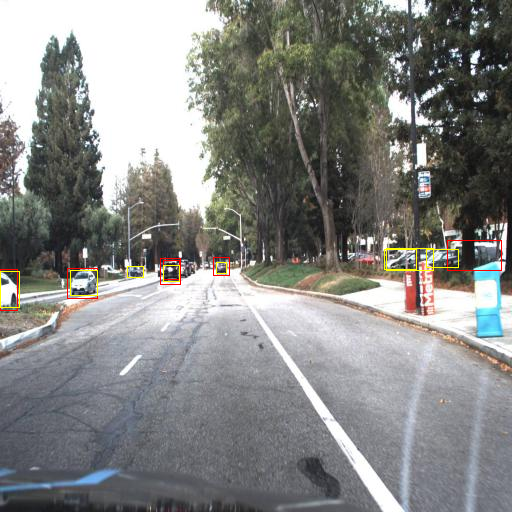

In [74]:
#Tonen van bounding boxes rond de auto's op 1 willekeurig gekozen image
#vervangen door https://stackoverflow.com/questions/23720875/opencv-draw-a-rectangle-around-a-region
import cv2
import random
from PIL import Image, ImageDraw

# Load the image
file_name = random.choice(os.listdir(sample_folder_predict))
image = Image.open(os.path.join(sample_folder_size_images, os.path.splitext(file_name)[0] + ".jpg"))
draw = ImageDraw.Draw(image)

print(file_name)
# Load corresponding truth-label file
with open(os.path.join(sample_folder_size_labels, file_name), 'r') as f:
    lines = f.readlines()
print(sample_folder_size_labels)
    
# Parse bounding box data and draw on the image
print("code vanuit truth labels-file")
for line in lines:
    print(line)
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    #class id 1 are cars,
    if class_id == 2:
        width *= image.width
        height *= image.height
        x_center *= image.width
        y_center *= image.height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2

        # Draw bounding box on the image
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red")

print ("")
# Load corresponding predict-label file
with open(os.path.join(sample_folder_predict, file_name), 'r') as f:
    lines = f.readlines()

# Read label file and draw bounding boxes
print("code vanuit predict labels-file")
for line in lines:
  print(line)
  class_id, x_center, y_center, width, height = map(float, line.strip().split())
  if class_id == 2:
      width *= image.width
      height *= image.height
      x_center *= image.width
      y_center *= image.height
      x_min = x_center - width / 2
      y_min = y_center - height / 2
      x_max = x_center + width / 2
      y_max = y_center + height / 2

      # Draw bounding box on the image
      draw.rectangle([x_min, y_min, x_max, y_max], outline="yellow")
# Show the image with bounding boxes
print("truth box rood")
print("predict box geel")
display(image)

In [75]:
#alle beelden van de sample overlopen en truth- en predict-bounding boxes erop tekenen 
#Bounding box tonen rond de auto's voor de beide label-files: truth box rood, predict box geel
#saven in bounding_box_folder
import os
import cv2

def draw_bounding_boxes(image, labels, classes, kleur):
    global imagebb
    for label in labels:
        class_id, x_center, y_center, width, height = label
        if class_id in classes:
          width *= 518
          height *= 518
          x_center *= 518
          y_center *= 518
          x_min = int(x_center - width / 2)
          y_min = int(y_center - height / 2)
          x_max = int(x_center + width / 2)
          y_max = int(y_center + height / 2)

          # Draw bounding box on the image using OpenCV
          imagebb = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), kleur)

if not os.path.exists(bounding_box_folder):
   os.makedirs(bounding_box_folder)

#truth bounding boxes aanbrengen
image_files_truth = os.listdir(sample_folder_size_images)

for image_file in image_files_truth:
   truth_labels = []
   image = cv2.imread(os.path.join(sample_folder_size_images, image_file))
   label_path_truth = os.path.join(sample_folder_size_labels, f"{os.path.splitext(image_file)[0]}.txt")
   with open(label_path_truth, 'r') as file:
            truth_labels.extend(list(map(float, line.strip().split())) for line in file)
   draw_bounding_boxes(image, truth_labels, [2], (0, 0, 255))
   cv2.imwrite(os.path.join(bounding_box_folder, f"{os.path.splitext(image_file)[0]}.jpg"), image)

#predict bounding boxes aanbrengen

image_files_bounding = os.listdir(bounding_box_folder)

for image_file in image_files_bounding:
   predict_labels = []
   image = cv2.imread(os.path.join(bounding_box_folder, image_file))
   label_path_predict = os.path.join(sample_folder_predict, os.path.splitext(image_file)[0] + ".txt")
   if os.path.exists(label_path_predict):
      with open(label_path_predict, 'r') as file:
                predict_labels.extend(list(map(float, line.strip().split())) for line in file)
      draw_bounding_boxes(image, predict_labels, [2], (0, 255, 255))
      cv2.imwrite(os.path.join(bounding_box_folder, f"{os.path.splitext(image_file)[0]}.jpg"), image)

In [76]:
#controle
print("Number of images in the sample_folder_size_images folder:", len(os.listdir(sample_folder_size_images)))
print("Number of images in the bounding box folder:", len(os.listdir(bounding_box_folder)))

Number of images in the sample_folder_size_images folder: 3024
Number of images in the bounding box folder: 3024


## 1.2 Augmentation (schemering aanbrengen)

**TODO: beslissen over augmentatiecriteria**


general guidelines and starting points for adjusting brightness and contrast to simulate twilight conditions:

*   Reduce Overall Brightness: Twilight scenes are typically dimmer compared to
daylight scenes. You can achieve this by reducing the overall brightness of the image.

*   Adjust Contrast: In twilight conditions, the contrast between highlights and shadows tends to be lower compared to daylight. You can decrease the contrast to create a softer, more subdued appearance.

### 1.2.1 Schemering aanbrengen met OpenCV

1478020887212051846_jpg.rf.PBSlxCHpN4t4cIM68jpl.jpg



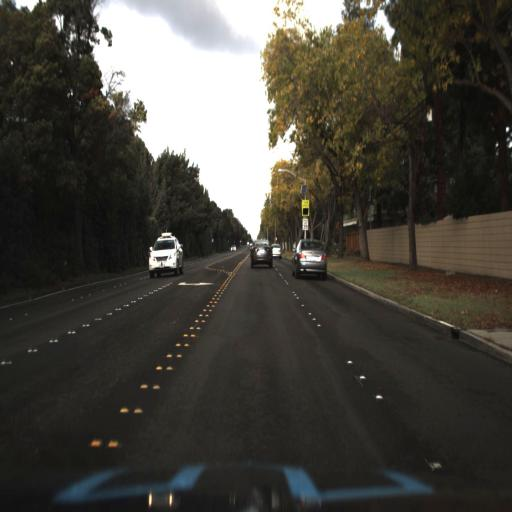
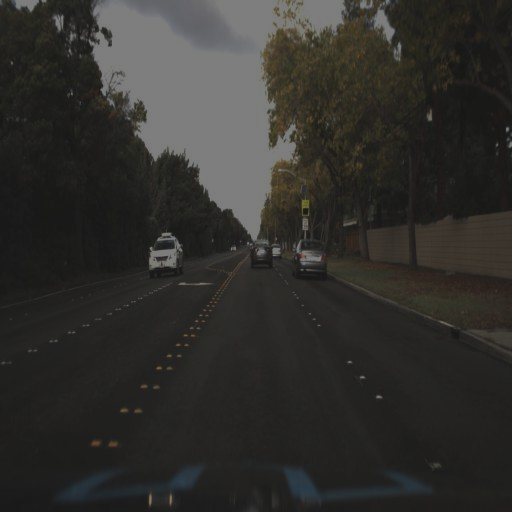
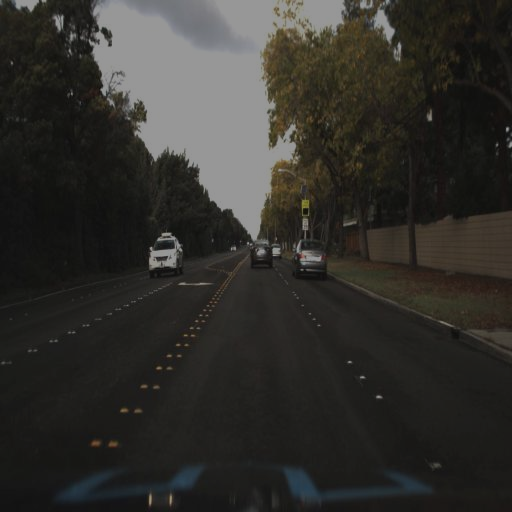
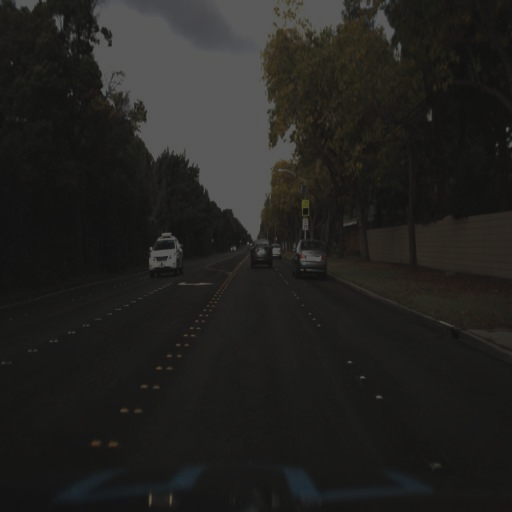
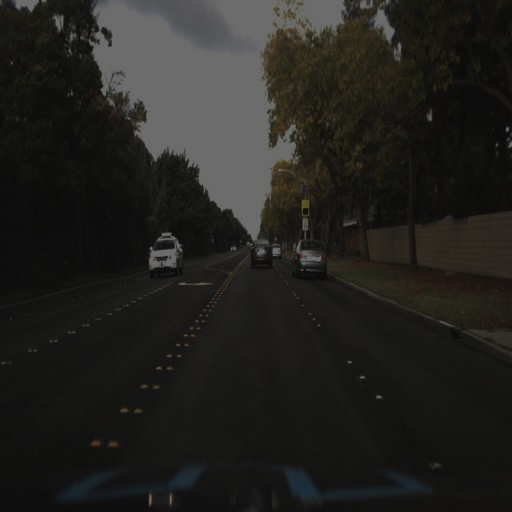

In [77]:
#basic example using OpenCV to adjust the brightness and contrast of an image to make it look duskier
#see https://www.tutorialspoint.com/how-to-change-the-contrast-and-brightness-of-an-image-using-opencv-in-python for an example
# alpha is the contrast value. To lower the contrast, use 0 < alpha < 1. And for higher contrast use alpha > 1.
# beta is the brightness value. A good range for brightness value is [-127, 127]
import cv2
import numpy as np
from PIL import Image, ImageDraw, ImageEnhance
from IPython.display import display, HTML
import io
import base64
import random
file_name = random.choice(os.listdir(sample_folder_size_images))
print(file_name)
image_path = os.path.join(sample_folder_size_images, os.path.splitext(file_name)[0] + ".jpg")


def adjust_brightness_contrast_side_by_side(image_path, contrast, brightness):
    # Open the image
    image = Image.open(image_path)
    
    # Adjust contrast
    enhancer = ImageEnhance.Contrast(image)
    image = enhancer.enhance(contrast)
    
    # Adjust brightness
    enhancer = ImageEnhance.Brightness(image)
    image = enhancer.enhance(1 + brightness / 100)  # Scale brightness appropriately
    
    return image

def adjust_brightness_contrast(image_path, alpha, beta):
    # Load the image
    image = Image.open(image_path)
    # Convert PIL Image to NumPy array
    image_np = np.array(image)
    # Adjust brightness and contrast
    adjusted_image_np = cv2.convertScaleAbs(image_np, alpha=alpha, beta=beta)
    return adjusted_image_np

def image_to_base64(image):
    buffered = io.BytesIO()
    image.save(buffered, format="PNG")
    return base64.b64encode(buffered.getvalue()).decode('utf-8')

# Original Image
image = Image.open(image_path)
original_image_base64 = image_to_base64(image)

# Adjusted Images
adjustments = [
    {"contrast": 0.6, "brightness": -30, "description": "Duskier Image proposal contrast=0.6 brightness=-30"},
    {"contrast": 0.8, "brightness": -30, "description": "Duskier Image proposal contrast=0.8 brightness=-30"},
    {"contrast": 0.6, "brightness": -50, "description": "Duskier Image proposal contrast=0.6 brightness=-50"},
    {"contrast": 0.8, "brightness": -50, "description": "Duskier Image proposal contrast=0.8 brightness=-50"},
]

html_content = "<div style='display: flex; flex-wrap: wrap;'>"

# Original Image
html_content += "<div style='margin: 10px; text-align: center;'><p>Original Image</p>"
html_content += "<img src='data:image/png;base64,{}' style='max-width: 400px;'><br></div>".format(original_image_base64)

# Adjusted Images
for adj in adjustments:
    adjusted_image = adjust_brightness_contrast_side_by_side(image_path, adj["contrast"], adj["brightness"])
    adjusted_image_base64 = image_to_base64(adjusted_image)
    html_content += "<div style='margin: 10px; text-align: center;'><p>{}</p>".format(adj["description"])
    html_content += "<img src='data:image/png;base64,{}' style='max-width: 400px;'><br></div>".format(adjusted_image_base64)

html_content += "</div>"

display(HTML(html_content))

## 1.3 Training Sets aanmaken

### 1.3.1 Training Sets obv augmentatie

In [78]:
#Foto's willekerig opdelen in trainingsets (folders bevatten dan de labels en images die bij elkaar horen)
#1 ongewijzigde beelden
#2 lichte_augmentatie beelden
#3 zware_augmentatie beelden

import os
import random
import shutil

# Create training folders
if not os.path.exists(training_sets_folder):
       os.makedirs(training_sets_folder)

# Function to create folders if they don't exist
def create_folders(folders):
    for folder in folders:
        folder_path = os.path.join(training_sets_folder, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

# Target folders
target_folders = ["ongewijzigd", "lichte_augmentatie", "zware_augmentatie"]

# Create target folders
create_folders(target_folders)

# Function to divide images and corresponding labels into three folders randomly
def divide_images(target_folders):
    # Get the list of image files
    image_files = [f for f in os.listdir(sample_folder_size_images) if f.endswith('.jpg')]

    # Shuffle the image files randomly
    random.shuffle(image_files)

    # Calculate how many images to put in each folder
    images_per_folder = len(image_files) // len(target_folders)
    print("images_per_folder: ", images_per_folder)
    # Distribute images to folders
    for i, folder in enumerate(target_folders):
        start_index = i * images_per_folder
        end_index = start_index + images_per_folder if i < len(target_folders) - 1 else len(image_files)
        teller = 0
        for image_file in image_files[start_index:end_index]:
            source_path = os.path.join(sample_folder_size_images, image_file)
            target_path = os.path.join(os.path.join(training_sets_folder, folder), image_file)
            shutil.copy(source_path, target_path)
            # Load corresponding label file
            label_file = os.path.splitext(image_file)[0] + ".txt"
            label_path = os.path.join(sample_folder_size_labels, label_file)
            if not os.path.exists(label_path):
                print(f"Label file not found for {image_file}")
                continue
            target_path = os.path.join(os.path.join(training_sets_folder, folder), label_file)
            shutil.copy(label_path, target_path)
        teller = 0
# Divide images into three folders randomly
divide_images(target_folders)

print("Images and labels divided into three folders successfully.")

images_per_folder:  1008
Images and labels divided into three folders successfully.


#### 1.3.1 Augmentatie toepassen in de folders overdag_augmentatie en augmentatie

In [79]:
import os

def adjust_images_in_folder(folder_path, alpha, beta):
    # loop over all files in the folder
    for filename in os.listdir(folder_path):
        # Check if the file is an image
        if filename.endswith('.jpg'):
            # Read the image
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path)
            if image is not None:
                # Adjust brightness and contrast
                image = Image.open(image_path)
                image_np = np.array(image)
                adjusted_image_np = adjust_brightness_contrast(image_path,alpha, beta)
                #adjusted_image_np = cv2.convertScaleAbs(image_np, alpha=alpha, beta=beta)
                # Overwrite the original image
                cv2.imwrite(image_path, adjusted_image_np)
    print(f"Adjusted and overwritten: {folder_path}")

# Adjust images in the folders
adjust_images_in_folder(os.path.join(training_sets_folder, "lichte_augmentatie"), 0.8, -30)
adjust_images_in_folder(os.path.join(training_sets_folder, "zware_augmentatie"), 0.6, -50)

Adjusted and overwritten: ./sampleSize10000\training_sets\lichte_augmentatie
Adjusted and overwritten: ./sampleSize10000\training_sets\zware_augmentatie


### 1.3.2 Training Sets verder opsplitsen obv treshhold

In [80]:
#Check of alle beelden wel een label-file hebben (anders kan je geen bounding boxes berekenen)
import os

def count_images_without_label(folder_path):
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
    count_images_without_label = 0
    for file in image_files:
      # Load corresponding label file
      label_file = os.path.splitext(file)[0] + ".txt"
      label_path = os.path.join(folder_path, label_file)
      if not os.path.exists(label_path):
        count_images_without_label +=1
    return  count_images_without_label

print("aantal beelden zonder labelfile")
print(count_images_without_label(os.path.join(training_sets_folder, "ongewijzigd")))
print(count_images_without_label(os.path.join(training_sets_folder, "zware_augmentatie")))
print(count_images_without_label(os.path.join(training_sets_folder, "lichte_augmentatie")))

aantal beelden zonder labelfile
0
0
0


In [9]:
#tellen van auto's in 1 label-file
import os

def calculateNumberOfCars(label_file, class_ids):
    #returns the number of cars in the label_file
    number_cars = 0
    # Iterate through each line
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Parse label file
            label = line.strip().split()
            class_id = int(label[0])
            if class_id in class_ids:
              number_cars += 1
    return number_cars

In [10]:
#functie: gemiddelde en mediaan berekenen van aantal auto's per beeld in de folder
#returns a DataFrame containing IDs and their respective percentages, along with the total average percentage and median percentage across all files.
import os
import pandas as pd
import numpy as np

def calculate_total_average_median_percentage(source_folder):
    # Get list of label files
    label_files = [f for f in os.listdir(source_folder) if f.endswith('.txt')]
    total_average_percentage = 0

    # Create an empty list to store the data
    data = []

    # Iterate over label files and calculate percentage
    for idx, label_file in enumerate(label_files, start=1):
        label_path = os.path.join(source_folder, label_file)
        percentage = calculateNumberOfCars(label_path, [2])
        total_average_percentage += percentage
        data.append((idx, percentage))

    # Create DataFrame
    df = pd.DataFrame(data, columns=['ID', 'Percentage'])

    # Calculate total average percentage
    total_average_percentage /= len(label_files)

    # Calculate median percentage
    median_percentage = np.median(df['Percentage'])

    return df, total_average_percentage, median_percentage

In [83]:
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(sample_folder_size_labels)
print(f"Average number of cars in the folder {sample_folder_size_labels}:", total_average_percentage, "  median_number_of_cars:", median_percentage)
source_folder = os.path.join(training_sets_folder, "zware_augmentatie")
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(source_folder)
print(f"Average number of cars in the folder {source_folder}:", total_average_percentage, "  median_number_of_cars:", median_percentage)
source_folder = os.path.join(training_sets_folder, "lichte_augmentatie")
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(source_folder)
print(f"Average number of cars in the folder {source_folder}:", total_average_percentage, "  median_number_of_cars:", median_percentage)
source_folder = os.path.join(training_sets_folder, "ongewijzigd")
df, total_average_percentage,median_percentage = calculate_total_average_median_percentage(source_folder)
print(f"Average number of cars in the folder {source_folder}:", total_average_percentage, "  median_number_of_cars:", median_percentage)

Average number of cars in the folder ./sampleSize10000\labels: 4.554563492063492   median_number_of_cars: 4.0
Average number of cars in the folder ./sampleSize10000\training_sets\zware_augmentatie: 4.579365079365079   median_number_of_cars: 4.0
Average number of cars in the folder ./sampleSize10000\training_sets\lichte_augmentatie: 4.546626984126984   median_number_of_cars: 4.0
Average number of cars in the folder ./sampleSize10000\training_sets\ongewijzigd: 4.537698412698413   median_number_of_cars: 4.0


In [84]:
#trainingsets verder opdelen qua tresh-hold (bevatten labels en images)
#treshhold = aantal auto's per beeld
#Treshhold zetten zodat we gebalanceerde dataset bereiken

import os
import random
import shutil

# Target folders
target_folders = ["onder_de_grens", "boven_de_grens"]

# Function to create folders if they don't exist
def create_folders(training_sets_folder, folders):
    for folder in folders:
        folder_path = os.path.join(training_sets_folder, folder)
        if not os.path.exists(folder_path):
            os.makedirs(folder_path)

# Create target folders
create_folders(os.path.join(training_sets_folder, "ongewijzigd"),target_folders)
create_folders(os.path.join(training_sets_folder, "lichte_augmentatie"),target_folders)
create_folders(os.path.join(training_sets_folder, "zware_augmentatie"),target_folders)

def copy_images_based_on_threshold(source_folder, threshold):
    # Get list of label files in the source folder
    label_files = [f for f in os.listdir(source_folder) if f.endswith('.txt')]
    # Iterate through each image file
    for label_file in label_files:
        label_path = os.path.join(source_folder, label_file)
        image_file = os.path.splitext(label_file)[0] + ".jpg"
        # Decide which target folder to copy the image to based on brightness threshold
        if calculateNumberOfCars(label_path,[2]) > threshold:
            target_path_image = os.path.join(source_folder, "boven_de_grens", image_file)
            target_path_label = os.path.join(source_folder, "boven_de_grens", label_file)
        else:
            target_path_image = os.path.join(source_folder, "onder_de_grens", image_file)
            target_path_label = os.path.join(source_folder, "onder_de_grens", label_file)
        # Copy labelfile to the appropriate target folder
        shutil.copy(label_path, target_path_label)

        #copy image-file to the appropriate target folder
        source_path = os.path.join(source_folder, image_file)
        shutil.copy(source_path, target_path_image)

# Divide images into three folders randomly
copy_images_based_on_threshold(os.path.join(training_sets_folder, "ongewijzigd"),4)

copy_images_based_on_threshold(os.path.join(training_sets_folder, "lichte_augmentatie"),4)

copy_images_based_on_threshold(os.path.join(training_sets_folder, "zware_augmentatie"),4)


#tellingen en uitprinten aantal bestanden per folder
def count_files(folder_path):
  num_files = 0
  for filename in os.listdir(folder_path):
    if os.path.isfile(os.path.join(folder_path, filename)):
      num_files += 1
  return num_files

#check op balans in de datasets
folder_path = os.path.join(training_sets_folder, "ongewijzigd","onder_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} images in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "ongewijzigd","boven_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "lichte_augmentatie","onder_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "lichte_augmentatie","boven_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "zware_augmentatie","onder_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
folder_path = os.path.join(training_sets_folder, "zware_augmentatie","boven_de_grens")
number_of_images = count_files(folder_path)/2
print(f"There are {number_of_images} files in the folder {folder_path}.")
print("Met deze folders gaan we de predictie, training & validatie doen")

There are 589.0 images in the folder ./sampleSize10000\training_sets\ongewijzigd\onder_de_grens.
There are 419.0 files in the folder ./sampleSize10000\training_sets\ongewijzigd\boven_de_grens.
There are 582.0 files in the folder ./sampleSize10000\training_sets\lichte_augmentatie\onder_de_grens.
There are 426.0 files in the folder ./sampleSize10000\training_sets\lichte_augmentatie\boven_de_grens.
There are 582.0 files in the folder ./sampleSize10000\training_sets\zware_augmentatie\onder_de_grens.
There are 426.0 files in the folder ./sampleSize10000\training_sets\zware_augmentatie\boven_de_grens.
Met deze folders gaan we de predictie, training & validatie doen


In [61]:
#predictlabels onder de juiste folder zetten
import os
import shutil

def copylabels (path):
    dest_path = os.path.join(training_sets_folder, path)
    if not os.path.exists(os.path.join(sample_folder_size, "Yolo_output","predict",path,"predict/labels")):
            os.makedirs(os.path.join(sample_folder_size, "Yolo_output","predict",path,"predict/labels"))
    # Get list of image files
    label_files = [os.path.join(dest_path, f) for f in os.listdir(dest_path) if f.endswith('.txt')]
    # Iterate through each image file
    for label_file in label_files:
        if os.path.exists(os.path.join(sample_folder_predict,os.path.basename(label_file))):
            shutil.copy(os.path.join(sample_folder_predict,os.path.basename(label_file)),
                          os.path.join(sample_folder_size, "Yolo_output","predict",path,"predict/labels"))
            
copylabels("ongewijzigd/onder_de_grens")
copylabels("ongewijzigd/boven_de_grens")
copylabels("lichte_augmentatie/onder_de_grens")
copylabels("lichte_augmentatie/boven_de_grens")
copylabels("zware_augmentatie/onder_de_grens")
copylabels("zware_augmentatie/boven_de_grens")

dest_path:  ./sampleSize10000\training_sets\ongewijzigd/onder_de_grens
label_file:  ./sampleSize10000\training_sets\ongewijzigd/onder_de_grens\1478019953180167674_jpg.rf.8a816c9d7e9b423a63ed6ecd4a663e47.txt
1e path ./sampleSize10000\Yolo_output\predict\labels\1478019953180167674_jpg.rf.8a816c9d7e9b423a63ed6ecd4a663e47.txt
2e path ./sampleSize10000\Yolo_output\predict\ongewijzigd/onder_de_grens\predict/labels
label_file:  ./sampleSize10000\training_sets\ongewijzigd/onder_de_grens\1478019955185244088_jpg.rf.gJpj2eCO1Dd7Sic9WlhE.txt
1e path ./sampleSize10000\Yolo_output\predict\labels\1478019955185244088_jpg.rf.gJpj2eCO1Dd7Sic9WlhE.txt
2e path ./sampleSize10000\Yolo_output\predict\ongewijzigd/onder_de_grens\predict/labels
label_file:  ./sampleSize10000\training_sets\ongewijzigd/onder_de_grens\1478019958682197101_jpg.rf.XCoBnRWpmUTZFpYFGG3Y.txt
1e path ./sampleSize10000\Yolo_output\predict\labels\1478019958682197101_jpg.rf.XCoBnRWpmUTZFpYFGG3Y.txt
2e path ./sampleSize10000\Yolo_output\pred

# 2 Afhankelijke variabelen

### 2.1 IoU

Intersection over Union measures the overlap between two bounding boxes, typically the predicted bounding box and the ground truth bounding box of an object. If the predicted bounding box overlaps perfectly with the ground truth bounding box, the IoU would be 1. If there's no overlap at all, the IoU would be 0.

Vele beelden hebben meerdere auto's dus meerdere boxen. Voor het bepalen van de IoU gaan we de truth-boxes 1 voor 1 vergelijken met de predicted boxes en enkel de box overhouden die hiermee maximaal matcht.


In [159]:
import statistics
#voorbeeld onder https://pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/
def calculate_iou(gt_box, pred_box, eps=1e-7):
    """
    Calculates the IoU between two bounding boxes.
    Source code:https://docs.ultralytics.com/reference/utils/metrics/#ultralytics.utils.metrics.bbox_iou
    Args:
        gt_box (list): Ground truth bounding box (classid, x_center, y_center, width, height).
        pred_box (list): Predicted bounding box (classid, x_center, y_center, width, height).

    Returns:
        float: The IoU value between the two boxes.
    """
    # Extract coordinates for both boxes
    x1, y1, w1, h1  = map(float, gt_box.split()[1:])
    x2, y2, w2, h2 = map(float, pred_box.split()[1:])
    w1_, h1_, w2_, h2_ = w1 / 2, h1 / 2, w2 / 2, h2 / 2
    b1_x1, b1_x2, b1_y1, b1_y2 = x1 - w1_, x1 + w1_, y1 - h1_, y1 + h1_
    b2_x1, b2_x2, b2_y1, b2_y2 = x2 - w2_, x2 + w2_, y2 - h2_, y2 + h2_
    
    # Intersection area
    inter = (max(0,min(b1_x2,b2_x2) - max(b1_x1,b2_x1))) * max(0,(min(b1_y2,b2_y2) - max(b1_y1,b2_y1)))

    # Union Area
    union = w1 * h1 + w2 * h2 - inter + eps

    # IoU
    iou = inter / union
    return iou


def calculate_multiple_iou(gt_boxes, pred_boxes, class_ids):
    """
    Calculates IoU for each ground truth box and the best matching predicted box.

    Args:
        gt_boxes (list of lists): List of ground truth bounding boxes (classid, x_center, y_center, width, height).
        pred_boxes (list of lists): List of predicted bounding boxes (classid, x_center, y_center, width, height).

    Returns:
        list of floats: List of IoU values for each ground truth box.
    """

    iou_list = []
    with open(gt_boxes, 'r') as gt_file:
        gt_boxes = gt_file.readlines()
        for gt_box in gt_boxes:
            label_truth = gt_box.strip().split()
            class_id_truth = int(label_truth[0])
            if class_id_truth == class_ids:
              max_iou = 0.0
              best_pred_box = None
              with open(pred_boxes, 'r') as pred_file:
                  pred_boxes2 = pred_file.readlines()
                  for pred_box in pred_boxes2:
                      label_predict = pred_box.strip().split()
                      class_id_predict = int(label_predict[0])
                      if class_id_predict in [class_ids]:
                          iou = calculate_iou(gt_box, pred_box)
                          if iou > max_iou:
                              max_iou = iou
                              best_pred_box = pred_box
              iou_list.append(max_iou)
    return iou_list

def calculate_IoU_Percentage(index,phase,truth_folder, predict_folder,class_ids):
    """
    Calculates detected car percentage for all labels in a folder
    Args:
        folder containing the labels
    Returns:
        list of percentages (length of list is the number of label-files)
    """
    outer_list = []
    # Get list of label files in the folder
    truth_label_files = [f for f in os.listdir(truth_folder) if f.endswith('.txt')]
    # Iterate through each label file
    for idx, label_file in enumerate(truth_label_files, start=index):
        truth_path_label = os.path.join(truth_folder, label_file)
        predict_path_label = os.path.join(predict_folder, label_file)
        #controle voor als Yolov8 geen labelfile heeft gemaakt wegens geen detectie
        if os.path.exists(predict_path_label):
            iou_list = calculate_multiple_iou(truth_path_label,predict_path_label,class_ids)
        else:
            iou_list = [0]
        if iou_list:
            percentage = statistics.mean(iou_list)
        else:
            percentage = 0
        outer_list.append((phase,idx, percentage))
    return outer_list

### 2.2 auto's tellen

In [160]:
#vergelijken autotellingen uit 2 folders
import pandas as pd
import os

def calculateCarPercentage(index,phase,truth_folder, predict_folder, class_ids):
    """
    Calculates detected car percentage for all labels in a folder
    Class_ids for the cars is 2
    Args:
        folder containing the labels
    Returns:
        list of percentages (length of list is the number of label-files)
    """
    outer_list = []
    # Get list of label files in the folder
    truth_label_files = [f for f in os.listdir(truth_folder) if f.endswith('.txt')]
    # Iterate through each label file
    for idx, label_file in enumerate(truth_label_files, start=index):
        truth_path_label = os.path.join(truth_folder, label_file)
        truth_number_cars = calculateNumberOfCars(truth_path_label, class_ids)
        predict_path_label = os.path.join(predict_folder, label_file)
        #controle voor als Yolov8 geen labelfile heeft gemaakt wegens geen detectie
        if os.path.exists(predict_path_label):
            predict_number_cars = calculateNumberOfCars(predict_path_label, class_ids)
        else:
            predict_number_cars = 0
        if truth_number_cars != 0:
           percentage =  predict_number_cars/truth_number_cars
        else:
           percentage = 0
        outer_list.append((phase,idx, percentage))
    return outer_list

## 2.2 Predictie door YoloV8 model

#### 2.2.1 IoU-resultaten van predictie YoloV8 model op 1 beeld

File name:  1478899679697083025_jpg.rf.da0dd94b0bb11cf2aa1b3fe56b4d7653.txt
Truth label file
2 0.11328125 0.5546875 0.0927734375 0.0830078125
2 0.1689453125 0.517578125 0.0341796875 0.0419921875
2 0.216796875 0.544921875 0.1005859375 0.1064453125
2 0.2724609375 0.5302734375 0.0673828125 0.099609375
2 0.435546875 0.5087890625 0.0283203125 0.0595703125
2 0.4951171875 0.5185546875 0.0791015625 0.1162109375
2 0.9755859375 0.525390625 0.046875 0.14453125

Predict label file
2 0.489798 0.521468 0.0968666 0.109618
2 0.123289 0.557111 0.118374 0.0997997
2 0.220592 0.55339 0.110961 0.11523
2 0.977608 0.541025 0.0442791 0.106677
2 0.439405 0.507768 0.0359285 0.0505744
2 0.266659 0.524753 0.0755439 0.0903873
2 0.401867 0.506026 0.0489801 0.0302886
2 0.401802 0.50153 0.0467114 0.0220524

iou_list  [0.6518585744702349, 0.07814924273899293, 0.7803012610712283, 0.766500734660712, 0.6890521092488777, 0.778366783703595, 0.6780716441243083]
IoU boxes percentage:  [0.6518585744702349, 0.07814924273899293

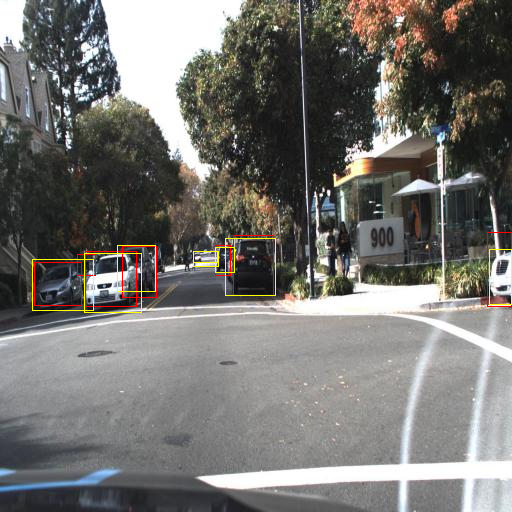

In [71]:
import statistics
import random
file_name = random.choice(os.listdir(sample_folder_size_labels))
print("File name: ", file_name)

truth_file = os.path.join(sample_folder_size_labels, file_name)
predict_file = os.path.join(sample_folder_predict, file_name)

with open(truth_file, "r") as file:
    # Read the entire content of the file
    content = file.read()
    # Print the content
    print("Truth label file")
    print(content)

with open(predict_file, "r") as file:
    # Read the entire content of the file
    content = file.read()
    # Print the content
    print("Predict label file")
    print(content)


print("IoU boxes percentage: ", calculate_multiple_iou(truth_file,predict_file,2 ))
print("Average: ",statistics.mean(calculate_multiple_iou(truth_file,predict_file,2 )))
      
#Tonen van bounding boxes rond de auto's op 1 willekeurig gekozen image
#Auto's zijn class_id 1 in de truth label-file en class_id 2 in de predict label-file
#vervangen door https://stackoverflow.com/questions/23720875/opencv-draw-a-rectangle-around-a-region
import cv2
from PIL import Image, ImageDraw

# Load the image
image = Image.open(os.path.join(sample_folder_size_images, os.path.splitext(file_name)[0] + ".jpg"))
draw = ImageDraw.Draw(image)

print(file_name)
# Load corresponding truth-label file
with open(os.path.join(sample_folder_size_labels, file_name), 'r') as f:
    lines = f.readlines()
    
# Parse bounding box data and draw on the image
for line in lines:
    class_id, x_center, y_center, width, height = map(float, line.strip().split())
    #class id 1 are cars,
    if class_id == 2:
        width *= image.width
        height *= image.height
        x_center *= image.width
        y_center *= image.height
        x_min = x_center - width / 2
        y_min = y_center - height / 2
        x_max = x_center + width / 2
        y_max = y_center + height / 2

        # Draw bounding box on the image
        draw.rectangle([x_min, y_min, x_max, y_max], outline="red")

print ("")
# Load corresponding predict-label file
with open(os.path.join(sample_folder_predict, file_name), 'r') as f:
    lines = f.readlines()

# Read label file and draw bounding boxes
for line in lines:
  class_id, x_center, y_center, width, height = map(float, line.strip().split())
  if class_id == 2:
      width *= image.width
      height *= image.height
      x_center *= image.width
      y_center *= image.height
      x_min = x_center - width / 2
      y_min = y_center - height / 2
      x_max = x_center + width / 2
      y_max = y_center + height / 2

      # Draw bounding box on the image
      draw.rectangle([x_min, y_min, x_max, y_max], outline="yellow")
# Show the image with bounding boxes
print("truth box rood")
print("predict box geel")
display(image)

#### 2.2.2 Autotellingen-resultaten van predictie YoloV8 model op 1 beeld

File name:  1478732303748634478_jpg.rf.b3721262ca92b7363c885c4e9363ae36.txt
code vanuit truth-labels-file
2 0.0244140625 0.4619140625 0.0478515625 0.103515625

2 0.087890625 0.484375 0.1083984375 0.087890625

2 0.158203125 0.4765625 0.0537109375 0.0703125

2 0.2490234375 0.46875 0.060546875 0.0634765625

2 0.5126953125 0.5 0.0732421875 0.0966796875

2 0.6455078125 0.4970703125 0.056640625 0.0634765625

2 0.7314453125 0.51953125 0.1064453125 0.1103515625

2 0.83984375 0.5048828125 0.0732421875 0.0771484375

2 0.9013671875 0.51171875 0.0517578125 0.0634765625

2 0.9638671875 0.5234375 0.0712890625 0.0771484375

truth box rood
predict box geel


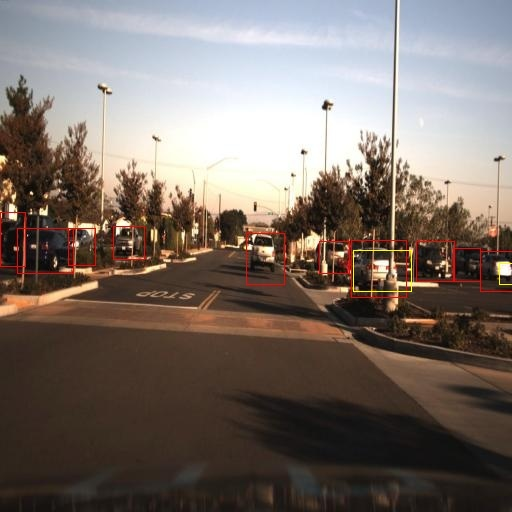

code vanuit predict-labels-file
2 0.739025 0.523535 0.111931 0.0782463

5 0.514424 0.48836 0.0456005 0.0623014

2 0.982078 0.528937 0.0347762 0.0406706

aantal auto's truth 10.
aantal auto's predict 2.
percentage herkende auto's: 0.2


In [11]:
import os

file_name = random.choice(os.listdir(sample_folder_size_labels))
print("File name: ", file_name)

truth_file = os.path.join(sample_folder_size_labels, file_name)
predict_file = os.path.join(sample_folder_predict, file_name)

# Load and print label files
with open(truth_file, 'r') as f:
    lines = f.readlines()
    print("code vanuit truth-labels-file")
    for line in lines:
      print(line)

print("truth box rood")
print("predict box geel")

#display image
image = Image.open(os.path.join(bounding_box_folder , os.path.splitext(file_name)[0] + ".jpg"))
display(image)

with open(predict_file, 'r') as f:
    lines = f.readlines()
    print("code vanuit predict-labels-file")
    for line in lines:
      print(line)

truth_number_cars= calculateNumberOfCars(truth_file,[2])
predict_number_cars = calculateNumberOfCars(predict_file,[2])

print(f"aantal auto's truth {truth_number_cars}.")
print(f"aantal auto's predict {predict_number_cars}.")
print("percentage herkende auto's:", predict_number_cars/truth_number_cars)

### 2.2.3 Benchmarks aanmaken over alle datasets met YOLOv8 predict

### 2.2.3.1 Benchmarks

In [174]:
import pandas as pd

df_final= pd.DataFrame()

def update_scores(index,path, phase):
    # Construct the full paths
    truth_path = os.path.join(training_sets_folder, path)
    predict_path = os.path.join(sample_folder_size, "Yolo_output","predict", path, "predict/labels")

    # Call the functions to get the benchmark results
    IOU_benchmark = calculate_IoU_Percentage(index,phase, truth_path, predict_path, 2)
    NDC_benchmark = calculateCarPercentage(index,phase, truth_path, predict_path, [2])

    # Create DataFrames from the results
    df_IOU = pd.DataFrame(IOU_benchmark, columns=['Phase', 'ID', 'IOU'])
    df_NDC = pd.DataFrame(NDC_benchmark, columns=['Phase', 'ID', 'NDC'])

    # Merge the DataFrames on 'Benchmark' and 'ID'
    merged_df = pd.merge(df_NDC, df_IOU, on=["Phase", "ID"])

    return merged_df

df_final = update_scores(1,"ongewijzigd/onder_de_grens","BM_OO")
df_final = pd.concat([df_final,
    update_scores(df_final['ID'].max(),"ongewijzigd/boven_de_grens","BM_OB")])
df_final = pd.concat([df_final,
    update_scores(df_final['ID'].max(),"lichte_augmentatie/onder_de_grens","BM_LO")])
df_final = pd.concat([df_final,
    update_scores(df_final['ID'].max(),"lichte_augmentatie/boven_de_grens","BM_LB")])
df_final = pd.concat([df_final,
    update_scores(df_final['ID'].max(),"zware_augmentatie/onder_de_grens","BM_ZO")])
df_final = pd.concat([df_final,
    update_scores(df_final['ID'].max(),"zware_augmentatie/boven_de_grens","BM_ZB")])

In [175]:
# Mapping of original phase values to new names
phase_mapping = {
    'BM_OO': 'BM_ongewijzigde beelden onder de grens',
    'BM_OB': 'BM_ongewijzigde beelden boven de grens',
    'BM_LO': 'BM_licht geaugmenteerde beelden onder de grens',
    'BM_LB': 'BM_licht geaugmenteerde beelden boven de grens',
    'BM_ZO': 'BM_zwaar geaugmenteerde beelden onder de grens',
    'BM_ZB': 'BM_zwaar geaugmenteerde beelden boven de grens'
}

# Map the original benchmarks to their new names
df_final['Phase'] = df_final['Phase'].map(phase_mapping)

# Extract the first three words of each benchmark and create a new column
df_final['Phase Group'] = df_final['Phase'].str.split().str[:3].str.join(' ')

# Mapping of original benchmark values to new names
phase_mapping = {
    'BM_ongewijzigde beelden onder': 'BM_ongewijzigde beelden',
    'BM_licht geaugmenteerde beelden': 'BM_licht geaugmenteerde beelden',
    'BM_zwaar geaugmenteerde beelden': 'BM_zwaar geaugmenteerde beelden'
}

# Map the original benchmarks to their new names
df_final['Phase Group'] = df_final['Phase Group'].map(phase_mapping)


In [176]:
# Find the tuple with the maximum second value
#max_value_tuple = max(IOU_benchmark_ongewijzigd_onder_de_grens, key=lambda x: x[1])
# Print the result
#print("Tuple with the maximum second value:", max_value_tuple)


### 2.2.3.2 Descriptive Statistics for Benchmarks

In [177]:
import pandas as pd

# Custom order for benchmark groups
custom_order = [
    'BM_ongewijzigde beelden',
    'BM_licht geaugmenteerde beelden',
    'BM_zwaar geaugmenteerde beelden'
]

# Calculate mean, median, standard deviation, and variance per benchmark-string for IOU
iou_statistics = df_final.groupby('Phase Group')['IOU'].agg(['mean', 'median', 'std', 'var']).reset_index()
iou_statistics.columns = ['Benchmark Group', 'IOU Mean', 'IOU Median', 'IOU Std', 'IOU Variance']

# Calculate mean, median, standard deviation, and variance per benchmark-string for NDC
ndc_statistics = df_final.groupby('Phase Group')['NDC'].agg(['mean', 'median', 'std', 'var']).reset_index()
ndc_statistics.columns = ['Benchmark Group', 'NDC Mean', 'NDC Median', 'NDC Std', 'NDC Variance']

# Sort the DataFrames based on the custom order
iou_statistics['Phase Group'] = pd.Categorical(iou_statistics['Benchmark Group'], categories=custom_order, ordered=True)
iou_statistics = iou_statistics.sort_values('Phase Group')

ndc_statistics['Phase Group'] = pd.Categorical(ndc_statistics['Benchmark Group'], categories=custom_order, ordered=True)
ndc_statistics = ndc_statistics.sort_values('Phase Group')

# Convert statistics DataFrames to HTML tables
iou_html = iou_statistics.to_html(index=False)
ndc_html = ndc_statistics.to_html(index=False)

# Display HTML tables in Jupyter Notebook
from IPython.display import display, HTML

display(HTML(iou_html))

display(HTML(ndc_html))


In [178]:
import pandas as pd

# Custom order for benchmark groups
custom_order = [
    'BM_ongewijzigde beelden onder de grens',
    'BM_ongewijzigde beelden boven de grens',
    'BM_licht geaugmenteerde beelden onder de grens',
    'BM_licht geaugmenteerde beelden boven de grens',
    'BM_zwaar geaugmenteerde beelden onder de grens',
    'BM_zwaar geaugmenteerde beelden boven de grens'
]

# Calculate mean, median, standard deviation, and variance per benchmark-string for IOU
iou_statistics = df_final.groupby('Phase')['IOU'].agg(['mean', 'median', 'std', 'var']).reset_index()
iou_statistics.columns = ['Phase', 'IOU Mean', 'IOU Median', 'IOU Std', 'IOU Variance']

# Calculate mean, median, standard deviation, and variance per benchmark-string for NDC
ndc_statistics = df_final.groupby('Phase')['NDC'].agg(['mean', 'median', 'std', 'var']).reset_index()
ndc_statistics.columns = ['Phase', 'NDC Mean', 'NDC Median', 'NDC Std', 'NDC Variance']

# Sort the DataFrames based on the custom order
iou_statistics['Phase'] = pd.Categorical(iou_statistics['Phase'], categories=custom_order, ordered=True)
iou_statistics = iou_statistics.sort_values('Phase')

ndc_statistics['Phase'] = pd.Categorical(ndc_statistics['Phase'], categories=custom_order, ordered=True)
ndc_statistics = ndc_statistics.sort_values('Phase')

# Convert statistics DataFrames to HTML tables
iou_html = iou_statistics.to_html(index=False)
ndc_html = ndc_statistics.to_html(index=False)

# Display HTML tables in Jupyter Notebook
from IPython.display import display, HTML

display(HTML(iou_html))

display(HTML(ndc_html))


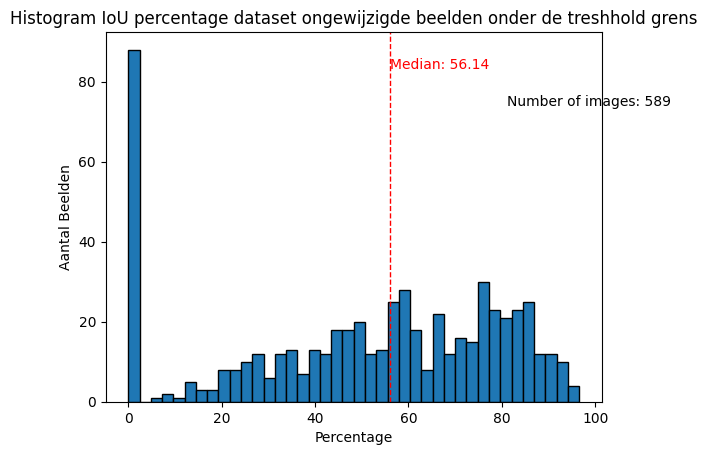

In [179]:
#voorbeeldplot 1 folder
import matplotlib.pyplot as plt

df_filtered = df_final[df_final['Phase'] == 'BM_ongewijzigde beelden onder de grens']

# Specify number of bins for the histogram
num_bins = 40

# Plot histogram
plt.hist(df_filtered['IOU'] * 100, bins=num_bins, edgecolor='black')

# Calculate median
median_percentage = (df_filtered['IOU']* 100).median()

# Add vertical line for median
plt.axvline(median_percentage, color='red', linestyle='dashed', linewidth=1)

# Add labels and title
plt.xlabel('Percentage')
plt.ylabel('Aantal Beelden')
plt.title('Histogram IoU percentage dataset ongewijzigde beelden onder de treshhold grens')

# Show median value
plt.text(median_percentage, plt.ylim()[1]*0.9, f'Median: {median_percentage:.2f}', color='red')

# Calculate number of unique IDs
num_unique_ids = df_filtered['ID'].nunique()

# Add legend
plt.text(plt.xlim()[1]*0.8, plt.ylim()[1]*0.8, f'Number of images: {num_unique_ids}', fontsize=10)

# Show plot
plt.show()


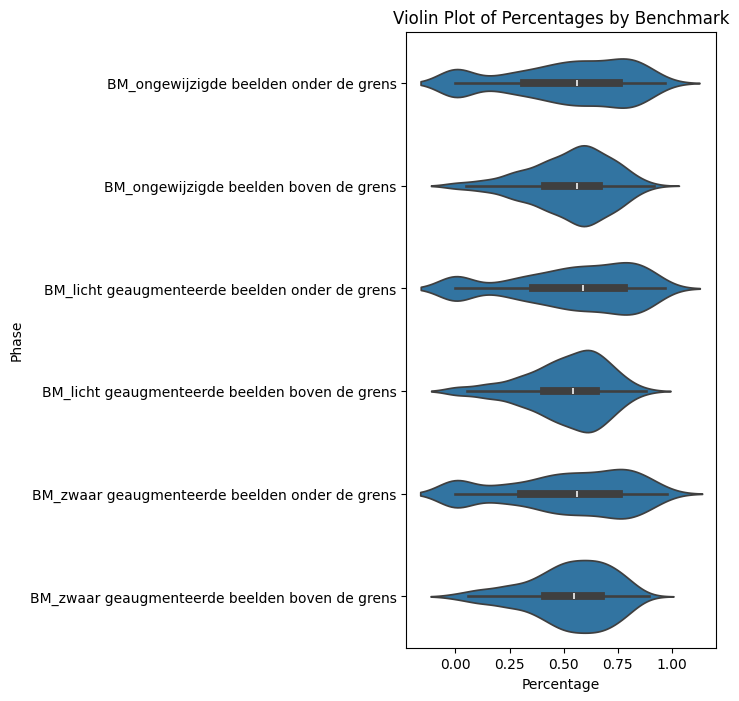

In [180]:
#voorbeeldplot alle folders
import matplotlib.pyplot as plt
import seaborn as sns

df_filtered = df_final[df_final['Phase'].str.startswith('BM_')]

# Box Plot
#plt.figure(figsize=(6, 12))
#sns.boxplot(y='Benchmark', x='Percentage', data=df_benchmark)
#plt.ylabel('Benchmark')
#plt.xlabel('Percentage')
#plt.title('Box Plot of Percentages by Benchmark')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()

# Violin Plot ==> It shows the median, quartiles, and potential outliers. but also shows the density of the data at 
# different values. This can provide more insight into the distribution.
plt.figure(figsize=(4, 8))
sns.violinplot(y='Phase', x='IOU', data=df_final)
plt.ylabel('Phase')
plt.xlabel('Percentage')
plt.title('Violin Plot of Percentages by Benchmark')
plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
plt.show()

# Strip Plot
#plt.figure(figsize=(6, 12))
#sns.stripplot(y='Benchmark', x='Percentage', data=df_benchmark, jitter=True)
#plt.ylabel('Benchmark')
#plt.xlabel('Percentage')
#plt.title('Strip Plot of Percentages by Benchmark')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()

# Bar Plot of Means with Error Bars
#means = df_benchmark.groupby('Benchmark')['Percentage'].mean()
#stds = df_benchmark.groupby('Benchmark')['Percentage'].std()

#plt.figure(figsize=(6, 12))
#means.plot(kind='barh', xerr=stds, capsize=4, color='skyblue', edgecolor='black')
#plt.ylabel('Benchmark')
#plt.xlabel('Mean Percentage')
#plt.title('Mean Percentage by Benchmark with Error Bars')
#plt.yticks(rotation=0)  # No need to rotate y-axis labels typically
#plt.show()


# 3 Training

In [49]:
#aanmaken van de training, validatie en test-folders voor alle datasets 
# Aanmaken folders
target_folders = ["images", "labels"]
sub_target_folders = ["train", "val","test"]

# Function to create folders if they don't exist
def create_folders(training_sets_folder):
    for folder in target_folders:
        folder_path = os.path.join(training_sets_folder, folder)
        if not os.path.exists(folder_path):
            for subfolder in sub_target_folders:
                sub_folder_path = os.path.join(folder_path, subfolder)
                os.makedirs(sub_folder_path)

# Create target folders
create_folders(os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens"))
create_folders(os.path.join(training_sets_folder, "ongewijzigd/boven_de_grens"))
create_folders(os.path.join(training_sets_folder, "lichte_augmentatie/onder_de_grens"))
create_folders(os.path.join(training_sets_folder, "lichte_augmentatie/boven_de_grens"))
create_folders(os.path.join(training_sets_folder, "zware_augmentatie/onder_de_grens"))
create_folders(os.path.join(training_sets_folder, "zware_augmentatie/boven_de_grens"))
create_folders(training_sets_folder)

In [50]:
#aanpassen van de class_id's in de label-files want in de Yaml-file van het model 
#staat maar 1 klasse (we detecteren enkel auto's), dus deze klasse moet 0 zijn 

import os

# Function to update class IDs
def update_class_ids(label_file):
    updated_lines = []
    with open(label_file, 'r') as file:
        lines = file.readlines()
        for line in lines:
            parts = line.strip().split()
            class_id = int(parts[0])
            if class_id == 2:
                parts[0] = '0'  # Update class_id from 1 to 2
                updated_lines.append(' '.join(parts) + '\n')

    with open(label_file, 'w') as file:
        file.writelines(updated_lines)

# Process all label files in the directory
def update_class_ids_folder(folder_path):
    # Get list of all label files in the predict folder
    label_txt_files = [f for f in os.listdir(folder_path)]
    for label_file in label_txt_files:
        file_path = os.path.join(folder_path, label_file)
        update_class_ids(file_path)

In [51]:
#80-10-10 split voor training-validation-test
from sklearn.model_selection import train_test_split
import os
import shutil

def splitten (path):
    # Get list of image files
    image_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
    # Split dataset into train, val, and test sets
    train_files, temp_files = train_test_split(image_files, test_size=0.2, random_state=42)
    val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=42) 
    # Iterate through each image file
    for image_train_file in train_files:
        shutil.copy(image_train_file, os.path.join(path,"images/train"))
        shutil.copy(os.path.join(os.path.dirname(image_train_file),os.path.basename(image_train_file).replace('.jpg', '.txt')), os.path.join(path,"labels/train"))
        update_class_ids_folder(os.path.join(path,"labels/train"))
    for image_val_file in val_files:
        shutil.copy(image_val_file, os.path.join(path,"images/val"))
        shutil.copy(os.path.join(os.path.dirname(image_val_file),os.path.basename(image_val_file).replace('.jpg', '.txt')), os.path.join(path,"labels/val"))    
        update_class_ids_folder(os.path.join(path,"labels/val"))
    #unifying the testset (same test set for all models, so destination is not set by path)
    for image_test_file in test_files:
        shutil.copy(image_test_file, os.path.join(training_sets_folder,"images/test"))
        shutil.copy(os.path.join(os.path.dirname(image_test_file),os.path.basename(image_test_file).replace('.jpg', '.txt')), os.path.join(path,"labels/test"))
        update_class_ids_folder(os.path.join(training_sets_folder,"labels/test"))
            
splitten(os.path.join(training_sets_folder, "ongewijzigd/onder_de_grens"))
splitten(os.path.join(training_sets_folder, "ongewijzigd/boven_de_grens"))
splitten(os.path.join(training_sets_folder, "lichte_augmentatie/onder_de_grens"))
splitten(os.path.join(training_sets_folder, "lichte_augmentatie/boven_de_grens"))
splitten(os.path.join(training_sets_folder, "zware_augmentatie/onder_de_grens"))
splitten(os.path.join(training_sets_folder, "zware_augmentatie/boven_de_grens"))

## 3.1 Training van dataset 1: ongewijzigde beelden onder de treshhold grens

In [19]:
#import model
from IPython import display
display.clear_output()

import ultralytics
import os
ultralytics.checks()

from ultralytics import YOLO

from IPython.display import display, Image

model = YOLO('yolov8n.pt')

results = model.train(data='./YAML/data_ongewijzigd_onder_de_grens.yaml', imgsz=512) 

Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i9-9900K 3.60GHz)
Setup complete  (16 CPUs, 31.9 GB RAM, 348.0/475.7 GB disk)
New https://pypi.org/project/ultralytics/8.2.28 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196  Python-3.12.3 torch-2.3.0+cpu CPU (Intel Core(TM) i9-9900K 3.60GHz)
engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data_ongewijzigd_onder_de_grens.yaml, epochs=30, patience=50, batch=16, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, sa

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0
                   all         10          1   0.000333          1    0.00063   0.000315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      28/30         0G     0.2226      31.21      0.186          0        512: 100%|██████████| 5/5 [00:09<00:00,  1.84
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0
                   all         10          1   0.000333          1    0.00063   0.000315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      29/30         0G     0.4968      31.67     0.2065          0        512: 100%|██████████| 5/5 [00:09<00:00,  1.90
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<0
                   all         10          1   0.000333         

In [21]:
NEXT STEPS - TODO
# Load the trained weights (komen in folder runs/train/weights/) -- welke kiezen???
model = YOLO('runs/train/weights/best.pt')

#hertrainen model totdat we acceptabele scores hebben. Moeten we dit model dan niet als benchmark nemen?

# test set laten lopen ==>
# testing gebeurt via model.val (ietwat ongelukkig gekozen door de ontwerpers, en maakt gebruik van de test-set aangeduid in de 
# yaml file)
# https://docs.ultralytics.com/modes/val/#introduction
# https://docs.ultralytics.com/modes/val/#arguments-for-yolo-model-validation
# The test set is used to evaluate the final model after it has been trained and validated. 
# It provides an unbiased estimate of model performance on unseen data.
# in YOLOv8, testing on a dataset is achieved by using the 'val' mode with your test data path. To clarify, there isn't a separate 'test' mode in the command line interface. 
#The 'val' mode is used to evaluate the model's performance against a specified dataset.
via model.val(data='./YAML/data_ongewijzigd_onder_de_grens.yaml', epochs=30,  imgsz=512) 

#https://docs.ultralytics.com/modes/#predict
via model.predict(data='./YAML/data_ongewijzigd_onder_de_grens.yaml', epochs=30,  imgsz=512)

#met de laatste predict-resultaten de NDC en IOU berekenen 
#hiermee de histogram en violin plot tekenen voor de predicted test-set
#en deze NDC en IOU afzetten tov de benchmark (side by side, maar welke grafiek)???
# wat staat er nog allemaal in de folder runs/train en hoe dit te interpreteren? Er staat bvb. MAP in, F1, ...
# https://www.youtube.com/watch?v=q7LwPoM7tSQ

SyntaxError: invalid syntax (3052396197.py, line 7)

TODO: 3.1 als het af is herhalen voor de rest van de datasets (nog 5 stuks) en conclusies trekken - gaan we erop vooruit bij steeds meer geaugmenteerde datasets?